In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

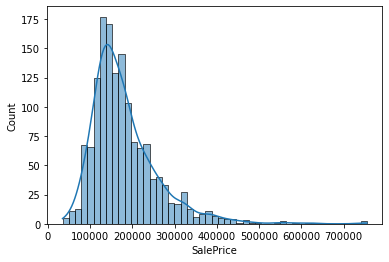

In [4]:
sns.histplot(data=df, x = 'SalePrice',kde=True)

In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.corr()['SalePrice'].sort_values()[:-1]

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64

In [8]:
len(df.corr()['SalePrice'].sort_values()[:-1])

37

In [9]:
df.drop(['Alley','PoolQC','MiscFeature'] , axis=1, inplace=True)

In [10]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [11]:
df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [12]:
df[df['MasVnrType'].isna() == True]['MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [13]:
df['Fireplaces'].describe()

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

In [14]:
df['Fireplaces'].mode()

0    0
dtype: int64

In [15]:
len(df[df['Fireplaces']==0])

690

In [16]:
df[df['FireplaceQu'].isna() == True]['Fireplaces'].median()

0.0

In [17]:
df[df['FireplaceQu'].isna() == True]['Fireplaces'].mode()

0    0
dtype: int64

In [18]:
df[df['FireplaceQu'].isna() == True]['Fireplaces'].mean()

0.0

In [19]:
df[df['Fireplaces']==0]['FireplaceQu'].mean()

nan

# I don't think that FireplaceQu (fireplace quality) is that important as around 50% homes (690 homes in total) don't have it
# Because of this making dummies out FireplaceQu will cost memory..Hence I'll drop it out

In [20]:
df.drop(['FireplaceQu'] , axis=1 , inplace=True)

# Imputing is practically sensible only when less than 5% (at max) are missing values, incase of Fence 80% is missing
# hence deleting the Fence column

In [21]:
df.drop(['Fence'] , axis=1 , inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
df.corr()['LotFrontage'].sort_values()

MSSubClass      -0.386347
OverallCond     -0.059213
Id              -0.010601
BsmtHalfBath    -0.007234
KitchenAbvGr    -0.006069
MiscVal          0.003368
YrSold           0.007450
EnclosedPorch    0.010700
MoSold           0.011200
LowQualFinSF     0.038469
ScreenPorch      0.041383
BsmtFinSF2       0.049900
HalfBath         0.053532
3SsnPorch        0.070029
GarageYrBlt      0.070250
2ndFlrSF         0.080177
WoodDeckSF       0.088521
YearRemodAdd     0.088866
BsmtFullBath     0.100949
YearBuilt        0.123349
BsmtUnfSF        0.132644
OpenPorchSF      0.151972
MasVnrArea       0.193458
FullBath         0.198769
PoolArea         0.206167
BsmtFinSF1       0.233633
OverallQual      0.251646
BedroomAbvGr     0.263170
Fireplaces       0.266639
GarageCars       0.285691
GarageArea       0.344997
SalePrice        0.351799
TotRmsAbvGrd     0.352096
TotalBsmtSF      0.392075
GrLivArea        0.402797
LotArea          0.426095
1stFlrSF         0.457181
LotFrontage      1.000000
Name: LotFro

In [24]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
df['LotFrontage'].mode()

0    60.0
dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

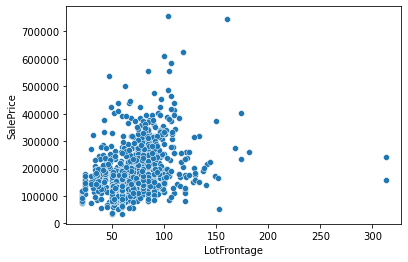

In [26]:
sns.scatterplot(data=df , x = 'LotFrontage',y = 'SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='LotFrontage'>

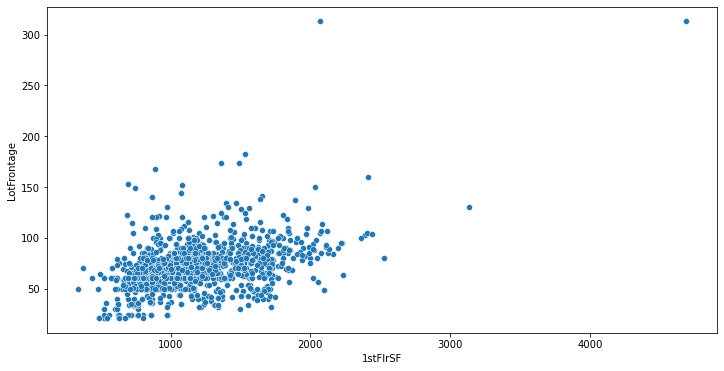

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , y = 'LotFrontage',x = '1stFlrSF')

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

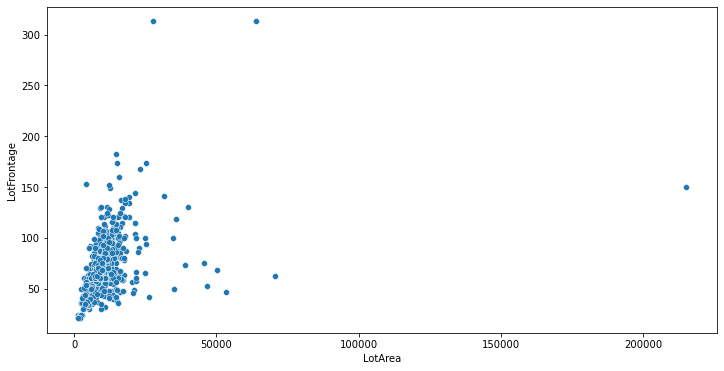

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , y = 'LotFrontage',x = 'LotArea')
# not a good metric as values are quite uneven

<AxesSubplot:xlabel='LotShape', ylabel='LotFrontage'>

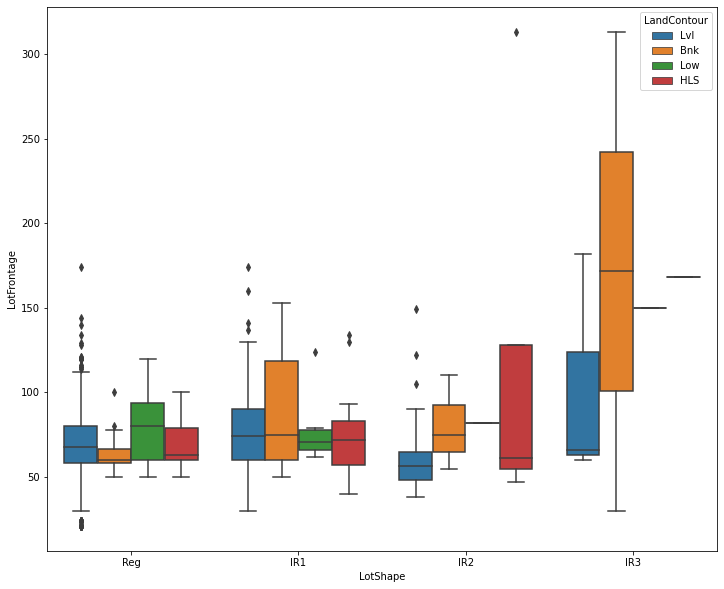

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df , x = 'LotShape', y ='LotFrontage' , hue = 'LandContour')
# this gives the most detailed info as all the categories and hue are present

<AxesSubplot:xlabel='LotConfig', ylabel='LotFrontage'>

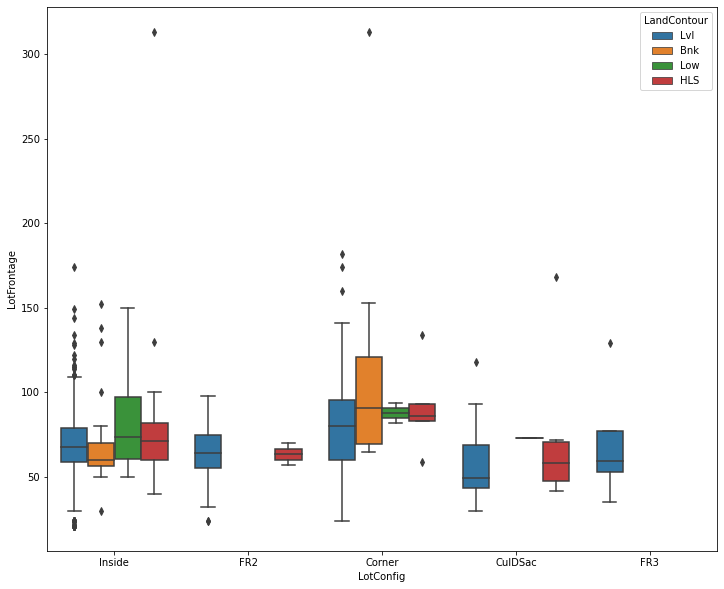

In [30]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df , x = 'LotConfig', y ='LotFrontage' , hue = 'LandContour')

<AxesSubplot:xlabel='LandSlope', ylabel='LotFrontage'>

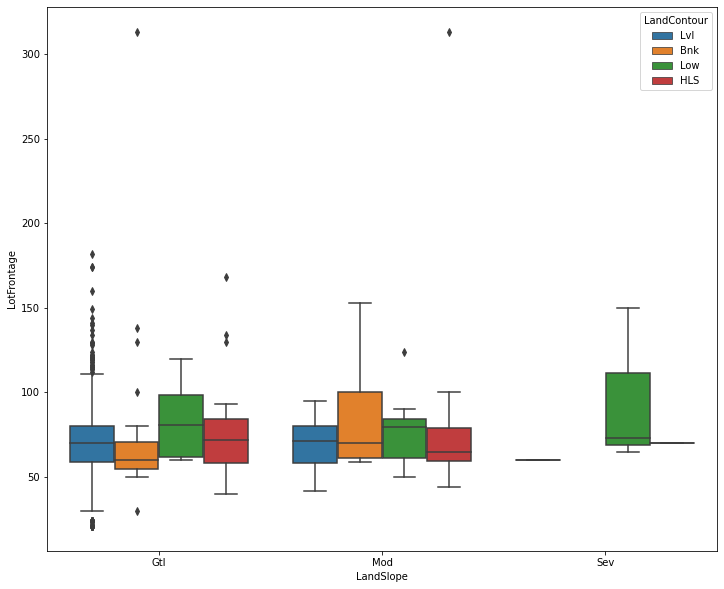

In [31]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df , x = 'LandSlope', y ='LotFrontage' , hue = 'LandContour')

<AxesSubplot:xlabel='LotConfig', ylabel='LotFrontage'>

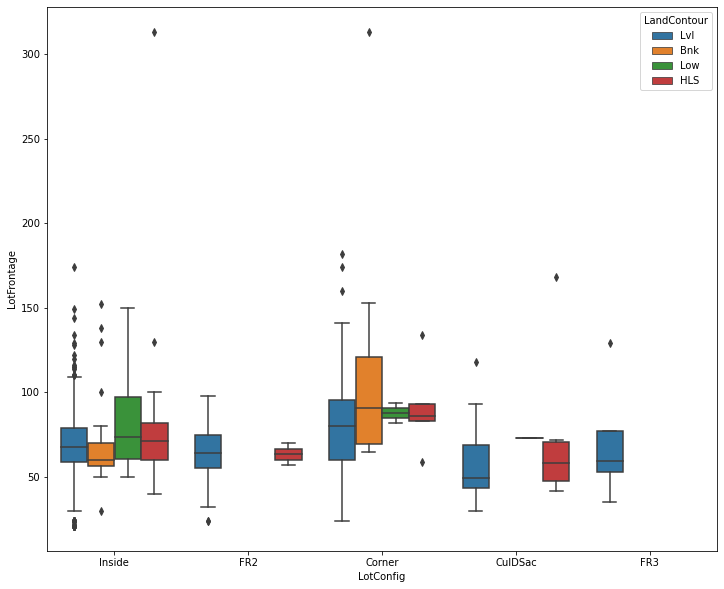

In [32]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df , x = 'LotConfig', y ='LotFrontage' , hue = 'LandContour')

<AxesSubplot:xlabel='BldgType', ylabel='LotFrontage'>

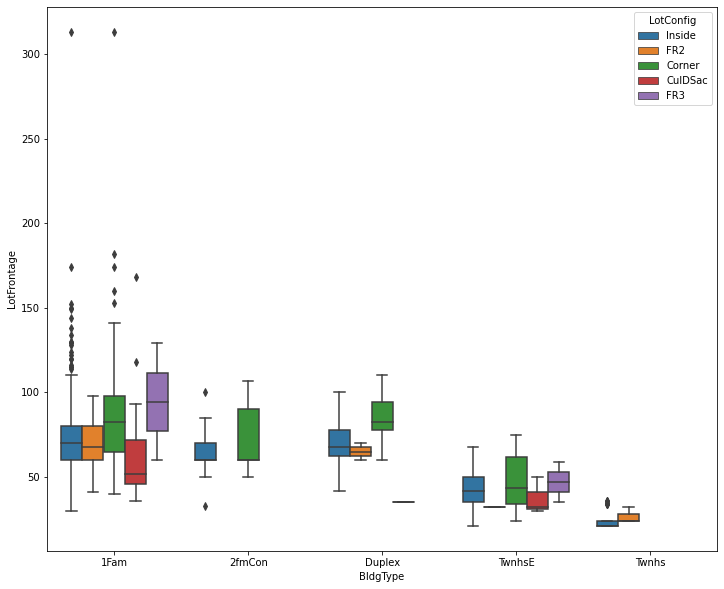

In [33]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df , x = 'BldgType', y ='LotFrontage' , hue = 'LotConfig')

# Let's work a bit on the 1stFlrSF as it is directly related to 

In [34]:
df['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [35]:
def FlrSF(x):
    if x in range(300,500):
        return 1
    elif x in range(500,700):
        return 2
    elif x in range(700,900):
        return 3
    elif x in range(900,1100):
        return 4
    elif x in range(1100,1300):
        return 5
    elif x in range(1300,1500):
        return 6
    elif x in range(1500,1700):
        return 7
    elif x in range(1700,1900):
        return 8
    elif x in range(1900,2100):
        return 9
    elif x in range(2100,2300):
        return 10
    elif x in range(2300,2500):
        return 11
    elif x in range(2500,2700):
        return 12
    elif x in range(2700,2900):
        return 13
    elif x in range(2900,3100):
        return 14
    elif x in range(3100,3300):
        return 15
    elif x in range(3300,3500):
        return 16
    elif x in range(3500,3700):
        return 17
    elif x in range(3700,3900):
        return 18
    elif x in range(3900,4100):
        return 19
    elif x in range(4100,4300):
        return 20
    elif x in range(4300,4500):
        return 21
    elif x in range(4500,4700):
        return 22

In [36]:
df['AreaCat'] = df['1stFlrSF'].apply(lambda x: FlrSF(x))

<AxesSubplot:xlabel='AreaCat', ylabel='LotFrontage'>

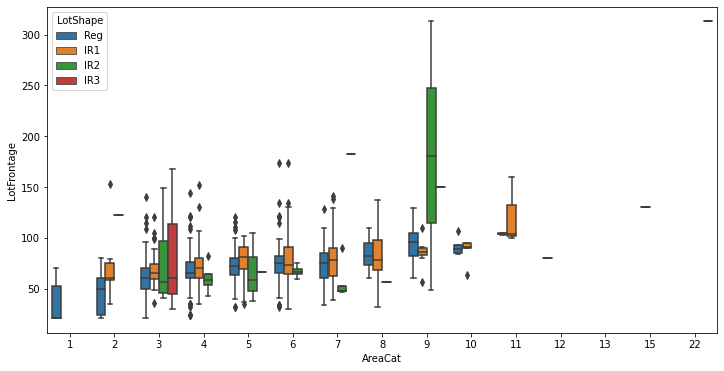

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df , x = 'AreaCat' , y = 'LotFrontage' , hue = 'LotShape' )

In [38]:
for i in range(1,12):
    for j in list(df['LotShape'].unique()):
        print(f"for AreaCat {i} and LotShape {j}, the LotFrontage is: ")
        print(df[(df['AreaCat']==i) & (df['LotShape']==j)]['LotFrontage'].median())        

for AreaCat 1 and LotShape Reg, the LotFrontage is: 
21.0
for AreaCat 1 and LotShape IR1, the LotFrontage is: 
nan
for AreaCat 1 and LotShape IR2, the LotFrontage is: 
nan
for AreaCat 1 and LotShape IR3, the LotFrontage is: 
nan
for AreaCat 2 and LotShape Reg, the LotFrontage is: 
50.0
for AreaCat 2 and LotShape IR1, the LotFrontage is: 
60.0
for AreaCat 2 and LotShape IR2, the LotFrontage is: 
122.0
for AreaCat 2 and LotShape IR3, the LotFrontage is: 
nan
for AreaCat 3 and LotShape Reg, the LotFrontage is: 
60.0
for AreaCat 3 and LotShape IR1, the LotFrontage is: 
65.0
for AreaCat 3 and LotShape IR2, the LotFrontage is: 
56.0
for AreaCat 3 and LotShape IR3, the LotFrontage is: 
60.0
for AreaCat 4 and LotShape Reg, the LotFrontage is: 
65.0
for AreaCat 4 and LotShape IR1, the LotFrontage is: 
70.0
for AreaCat 4 and LotShape IR2, the LotFrontage is: 
58.0
for AreaCat 4 and LotShape IR3, the LotFrontage is: 
nan
for AreaCat 5 and LotShape Reg, the LotFrontage is: 
72.0
for AreaCat 5 and 

# Since there are too many missing values with hue=LotShape ,  so we'll avoid using any hue in order to avoid any more missing values

<AxesSubplot:xlabel='AreaCat', ylabel='LotFrontage'>

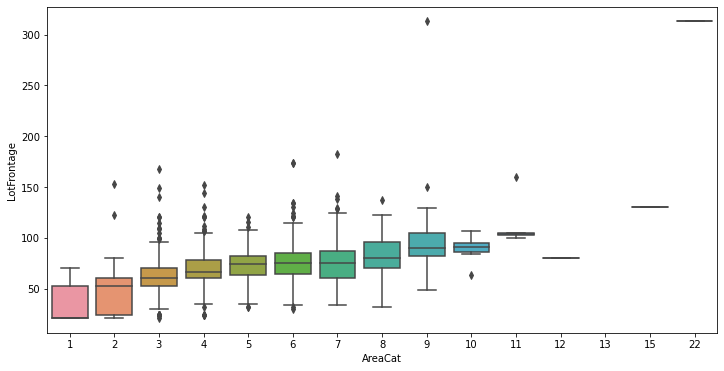

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df , x = 'AreaCat' , y = 'LotFrontage')

In [40]:
for i in range(1,23):
    print(f"For AreaCat {i} the Lot Frontage median is :")
    print(df[(df['AreaCat']==i)]['LotFrontage'].median())

For AreaCat 1 the Lot Frontage median is :
21.0
For AreaCat 2 the Lot Frontage median is :
52.0
For AreaCat 3 the Lot Frontage median is :
60.0
For AreaCat 4 the Lot Frontage median is :
66.0
For AreaCat 5 the Lot Frontage median is :
74.5
For AreaCat 6 the Lot Frontage median is :
75.0
For AreaCat 7 the Lot Frontage median is :
75.0
For AreaCat 8 the Lot Frontage median is :
80.0
For AreaCat 9 the Lot Frontage median is :
89.5
For AreaCat 10 the Lot Frontage median is :
90.5
For AreaCat 11 the Lot Frontage median is :
104.0
For AreaCat 12 the Lot Frontage median is :
80.0
For AreaCat 13 the Lot Frontage median is :
nan
For AreaCat 14 the Lot Frontage median is :
nan
For AreaCat 15 the Lot Frontage median is :
130.0
For AreaCat 16 the Lot Frontage median is :
nan
For AreaCat 17 the Lot Frontage median is :
nan
For AreaCat 18 the Lot Frontage median is :
nan
For AreaCat 19 the Lot Frontage median is :
nan
For AreaCat 20 the Lot Frontage median is :
nan
For AreaCat 21 the Lot Frontage me

In [41]:
def LFImputer(cols):
    lf = cols[0]
    ac = cols[1]
    if pd.isnull(lf):
        if ac == 1:
            return 21
        elif ac == 2:
            return 52
        elif ac == 3:
            return 60
        elif ac == 4:
            return 66
        elif ac == 5:
            return 74.5
        elif ac == 6:
            return 75
        elif ac == 7:
            return 75
        elif ac == 8:
            return 80
        elif ac == 9:
            return 89.5
        elif ac == 10:
            return 90.5
        elif ac == 11:
            return 104
        elif ac == 12:
            return 80
        elif ac == 13: # there was only one case for ac==13 and that too the value was missing, so I put in 70 as 70 is the median of the entire column
            return 70
        elif ac == 15:
            return 130
        elif ac == 22:
            return 313
    else:
        return lf

In [42]:
df['LotFrontage'] = df[['LotFrontage' , 'AreaCat']].apply(LFImputer , axis=1)

In [43]:
df['LotFrontage'].isna().sum()

0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [45]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [46]:
df.corr()['MasVnrArea'].sort_values()[:-1]

OverallCond     -0.128101
EnclosedPorch   -0.110204
BsmtFinSF2      -0.072319
LowQualFinSF    -0.069071
Id              -0.050298
KitchenAbvGr    -0.037610
MiscVal         -0.029815
YrSold          -0.008201
MoSold          -0.005965
PoolArea         0.011723
3SsnPorch        0.018796
MSSubClass       0.022936
BsmtHalfBath     0.026673
ScreenPorch      0.061466
BsmtFullBath     0.085310
BedroomAbvGr     0.102821
LotArea          0.104160
BsmtUnfSF        0.114442
OpenPorchSF      0.125703
WoodDeckSF       0.159718
2ndFlrSF         0.174561
YearRemodAdd     0.179618
LotFrontage      0.188212
HalfBath         0.201444
Fireplaces       0.249070
GarageYrBlt      0.252691
BsmtFinSF1       0.264736
FullBath         0.276833
TotRmsAbvGrd     0.280682
YearBuilt        0.315707
AreaCat          0.336199
1stFlrSF         0.344501
TotalBsmtSF      0.363936
GarageCars       0.364204
GarageArea       0.373066
GrLivArea        0.390857
OverallQual      0.411876
SalePrice        0.477493
Name: MasVnr

<AxesSubplot:xlabel='MasVnrType', ylabel='MasVnrArea'>

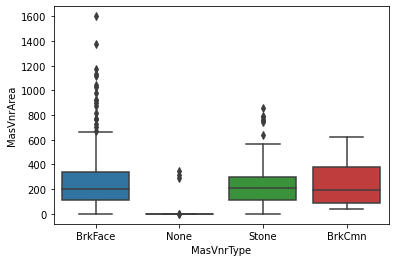

In [47]:
sns.boxplot(data=df,x='MasVnrType',y='MasVnrArea')

In [48]:
df.groupby('OverallQual').median()['MasVnrArea']

OverallQual
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7      14.0
8     176.0
9     300.0
10    420.0
Name: MasVnrArea, dtype: float64

In [49]:
df[df['MasVnrArea'].isna() == True]['OverallQual']

234      6
529      6
650      7
936      7
973      7
977      7
1243    10
1278     8
Name: OverallQual, dtype: int64

In [50]:
def MVAImpute(cols):
    mva = cols[0]
    oq = cols[1]
    if pd.isnull(mva):
        if oq == 6:
            return 0
        elif oq == 7:
            return 14
        elif oq == 8:
            return 176
        elif oq == 10:
            return 420
    else:
        return mva

In [51]:
df['MasVnrArea'] = df[['MasVnrArea','OverallQual']].apply(MVAImpute , axis=1)

In [52]:
df['MasVnrArea'].isnull().sum()

0

In [53]:
df.groupby('MasVnrType').median()['OverallQual']

MasVnrType
BrkCmn     5.0
BrkFace    6.0
None       5.0
Stone      8.0
Name: OverallQual, dtype: float64

In [54]:
df[df['MasVnrType'].isna() == True]['OverallQual']

234      6
529      6
650      7
936      7
973      7
977      7
1243    10
1278     8
Name: OverallQual, dtype: int64

In [55]:
def MVTImpute(cols):
    mvt = cols[0]
    oq = cols[1]
    if pd.isnull(mvt):
        if oq == 6:
            return 'BrkCmn'
        elif oq == 7:
            return 'BrkFace'
        elif oq == 8:
            return 'Stone'
        elif oq == 10:
            return 'Stone'
    else:
        return mvt

In [56]:
df['MasVnrType'] = df[['MasVnrType','OverallQual']].apply(MVTImpute , axis=1)

In [57]:
df['MasVnrType'].isna().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [59]:
df.corr()['GarageYrBlt'].sort_values()[:-1]

OverallCond     -0.324297
EnclosedPorch   -0.297003
KitchenAbvGr    -0.124411
BsmtFinSF2      -0.088011
BsmtHalfBath    -0.077464
ScreenPorch     -0.075418
BedroomAbvGr    -0.064518
LowQualFinSF    -0.036363
MiscVal         -0.032417
LotArea         -0.024947
PoolArea        -0.014501
YrSold          -0.001014
Id               0.000072
MoSold           0.005337
3SsnPorch        0.023544
Fireplaces       0.046822
LotFrontage      0.060358
2ndFlrSF         0.070832
MSSubClass       0.085072
BsmtFullBath     0.124553
TotRmsAbvGrd     0.148112
BsmtFinSF1       0.153484
BsmtUnfSF        0.190708
HalfBath         0.196785
WoodDeckSF       0.224577
OpenPorchSF      0.228425
GrLivArea        0.231197
AreaCat          0.232115
1stFlrSF         0.233449
MasVnrArea       0.251115
TotalBsmtSF      0.322445
FullBath         0.484557
SalePrice        0.486362
OverallQual      0.547766
GarageArea       0.564567
GarageCars       0.588920
YearRemodAdd     0.642277
YearBuilt        0.825667
Name: Garage

# GarageYrBlt is highly correlated to YearBuilt, there is a high chance that garage was built along with the house

In [60]:
def GYBImpute(cols):
    gyb = cols[0]
    yb = cols[1]
    if pd.isnull(gyb):
        return yb
    else:
        return gyb

In [61]:
df['GarageYrBlt'] = df[['GarageYrBlt','YearBuilt']].apply(GYBImpute , axis=1)

In [62]:
df['GarageYrBlt'].isna().sum()

0

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# All quantitative missing values are filled, let's jump to filling missing categorical values

# Let's assume BsmtQual depends on OverallQual of the house 


In [64]:
df.groupby('BsmtQual').mean()['OverallQual']
# 0 = NA
# 0-2 = Po
# 2-4 = Fa
# 4-6 = TA
# 6-8 = Gd
# 8-10 = Ex

BsmtQual
Ex    8.264463
Fa    4.885714
Gd    6.660194
TA    5.329738
Name: OverallQual, dtype: float64

In [65]:
df['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [66]:
df[df['BsmtQual'].isna()==True]['OverallQual']

17      4
39      4
90      4
102     5
156     5
182     5
259     5
342     3
362     7
371     4
392     5
520     4
532     5
533     1
553     4
646     5
705     4
736     3
749     4
778     5
868     5
894     5
897     5
984     5
1000    3
1011    5
1035    4
1045    3
1048    5
1049    4
1090    3
1179    5
1216    6
1218    4
1232    4
1321    3
1412    4
Name: OverallQual, dtype: int64

In [67]:
def Bsmtqualimputer(cols):
    bq = cols[0]
    oq = cols[1]
    if pd.isnull(bq):
        if oq == 0:
            return 'NA'
        elif oq in [1,2]:
            return 'Po'
        elif oq in [3,4]:
            return 'Fa'
        elif oq in [5,6]:
            return 'TA'
        elif oq in [7,8]:
            return 'Gd'
        elif oq in [9,10]:
            return 'Ex'
    else:
        return bq

In [68]:
df['BsmtQual'] = df[['BsmtQual','OverallQual']].apply(Bsmtqualimputer, axis=1)

In [69]:
df['BsmtQual'].isna().sum()

0

# BsmtCond is directly propotional to OverallCond as quality of basement is usually the same as that of house

In [70]:
df.groupby('BsmtCond').mean()['OverallCond']

BsmtCond
Fa    5.266667
Gd    5.953846
Po    1.500000
TA    5.589626
Name: OverallCond, dtype: float64

# I think the above BsmtQual imputer fucntion will also work on BsmtCond

In [71]:
df[df['BsmtCond'].isna()==True]['OverallCond']

17      5
39      5
90      5
102     5
156     7
182     6
259     5
342     4
362     5
371     4
392     7
520     7
532     7
533     3
553     5
646     5
705     5
736     4
749     3
778     5
868     6
894     5
897     5
984     5
1000    3
1011    5
1035    3
1045    5
1048    4
1049    7
1090    4
1179    5
1216    5
1218    5
1232    5
1321    6
1412    5
Name: OverallCond, dtype: int64

In [72]:
df['BsmtCond'] = df[['BsmtCond' , 'OverallCond']].apply(Bsmtqualimputer, axis=1)

In [73]:
df['BsmtCond'].isna().sum()

0

In [74]:
df.drop(['AreaCat'],axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# I think the quality of basement affects the exposure of the basement (since the quality expresses the height which in turn is resposible for the exposure), if the exposure in the basement is good then the quality are great as well and inverse is true also
# Let's map BsmtExposure on basementQual

In [76]:
df[df['BsmtExposure'].isna()==True]['BsmtQual']
# Gd and Ex -> Gd
# TA  -> Av
# Fa -> Mn
# Po -> No
# NA -> NA

17      Fa
39      Fa
90      Fa
102     TA
156     TA
182     TA
259     TA
342     Fa
362     Gd
371     Fa
392     TA
520     Fa
532     TA
533     Po
553     Fa
646     TA
705     Fa
736     Fa
749     Fa
778     TA
868     TA
894     TA
897     TA
948     Gd
984     TA
1000    Fa
1011    TA
1035    Fa
1045    Fa
1048    TA
1049    Fa
1090    Fa
1179    TA
1216    TA
1218    Fa
1232    Fa
1321    Fa
1412    Fa
Name: BsmtQual, dtype: object

In [77]:
def exposerimputer(cols):
    expose = cols[0]
    bq = cols[1]
    if pd.isnull(expose):
        if ((bq == 'Gd') | (bq =='Ex')):
            return 'Gd'
        elif bq=='TA':
            return 'Av'
        elif bq=='Fa':
            return 'Mn'
        elif bq == 'Po':
            return 'No'
        elif bq=='NA':
            return 'NA'
    else:
        return expose      

In [78]:
df['BsmtExposure'] = df[['BsmtExposure','BsmtQual']].apply(exposerimputer,axis=1)

In [79]:
df['BsmtExposure'].isna().sum()

0

# My hunch is BsmtFinType1 also depends upon the condition of the overall house...but the mean value of each category is too close, hence can't draw fine lines of distinctions 

In [80]:
 ''''

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
        Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

NA -> NA
Po -> Unf,LwQ  
Fa -> Rec , BLQ
TA ->  ALQ
Ex, Gd -> GLQ
'''

"'\n\n      GLQ\tGood Living Quarters\n      ALQ\tAverage Living Quarters\n      BLQ\tBelow Average Living Quarters\t\n      Rec\tAverage Rec Room\n      LwQ\tLow Quality\n      Unf\tUnfinshed\n      NA\tNo Basement\n      \n       Ex\tExcellent\n      Gd\tGood\n      TA\tTypical - slight dampness allowed\n      Fa\tFair - dampness or some cracking or settling\n      Po\tPoor - Severe cracking, settling, or wetness\n      NA\tNo Basement\n\nNA -> NA\nPo -> Unf,LwQ  \nFa -> Rec , BLQ\nTA ->  ALQ\nEx, Gd -> GLQ\n"

In [81]:
df[df['BsmtFinType1'].isna() == True]['BsmtCond']

17      TA
39      TA
90      TA
102     TA
156     Gd
182     TA
259     TA
342     Fa
362     TA
371     Fa
392     Gd
520     Gd
532     Gd
533     Fa
553     TA
646     TA
705     TA
736     Fa
749     Fa
778     TA
868     TA
894     TA
897     TA
984     TA
1000    Fa
1011    TA
1035    Fa
1045    TA
1048    Fa
1049    Gd
1090    Fa
1179    TA
1216    TA
1218    TA
1232    TA
1321    TA
1412    TA
Name: BsmtCond, dtype: object

In [82]:
def BFTimputer(cols):
    bft = cols[0]
    bc = cols[1]
    if pd.isnull(bft):
        if ((bc == 'Ex') | (bc=='Gd')):
            return 'GLQ'
        elif bc == 'TA':
            return 'ALQ'
        elif bc == 'Fa':
            return 'BLQ'
        elif bc == 'Po':
            return 'LwQ'
        elif bc == 'NA':
            return 'NA'
    else:
        return bft        

In [83]:
df['BsmtFinType1'] = df[['BsmtFinType1','BsmtCond']].apply(BFTimputer , axis = 1)

In [84]:
df['BsmtFinType1'].isna().sum()

0

# same thing can be approximated for BsmtFinType2...My Guess

In [85]:
df['BsmtFinType2'] = df[['BsmtFinType2','BsmtCond']].apply(BFTimputer , axis = 1)

In [86]:
df['BsmtFinType2'].isna().sum()

0

In [87]:
df[df['Electrical'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Let's fill the most frequent value in Electrical as only i value is missing

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
elec_imputer = SimpleImputer(missing_values=np.nan , strategy='most_frequent')

In [91]:
df['Electrical'] =  elec_imputer.fit_transform(df['Electrical'].values.reshape(-1,1))[: , 0]

In [92]:
df['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [93]:
df['Electrical'].isna().sum()

0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil


# Let's start filling GarageQual parameter , let's assosciate GarageQual with OverallQual

# I think we can use the same function which we used to impute BsmtQual as Garage's quality also contributes to overall quality

In [95]:
df['GarageQual'] = df[['GarageQual' , 'OverallQual']].apply(Bsmtqualimputer , axis=1)

In [96]:
df['GarageCond'] = df[['GarageCond','OverallCond']].apply(Bsmtqualimputer , axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [98]:
df.groupby('GarageType').max()['MSSubClass']

GarageType
2Types     190
Attchd     190
Basment    180
BuiltIn    190
CarPort    190
Detchd     190
Name: MSSubClass, dtype: int64

In [99]:
df[df['GarageType'].isna()==True]['BldgType']

39      Duplex
48      2fmCon
78      Duplex
88        1Fam
89        1Fam
         ...  
1349      1Fam
1407      1Fam
1449     Twnhs
1450    Duplex
1453      1Fam
Name: BldgType, Length: 81, dtype: object

In [100]:
df[df['BldgType']=='1Fam']['GarageType'].mode() # Attchd

0    Attchd
dtype: object

In [101]:
df[df['BldgType']=='2FmCon']['GarageType'].mode()

Series([], dtype: object)

In [102]:
df[df['BldgType']=='TwnhsE']['GarageType'].mode()

0    Attchd
dtype: object

In [103]:
df[df['BldgType']=='TwnhsI']['GarageType'].mode()

Series([], dtype: object)

In [104]:
df[df['GarageType']=='CarPort']['BldgType'].mode() # Duplex or 1Fam

0      1Fam
1    Duplex
dtype: object

In [105]:
df[df['GarageType']=='Detchd']['BldgType'].mode() # 1Fam

0    1Fam
dtype: object

# I think imputing Attchd for all the missing value will be ok as there is no fixed trend in this case
# I believed garage type depended upon bldg type which substantiates that missing values can be filled with Attchd

In [106]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [107]:
garage_type_imputer = SimpleImputer(missing_values=np.nan , strategy='most_frequent')
df['GarageType'] =  elec_imputer.fit_transform(df['GarageType'].values.reshape(-1,1))[: , 0]

In [108]:
df['GarageType'].isna().sum()

0

In [109]:
garage_finish_imputer = SimpleImputer(missing_values=np.nan , strategy='most_frequent')
df['GarageFinish'] =  elec_imputer.fit_transform(df['GarageFinish'].values.reshape(-1,1))[: , 0]

In [110]:
df['GarageFinish'].isna().sum()

0

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# ALL THE MISSING VALUES HAVE NOW BEEN FILLED

# NOW WE'LL TURN ALL THE CATEGORICAL COLUMNS INTO DUMMY VARIABLE COLUMNS AND MAKE THEM INTEGER TYPE FOR FURTHER SCALING AND MODELLING

# FINDING ALL THE COLUMNS WHICH ARE CATEGORICAL

In [112]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [113]:
df2 = df.copy

In [114]:
df2 = pd.get_dummies(data = df , columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'] , drop_first=True)

In [115]:
AOL = list(df2.select_dtypes(include=['uint8']).columns)
# collecting all the columns having dtype 'uint8' under a list variable AOL

In [116]:
df2.drop('Id',axis=1,inplace=True)

In [117]:
df2[AOL] = df2[AOL].astype(np.int64)
# converting all the uint8 type to int64

In [118]:
df2.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 234 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   LotFrontage            1460 non-null   float64
 2   LotArea                1460 non-null   int64  
 3   OverallQual            1460 non-null   int64  
 4   OverallCond            1460 non-null   int64  
 5   YearBuilt              1460 non-null   int64  
 6   YearRemodAdd           1460 non-null   int64  
 7   MasVnrArea             1460 non-null   float64
 8   BsmtFinSF1             1460 non-null   int64  
 9   BsmtFinSF2             1460 non-null   int64  
 10  BsmtUnfSF              1460 non-null   int64  
 11  TotalBsmtSF            1460 non-null   int64  
 12  1stFlrSF               1460 non-null   int64  
 13  2ndFlrSF               1460 non-null   int64  
 14  LowQualFinSF           1460 non-null   int64  
 15  GrL

# MAKING X & y and doing train_test_split

In [119]:
X = df2.drop('SalePrice',axis=1)

In [120]:
y = df2['SalePrice']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
sc = StandardScaler()

In [125]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# IMPLEMENTING REGRESSION MODELS

# 1) SVR

In [126]:
from sklearn.svm import SVR

In [127]:
svr = SVR()

In [128]:
svr.fit(X_train,y_train)

SVR()

In [129]:
pred_svr = svr.predict(X_test)

In [130]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [131]:
print(mean_absolute_error(y_test,pred_svr))

57024.13925063535


In [132]:
print(np.sqrt(mean_squared_error(y_test,pred_svr)))

84855.12243460456


In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
parameters = [{'C':[1,0.1,0.01,0.001,0.0001,10,100,1000,10000 ] , 'kernel': ['linear' ,'rbf', 'poly']  , 'gamma' : [1,0.1,0.01,0.001,0.0001,10,100,1000,10000 ]}] 

In [135]:
grid_search = GridSearchCV(estimator=svr , param_grid= parameters , verbose = 3 , refit=True  , n_jobs = -1)

In [136]:
#grid_search.fit(X_train,y_train)

In [137]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [139]:
#grid_search.best_score_

In [ ]:
#pred_grid_search = grid_search.predict(X_test)

In [ ]:
#print(mean_absolute_error(y_test,pred_svr))
#print(np.sqrt(mean_squared_error(y_test,pred_svr)))

# FITTING IN THE BEST PARAMETERS FOR SVR

In [140]:
svr = SVR(kernel='linear' , C=100 , gamma=1)

In [141]:
svr.fit(X_train,y_train)

SVR(C=100, gamma=1, kernel='linear')

In [142]:
pred_svr_best = svr.predict(X_test)

In [143]:
print(mean_absolute_error(y_test,pred_svr))
print(np.sqrt(mean_squared_error(y_test,pred_svr)))

57024.13925063535
84855.12243460456


# SVR MODEL IS NOT GOOD IN THIS CASE, EVEN AFTER TUNING IT DIDN'T IMPROVE MUCH AND THE TUNING ALSO COST A LOT OF TIME

# 2) Decision Tree Regression

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
dtree = DecisionTreeRegressor(random_state=42 , splitter='best', max_depth=10, criterion='mse')

In [146]:
dtree.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [147]:
pred_dtree = dtree.predict(X_test)

In [148]:
print(mean_absolute_error(y_test,pred_dtree))
print(np.sqrt(mean_squared_error(y_test,pred_dtree)))

24761.920712786552
37078.88520997704


In [149]:
df2['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [150]:
37000/181000

0.20441988950276244

# Implementing K-FOLD CROSS VALIDATION

In [151]:
from sklearn.model_selection import cross_val_score

In [152]:
rmse_dtree = cross_val_score(estimator=dtree , X = X_train, y = y_train , cv=10 , scoring= 'r2') 

In [153]:
print(rmse_dtree.mean())

0.6005219332388716


# RMSE of 37078, is kinda okay...but let's explore more models

In [154]:
rmse_svr = cross_val_score(estimator=svr , X = X_train, y = y_train , cv=10 , scoring= 'r2') 

In [155]:
print(rmse_svr.mean())

0.8211009469952526


# UP TILL NOW SVR has high R2 value but high rmse as well, whereas, DecisionTree has lower r2 but lower rmse also

# LET's TAKE SUMMARY OF BOTH THE MODELS

In [156]:
import statsmodels.api as sm
results = sm.OLS(y_test , pred_dtree).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.213e+04
Date:                Tue, 11 May 2021   Prob (F-statistic):                   7.26e-321
Time:                        19:21:19   Log-Likelihood:                         -5228.8
No. Observations:                 438   AIC:                                  1.046e+04
Df Residuals:                     437   BIC:                                  1.046e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9883      0.009    110.131      0.000       0.971       1.006
==============================================================================
Omnibus:                       38.596   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.345
Skew:                           0.052   Prob(JB):                     1.26e-41
Kurtosis:                       6.211   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
results = sm.OLS(y_test , pred_svr_best).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          1.901e+04
Date:                Tue, 11 May 2021   Prob (F-statistic):                        0.00
Time:                        19:21:24   Log-Likelihood:                         -5133.1
No. Observations:                 438   AIC:                                  1.027e+04
Df Residuals:                     437   BIC:                                  1.027e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0369      0.008    137.885      0.000       1.022       1.052
==============================================================================
Omnibus:                      371.444   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14030.644
Skew:                           3.345   Prob(JB):                         0.00
Kurtosis:                      29.908   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3) RANDOM FOREST REGRESSION

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
rf = RandomForestRegressor(random_state=42 , n_estimators = 10)

In [160]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [161]:
pred_rf = rf.predict(X_test)

In [162]:
print(mean_absolute_error(y_test , pred_rf))

17959.66095890411


In [163]:
print(np.sqrt(mean_squared_error(y_test,pred_rf)))

28632.7389141458


In [164]:
print(r2_score(y_test,pred_rf))

0.882513224125082


# RANDOM FOREST OUTPERFORMED SVR AND DECISION TREE

# LET'S TRY CATBOOST

In [165]:
from catboost import CatBoostRegressor

In [166]:
cb = CatBoostRegressor()

In [167]:
cb.fit(X_train,y_train)

Learning rate set to 0.039182
0:	learn: 75868.3358122	total: 143ms	remaining: 2m 22s
1:	learn: 74059.2760226	total: 153ms	remaining: 1m 16s
2:	learn: 72245.8415264	total: 161ms	remaining: 53.4s
3:	learn: 70576.0021684	total: 167ms	remaining: 41.5s
4:	learn: 68868.2359620	total: 172ms	remaining: 34.2s
5:	learn: 67232.6599901	total: 177ms	remaining: 29.4s
6:	learn: 65670.6964747	total: 184ms	remaining: 26.1s
7:	learn: 64091.3092126	total: 190ms	remaining: 23.6s
8:	learn: 62796.0641736	total: 197ms	remaining: 21.7s
9:	learn: 61523.5235857	total: 203ms	remaining: 20.1s
10:	learn: 60221.3115489	total: 209ms	remaining: 18.8s
11:	learn: 59007.6715136	total: 215ms	remaining: 17.7s
12:	learn: 57785.2712364	total: 221ms	remaining: 16.8s
13:	learn: 56642.2500189	total: 228ms	remaining: 16.1s
14:	learn: 55553.0256995	total: 233ms	remaining: 15.3s
15:	learn: 54482.6565936	total: 239ms	remaining: 14.7s
16:	learn: 53501.4568651	total: 245ms	remaining: 14.2s
17:	learn: 52411.3780576	total: 251ms	remai

157:	learn: 19068.6458835	total: 1.05s	remaining: 5.62s
158:	learn: 19021.9689468	total: 1.06s	remaining: 5.61s
159:	learn: 18973.5104806	total: 1.07s	remaining: 5.6s
160:	learn: 18937.7301795	total: 1.07s	remaining: 5.59s
161:	learn: 18876.2732128	total: 1.08s	remaining: 5.58s
162:	learn: 18797.4231404	total: 1.08s	remaining: 5.57s
163:	learn: 18758.5984170	total: 1.09s	remaining: 5.55s
164:	learn: 18711.0353304	total: 1.09s	remaining: 5.54s
165:	learn: 18663.4842877	total: 1.1s	remaining: 5.53s
166:	learn: 18613.7651916	total: 1.11s	remaining: 5.52s
167:	learn: 18575.4865826	total: 1.11s	remaining: 5.51s
168:	learn: 18548.7938399	total: 1.12s	remaining: 5.49s
169:	learn: 18512.9089738	total: 1.13s	remaining: 5.53s
170:	learn: 18499.7093874	total: 1.14s	remaining: 5.51s
171:	learn: 18458.8355250	total: 1.14s	remaining: 5.5s
172:	learn: 18391.7258836	total: 1.15s	remaining: 5.48s
173:	learn: 18330.0428886	total: 1.15s	remaining: 5.47s
174:	learn: 18313.4205807	total: 1.16s	remaining: 5

304:	learn: 14060.2698598	total: 1.92s	remaining: 4.38s
305:	learn: 14038.7159363	total: 1.93s	remaining: 4.38s
306:	learn: 14021.6603250	total: 1.94s	remaining: 4.37s
307:	learn: 13995.6591337	total: 1.94s	remaining: 4.36s
308:	learn: 13965.8192686	total: 1.95s	remaining: 4.36s
309:	learn: 13931.1364331	total: 1.95s	remaining: 4.35s
310:	learn: 13901.3312035	total: 1.96s	remaining: 4.34s
311:	learn: 13870.2723781	total: 1.97s	remaining: 4.33s
312:	learn: 13843.4589949	total: 1.97s	remaining: 4.33s
313:	learn: 13821.7883104	total: 1.98s	remaining: 4.32s
314:	learn: 13796.9601425	total: 1.98s	remaining: 4.32s
315:	learn: 13763.2465474	total: 1.99s	remaining: 4.31s
316:	learn: 13735.8615943	total: 2s	remaining: 4.32s
317:	learn: 13711.0456218	total: 2.01s	remaining: 4.31s
318:	learn: 13676.2650701	total: 2.02s	remaining: 4.31s
319:	learn: 13651.3267436	total: 2.02s	remaining: 4.3s
320:	learn: 13632.5402051	total: 2.03s	remaining: 4.3s
321:	learn: 13610.0631707	total: 2.04s	remaining: 4.2

459:	learn: 10999.3329435	total: 2.98s	remaining: 3.49s
460:	learn: 10978.3498781	total: 2.98s	remaining: 3.48s
461:	learn: 10956.9885014	total: 2.99s	remaining: 3.48s
462:	learn: 10931.3142964	total: 2.99s	remaining: 3.47s
463:	learn: 10912.6399860	total: 3s	remaining: 3.46s
464:	learn: 10887.2801922	total: 3s	remaining: 3.46s
465:	learn: 10863.6793611	total: 3.01s	remaining: 3.45s
466:	learn: 10836.2208387	total: 3.02s	remaining: 3.44s
467:	learn: 10803.1963581	total: 3.02s	remaining: 3.43s
468:	learn: 10780.9340380	total: 3.03s	remaining: 3.43s
469:	learn: 10759.1942212	total: 3.03s	remaining: 3.42s
470:	learn: 10747.2076563	total: 3.04s	remaining: 3.41s
471:	learn: 10732.4282516	total: 3.04s	remaining: 3.4s
472:	learn: 10705.5576066	total: 3.05s	remaining: 3.4s
473:	learn: 10688.6630685	total: 3.05s	remaining: 3.39s
474:	learn: 10682.8197584	total: 3.06s	remaining: 3.38s
475:	learn: 10666.4303872	total: 3.06s	remaining: 3.37s
476:	learn: 10655.8842706	total: 3.07s	remaining: 3.37s


617:	learn: 8651.0824464	total: 3.85s	remaining: 2.38s
618:	learn: 8640.8624100	total: 3.85s	remaining: 2.37s
619:	learn: 8629.3327933	total: 3.86s	remaining: 2.37s
620:	learn: 8612.3023112	total: 3.87s	remaining: 2.36s
621:	learn: 8604.6524947	total: 3.87s	remaining: 2.35s
622:	learn: 8596.5297062	total: 3.88s	remaining: 2.35s
623:	learn: 8579.5897354	total: 3.88s	remaining: 2.34s
624:	learn: 8563.0969194	total: 3.89s	remaining: 2.33s
625:	learn: 8542.6236320	total: 3.89s	remaining: 2.33s
626:	learn: 8531.2926017	total: 3.9s	remaining: 2.32s
627:	learn: 8526.5159181	total: 3.9s	remaining: 2.31s
628:	learn: 8508.6836171	total: 3.91s	remaining: 2.31s
629:	learn: 8505.8637154	total: 3.91s	remaining: 2.3s
630:	learn: 8494.4806644	total: 3.92s	remaining: 2.29s
631:	learn: 8485.1997058	total: 3.92s	remaining: 2.29s
632:	learn: 8470.0656391	total: 3.93s	remaining: 2.28s
633:	learn: 8460.1969487	total: 3.94s	remaining: 2.27s
634:	learn: 8442.0684272	total: 3.94s	remaining: 2.27s
635:	learn: 8

771:	learn: 7133.6931283	total: 4.71s	remaining: 1.39s
772:	learn: 7122.0589976	total: 4.72s	remaining: 1.39s
773:	learn: 7115.5343120	total: 4.73s	remaining: 1.38s
774:	learn: 7109.9939415	total: 4.73s	remaining: 1.37s
775:	learn: 7096.7440442	total: 4.74s	remaining: 1.37s
776:	learn: 7078.6908426	total: 4.75s	remaining: 1.36s
777:	learn: 7063.2576608	total: 4.75s	remaining: 1.35s
778:	learn: 7052.9580838	total: 4.76s	remaining: 1.35s
779:	learn: 7045.6329136	total: 4.76s	remaining: 1.34s
780:	learn: 7035.9075275	total: 4.77s	remaining: 1.34s
781:	learn: 7019.8967181	total: 4.77s	remaining: 1.33s
782:	learn: 7008.5527727	total: 4.78s	remaining: 1.32s
783:	learn: 7000.9736941	total: 4.79s	remaining: 1.32s
784:	learn: 6989.9314671	total: 4.79s	remaining: 1.31s
785:	learn: 6980.8191755	total: 4.8s	remaining: 1.31s
786:	learn: 6971.8719087	total: 4.8s	remaining: 1.3s
787:	learn: 6961.7959565	total: 4.81s	remaining: 1.29s
788:	learn: 6950.2457183	total: 4.82s	remaining: 1.29s
789:	learn: 6

923:	learn: 5902.8790066	total: 5.59s	remaining: 460ms
924:	learn: 5901.9029454	total: 5.59s	remaining: 453ms
925:	learn: 5888.8987838	total: 5.6s	remaining: 447ms
926:	learn: 5888.2920467	total: 5.6s	remaining: 441ms
927:	learn: 5886.4822646	total: 5.61s	remaining: 435ms
928:	learn: 5883.1550591	total: 5.62s	remaining: 429ms
929:	learn: 5879.7310052	total: 5.62s	remaining: 423ms
930:	learn: 5874.2785937	total: 5.63s	remaining: 417ms
931:	learn: 5873.7356801	total: 5.63s	remaining: 411ms
932:	learn: 5867.0148184	total: 5.64s	remaining: 405ms
933:	learn: 5860.9027617	total: 5.64s	remaining: 399ms
934:	learn: 5853.1887239	total: 5.65s	remaining: 393ms
935:	learn: 5847.5520449	total: 5.65s	remaining: 387ms
936:	learn: 5844.5830928	total: 5.66s	remaining: 381ms
937:	learn: 5840.3068162	total: 5.67s	remaining: 374ms
938:	learn: 5831.8276062	total: 5.67s	remaining: 368ms
939:	learn: 5822.7745383	total: 5.68s	remaining: 362ms
940:	learn: 5821.8934861	total: 5.68s	remaining: 356ms
941:	learn: 

In [168]:
pred_cb = cb.predict(X_test)

In [169]:
print(mean_absolute_error(y_test , pred_cb))

14132.709366396546


In [170]:
print(np.sqrt(mean_squared_error(y_test , pred_cb)))

23032.651154582134


In [171]:
print(r2_score(y_test,pred_cb))

0.9239759399367451


# CATBOOST OUTPERFORMED EVEN RANDOMFOREST....CATBOOST TURNS OUT TO BE THE BEST MODEL

In [172]:
err = cross_val_score(estimator=cb , X = X_train, y = y_train , cv = 10 , scoring='r2')

Learning rate set to 0.038448
0:	learn: 74097.4683774	total: 4.96ms	remaining: 4.95s
1:	learn: 72545.7806285	total: 10.6ms	remaining: 5.31s
2:	learn: 70733.5075246	total: 16.5ms	remaining: 5.49s
3:	learn: 69223.2656878	total: 22.4ms	remaining: 5.58s
4:	learn: 67697.6693767	total: 27.9ms	remaining: 5.56s
5:	learn: 66207.0919865	total: 33.3ms	remaining: 5.52s
6:	learn: 64801.8605139	total: 39.2ms	remaining: 5.56s
7:	learn: 63398.0372271	total: 45ms	remaining: 5.57s
8:	learn: 62056.9967518	total: 50.4ms	remaining: 5.55s
9:	learn: 60891.3723327	total: 56.5ms	remaining: 5.59s
10:	learn: 59577.0354755	total: 62.2ms	remaining: 5.59s
11:	learn: 58373.7614906	total: 67.8ms	remaining: 5.58s
12:	learn: 57240.8355921	total: 73.2ms	remaining: 5.56s
13:	learn: 56141.7747622	total: 78.3ms	remaining: 5.51s
14:	learn: 55003.5156663	total: 83.7ms	remaining: 5.49s
15:	learn: 53833.7285236	total: 89.2ms	remaining: 5.48s
16:	learn: 52806.3355897	total: 94.7ms	remaining: 5.48s
17:	learn: 51792.5251969	total

176:	learn: 17729.0046557	total: 1.05s	remaining: 4.9s
177:	learn: 17681.4257175	total: 1.07s	remaining: 4.96s
178:	learn: 17638.0021959	total: 1.08s	remaining: 4.95s
179:	learn: 17629.4318858	total: 1.08s	remaining: 4.95s
180:	learn: 17577.1390991	total: 1.09s	remaining: 4.94s
181:	learn: 17514.4235944	total: 1.1s	remaining: 4.93s
182:	learn: 17450.2995724	total: 1.1s	remaining: 4.92s
183:	learn: 17403.5472434	total: 1.11s	remaining: 4.92s
184:	learn: 17379.9591072	total: 1.11s	remaining: 4.91s
185:	learn: 17354.0480879	total: 1.12s	remaining: 4.9s
186:	learn: 17302.2744619	total: 1.12s	remaining: 4.89s
187:	learn: 17274.4087038	total: 1.13s	remaining: 4.88s
188:	learn: 17260.1435434	total: 1.14s	remaining: 4.87s
189:	learn: 17212.3408378	total: 1.14s	remaining: 4.86s
190:	learn: 17183.8956509	total: 1.15s	remaining: 4.85s
191:	learn: 17166.2629985	total: 1.15s	remaining: 4.84s
192:	learn: 17103.9754751	total: 1.16s	remaining: 4.83s
193:	learn: 17046.4300650	total: 1.16s	remaining: 4.

343:	learn: 13022.5413447	total: 2.1s	remaining: 4.01s
344:	learn: 13005.4152178	total: 2.11s	remaining: 4.01s
345:	learn: 12990.1604884	total: 2.12s	remaining: 4s
346:	learn: 12960.4662580	total: 2.12s	remaining: 4s
347:	learn: 12934.9962591	total: 2.13s	remaining: 3.99s
348:	learn: 12911.5266882	total: 2.14s	remaining: 3.98s
349:	learn: 12908.4073800	total: 2.14s	remaining: 3.98s
350:	learn: 12883.1925085	total: 2.15s	remaining: 3.97s
351:	learn: 12851.0242864	total: 2.15s	remaining: 3.96s
352:	learn: 12838.6149387	total: 2.16s	remaining: 3.96s
353:	learn: 12821.7965614	total: 2.17s	remaining: 3.96s
354:	learn: 12801.5678522	total: 2.17s	remaining: 3.95s
355:	learn: 12771.1342323	total: 2.18s	remaining: 3.94s
356:	learn: 12736.4196392	total: 2.19s	remaining: 3.94s
357:	learn: 12710.2562160	total: 2.22s	remaining: 3.98s
358:	learn: 12698.8707966	total: 2.23s	remaining: 3.99s
359:	learn: 12679.5549616	total: 2.24s	remaining: 3.99s
360:	learn: 12662.8197070	total: 2.25s	remaining: 3.99s

507:	learn: 10188.0756201	total: 3.15s	remaining: 3.05s
508:	learn: 10178.9272732	total: 3.16s	remaining: 3.05s
509:	learn: 10157.0580384	total: 3.17s	remaining: 3.05s
510:	learn: 10149.4455550	total: 3.18s	remaining: 3.04s
511:	learn: 10130.5003058	total: 3.18s	remaining: 3.03s
512:	learn: 10123.4877670	total: 3.19s	remaining: 3.03s
513:	learn: 10110.5013066	total: 3.19s	remaining: 3.02s
514:	learn: 10074.8250810	total: 3.2s	remaining: 3.01s
515:	learn: 10066.3723265	total: 3.21s	remaining: 3.01s
516:	learn: 10044.9793912	total: 3.21s	remaining: 3s
517:	learn: 10041.0146946	total: 3.22s	remaining: 2.99s
518:	learn: 10028.9867733	total: 3.22s	remaining: 2.98s
519:	learn: 10019.1915918	total: 3.23s	remaining: 2.98s
520:	learn: 10013.2290484	total: 3.23s	remaining: 2.97s
521:	learn: 9993.4590970	total: 3.24s	remaining: 2.96s
522:	learn: 9971.6958318	total: 3.24s	remaining: 2.96s
523:	learn: 9964.8528118	total: 3.25s	remaining: 2.95s
524:	learn: 9947.1197812	total: 3.25s	remaining: 2.94s


677:	learn: 8040.3618010	total: 4.2s	remaining: 1.99s
678:	learn: 8035.3394013	total: 4.21s	remaining: 1.99s
679:	learn: 8022.2811169	total: 4.21s	remaining: 1.98s
680:	learn: 8013.5644047	total: 4.22s	remaining: 1.98s
681:	learn: 8004.9184856	total: 4.22s	remaining: 1.97s
682:	learn: 8000.7250892	total: 4.23s	remaining: 1.96s
683:	learn: 7988.7772319	total: 4.24s	remaining: 1.96s
684:	learn: 7987.4274101	total: 4.25s	remaining: 1.95s
685:	learn: 7976.9579878	total: 4.25s	remaining: 1.95s
686:	learn: 7964.8315187	total: 4.26s	remaining: 1.94s
687:	learn: 7957.9318244	total: 4.26s	remaining: 1.93s
688:	learn: 7944.6110324	total: 4.27s	remaining: 1.93s
689:	learn: 7934.2446543	total: 4.28s	remaining: 1.92s
690:	learn: 7924.0304818	total: 4.28s	remaining: 1.92s
691:	learn: 7922.1416760	total: 4.29s	remaining: 1.91s
692:	learn: 7910.9511692	total: 4.29s	remaining: 1.9s
693:	learn: 7891.6493898	total: 4.3s	remaining: 1.9s
694:	learn: 7880.5668901	total: 4.32s	remaining: 1.9s
695:	learn: 786

830:	learn: 6611.6134169	total: 5.24s	remaining: 1.07s
831:	learn: 6604.6900740	total: 5.25s	remaining: 1.06s
832:	learn: 6595.0911061	total: 5.26s	remaining: 1.05s
833:	learn: 6586.3262241	total: 5.26s	remaining: 1.05s
834:	learn: 6581.9532493	total: 5.27s	remaining: 1.04s
835:	learn: 6573.8406363	total: 5.28s	remaining: 1.03s
836:	learn: 6561.8993068	total: 5.28s	remaining: 1.03s
837:	learn: 6551.5146192	total: 5.29s	remaining: 1.02s
838:	learn: 6541.4405196	total: 5.29s	remaining: 1.02s
839:	learn: 6535.6926084	total: 5.32s	remaining: 1.01s
840:	learn: 6523.7795902	total: 5.33s	remaining: 1.01s
841:	learn: 6517.0302169	total: 5.34s	remaining: 1s
842:	learn: 6505.0342081	total: 5.34s	remaining: 995ms
843:	learn: 6502.8620614	total: 5.35s	remaining: 989ms
844:	learn: 6496.5411447	total: 5.35s	remaining: 982ms
845:	learn: 6495.0193434	total: 5.36s	remaining: 976ms
846:	learn: 6492.8479463	total: 5.37s	remaining: 969ms
847:	learn: 6487.9820721	total: 5.37s	remaining: 963ms
848:	learn: 6

Learning rate set to 0.038448
0:	learn: 76269.8240302	total: 4.58ms	remaining: 4.57s
1:	learn: 74507.1137782	total: 9.85ms	remaining: 4.91s
2:	learn: 72698.4409742	total: 19ms	remaining: 6.31s
3:	learn: 71225.9074970	total: 24ms	remaining: 5.99s
4:	learn: 69692.0307417	total: 29.2ms	remaining: 5.81s
5:	learn: 68178.4627286	total: 34.6ms	remaining: 5.74s
6:	learn: 66665.3125522	total: 39.9ms	remaining: 5.66s
7:	learn: 65276.1279580	total: 45.3ms	remaining: 5.62s
8:	learn: 63926.7109850	total: 50.9ms	remaining: 5.6s
9:	learn: 62528.5873014	total: 56.1ms	remaining: 5.55s
10:	learn: 61288.5557978	total: 61.3ms	remaining: 5.51s
11:	learn: 60153.6279046	total: 66.7ms	remaining: 5.49s
12:	learn: 59098.2860592	total: 72.2ms	remaining: 5.48s
13:	learn: 57810.3536790	total: 77.6ms	remaining: 5.47s
14:	learn: 56698.8444564	total: 82.9ms	remaining: 5.44s
15:	learn: 55703.7530720	total: 88.1ms	remaining: 5.42s
16:	learn: 54661.3658785	total: 93.4ms	remaining: 5.4s
17:	learn: 53722.3651999	total: 98

152:	learn: 19463.6495094	total: 864ms	remaining: 4.78s
153:	learn: 19422.9269660	total: 872ms	remaining: 4.79s
154:	learn: 19351.0662377	total: 879ms	remaining: 4.79s
155:	learn: 19338.2087332	total: 887ms	remaining: 4.8s
156:	learn: 19278.7256120	total: 893ms	remaining: 4.79s
157:	learn: 19209.2774799	total: 899ms	remaining: 4.79s
158:	learn: 19159.0787652	total: 904ms	remaining: 4.78s
159:	learn: 19083.0273312	total: 909ms	remaining: 4.77s
160:	learn: 19043.5992337	total: 917ms	remaining: 4.78s
161:	learn: 18975.8878770	total: 922ms	remaining: 4.77s
162:	learn: 18931.3221336	total: 927ms	remaining: 4.76s
163:	learn: 18853.0795902	total: 933ms	remaining: 4.75s
164:	learn: 18810.4915963	total: 938ms	remaining: 4.75s
165:	learn: 18756.8061178	total: 943ms	remaining: 4.74s
166:	learn: 18711.9899121	total: 948ms	remaining: 4.73s
167:	learn: 18646.3081821	total: 954ms	remaining: 4.72s
168:	learn: 18585.9259437	total: 959ms	remaining: 4.72s
169:	learn: 18534.9287927	total: 964ms	remaining:

327:	learn: 13617.8795452	total: 1.91s	remaining: 3.92s
328:	learn: 13585.6107066	total: 1.92s	remaining: 3.92s
329:	learn: 13555.8080732	total: 1.93s	remaining: 3.91s
330:	learn: 13524.2995963	total: 1.93s	remaining: 3.91s
331:	learn: 13519.7366662	total: 1.94s	remaining: 3.9s
332:	learn: 13488.2071456	total: 1.95s	remaining: 3.9s
333:	learn: 13457.9272708	total: 1.95s	remaining: 3.89s
334:	learn: 13430.6523840	total: 1.96s	remaining: 3.88s
335:	learn: 13406.1309199	total: 1.96s	remaining: 3.88s
336:	learn: 13382.8481874	total: 1.97s	remaining: 3.87s
337:	learn: 13347.1927852	total: 1.97s	remaining: 3.87s
338:	learn: 13318.0819313	total: 1.98s	remaining: 3.86s
339:	learn: 13302.8761493	total: 1.98s	remaining: 3.85s
340:	learn: 13272.2611964	total: 1.99s	remaining: 3.85s
341:	learn: 13242.6831094	total: 2s	remaining: 3.84s
342:	learn: 13201.8135003	total: 2s	remaining: 3.83s
343:	learn: 13182.5469283	total: 2s	remaining: 3.83s
344:	learn: 13171.3173314	total: 2.02s	remaining: 3.83s
345

476:	learn: 10547.4472562	total: 2.78s	remaining: 3.05s
477:	learn: 10517.7366567	total: 2.79s	remaining: 3.05s
478:	learn: 10509.1233442	total: 2.79s	remaining: 3.04s
479:	learn: 10486.5301770	total: 2.8s	remaining: 3.03s
480:	learn: 10473.8922533	total: 2.81s	remaining: 3.03s
481:	learn: 10451.9209312	total: 2.81s	remaining: 3.02s
482:	learn: 10441.6193947	total: 2.82s	remaining: 3.02s
483:	learn: 10439.6526752	total: 2.82s	remaining: 3.01s
484:	learn: 10418.0467984	total: 2.83s	remaining: 3s
485:	learn: 10406.5610602	total: 2.83s	remaining: 3s
486:	learn: 10388.5304943	total: 2.84s	remaining: 2.99s
487:	learn: 10366.2352853	total: 2.85s	remaining: 2.99s
488:	learn: 10347.9011531	total: 2.85s	remaining: 2.98s
489:	learn: 10344.8875193	total: 2.86s	remaining: 2.97s
490:	learn: 10327.7024510	total: 2.86s	remaining: 2.97s
491:	learn: 10306.6822588	total: 2.87s	remaining: 2.96s
492:	learn: 10290.4372949	total: 2.87s	remaining: 2.96s
493:	learn: 10273.6043030	total: 2.88s	remaining: 2.95s

627:	learn: 8574.6821061	total: 3.65s	remaining: 2.16s
628:	learn: 8559.8605678	total: 3.66s	remaining: 2.16s
629:	learn: 8557.0953783	total: 3.66s	remaining: 2.15s
630:	learn: 8536.5493409	total: 3.67s	remaining: 2.15s
631:	learn: 8535.3220282	total: 3.68s	remaining: 2.14s
632:	learn: 8534.0368678	total: 3.68s	remaining: 2.13s
633:	learn: 8513.5418086	total: 3.69s	remaining: 2.13s
634:	learn: 8506.9863224	total: 3.69s	remaining: 2.12s
635:	learn: 8505.0774942	total: 3.7s	remaining: 2.12s
636:	learn: 8492.3785176	total: 3.7s	remaining: 2.11s
637:	learn: 8476.0454343	total: 3.71s	remaining: 2.1s
638:	learn: 8467.1276743	total: 3.71s	remaining: 2.1s
639:	learn: 8465.3314115	total: 3.72s	remaining: 2.09s
640:	learn: 8454.6758980	total: 3.73s	remaining: 2.09s
641:	learn: 8441.3603498	total: 3.73s	remaining: 2.08s
642:	learn: 8427.6003410	total: 3.74s	remaining: 2.08s
643:	learn: 8418.6407186	total: 3.74s	remaining: 2.07s
644:	learn: 8408.1019836	total: 3.75s	remaining: 2.06s
645:	learn: 83

779:	learn: 6930.4335532	total: 4.53s	remaining: 1.28s
780:	learn: 6919.5735874	total: 4.53s	remaining: 1.27s
781:	learn: 6906.8633953	total: 4.54s	remaining: 1.26s
782:	learn: 6906.2503842	total: 4.55s	remaining: 1.26s
783:	learn: 6894.9064013	total: 4.55s	remaining: 1.25s
784:	learn: 6880.3201853	total: 4.56s	remaining: 1.25s
785:	learn: 6864.9040686	total: 4.56s	remaining: 1.24s
786:	learn: 6863.4363337	total: 4.57s	remaining: 1.24s
787:	learn: 6861.8501749	total: 4.58s	remaining: 1.23s
788:	learn: 6850.9858490	total: 4.58s	remaining: 1.23s
789:	learn: 6844.4200820	total: 4.59s	remaining: 1.22s
790:	learn: 6840.5420055	total: 4.59s	remaining: 1.21s
791:	learn: 6833.5009916	total: 4.6s	remaining: 1.21s
792:	learn: 6825.6344756	total: 4.6s	remaining: 1.2s
793:	learn: 6819.1048059	total: 4.61s	remaining: 1.2s
794:	learn: 6818.2455290	total: 4.61s	remaining: 1.19s
795:	learn: 6813.9203628	total: 4.62s	remaining: 1.18s
796:	learn: 6808.5242135	total: 4.62s	remaining: 1.18s
797:	learn: 67

956:	learn: 5591.7650108	total: 5.57s	remaining: 250ms
957:	learn: 5580.2718093	total: 5.58s	remaining: 245ms
958:	learn: 5573.7641609	total: 5.58s	remaining: 239ms
959:	learn: 5569.6631495	total: 5.59s	remaining: 233ms
960:	learn: 5568.8145759	total: 5.6s	remaining: 227ms
961:	learn: 5563.3358208	total: 5.6s	remaining: 221ms
962:	learn: 5558.3132222	total: 5.61s	remaining: 215ms
963:	learn: 5553.8095659	total: 5.61s	remaining: 210ms
964:	learn: 5547.9877884	total: 5.62s	remaining: 204ms
965:	learn: 5547.6197226	total: 5.63s	remaining: 198ms
966:	learn: 5537.0903446	total: 5.63s	remaining: 192ms
967:	learn: 5530.4869200	total: 5.64s	remaining: 186ms
968:	learn: 5521.5234295	total: 5.64s	remaining: 180ms
969:	learn: 5510.6531181	total: 5.65s	remaining: 175ms
970:	learn: 5505.4009364	total: 5.65s	remaining: 169ms
971:	learn: 5501.3039738	total: 5.66s	remaining: 163ms
972:	learn: 5493.3641333	total: 5.66s	remaining: 157ms
973:	learn: 5486.4524143	total: 5.67s	remaining: 151ms
974:	learn: 

121:	learn: 20886.2291388	total: 869ms	remaining: 6.25s
122:	learn: 20819.0615179	total: 875ms	remaining: 6.24s
123:	learn: 20725.4451006	total: 882ms	remaining: 6.23s
124:	learn: 20639.2284732	total: 888ms	remaining: 6.22s
125:	learn: 20563.1707846	total: 895ms	remaining: 6.21s
126:	learn: 20487.6861207	total: 901ms	remaining: 6.19s
127:	learn: 20415.5697881	total: 907ms	remaining: 6.18s
128:	learn: 20349.0346436	total: 913ms	remaining: 6.16s
129:	learn: 20281.5665853	total: 918ms	remaining: 6.14s
130:	learn: 20206.3067051	total: 924ms	remaining: 6.13s
131:	learn: 20131.6468273	total: 929ms	remaining: 6.11s
132:	learn: 20058.8895661	total: 935ms	remaining: 6.09s
133:	learn: 19956.4143693	total: 940ms	remaining: 6.07s
134:	learn: 19937.5345056	total: 945ms	remaining: 6.05s
135:	learn: 19862.2286832	total: 951ms	remaining: 6.04s
136:	learn: 19785.9052323	total: 956ms	remaining: 6.02s
137:	learn: 19688.4364612	total: 962ms	remaining: 6.01s
138:	learn: 19607.1975339	total: 967ms	remaining

286:	learn: 13950.3576135	total: 1.92s	remaining: 4.77s
287:	learn: 13926.6337043	total: 1.93s	remaining: 4.76s
288:	learn: 13896.8827409	total: 1.93s	remaining: 4.76s
289:	learn: 13867.9439561	total: 1.94s	remaining: 4.76s
290:	learn: 13820.0636621	total: 1.95s	remaining: 4.75s
291:	learn: 13789.3373142	total: 1.96s	remaining: 4.75s
292:	learn: 13756.0814694	total: 1.96s	remaining: 4.74s
293:	learn: 13730.1088809	total: 1.97s	remaining: 4.73s
294:	learn: 13700.3266031	total: 1.98s	remaining: 4.73s
295:	learn: 13669.9427662	total: 2s	remaining: 4.75s
296:	learn: 13641.6520082	total: 2s	remaining: 4.74s
297:	learn: 13616.1859551	total: 2.01s	remaining: 4.73s
298:	learn: 13592.6061286	total: 2.02s	remaining: 4.73s
299:	learn: 13563.2363415	total: 2.02s	remaining: 4.72s
300:	learn: 13536.5186148	total: 2.03s	remaining: 4.71s
301:	learn: 13521.9444344	total: 2.04s	remaining: 4.7s
302:	learn: 13500.3615117	total: 2.04s	remaining: 4.7s
303:	learn: 13465.6517363	total: 2.05s	remaining: 4.69s


455:	learn: 10640.6662673	total: 2.96s	remaining: 3.54s
456:	learn: 10620.9549806	total: 2.97s	remaining: 3.53s
457:	learn: 10598.9425917	total: 2.98s	remaining: 3.52s
458:	learn: 10579.1587366	total: 2.98s	remaining: 3.52s
459:	learn: 10561.0939440	total: 2.99s	remaining: 3.51s
460:	learn: 10540.3026945	total: 3s	remaining: 3.5s
461:	learn: 10526.6424978	total: 3s	remaining: 3.5s
462:	learn: 10496.9733714	total: 3.01s	remaining: 3.49s
463:	learn: 10486.6186850	total: 3.01s	remaining: 3.48s
464:	learn: 10460.5899150	total: 3.02s	remaining: 3.48s
465:	learn: 10433.1043211	total: 3.03s	remaining: 3.47s
466:	learn: 10427.2502895	total: 3.03s	remaining: 3.46s
467:	learn: 10401.8859792	total: 3.04s	remaining: 3.45s
468:	learn: 10399.1496156	total: 3.04s	remaining: 3.44s
469:	learn: 10384.7886125	total: 3.05s	remaining: 3.44s
470:	learn: 10362.1417820	total: 3.05s	remaining: 3.43s
471:	learn: 10338.5040645	total: 3.06s	remaining: 3.42s
472:	learn: 10319.9434745	total: 3.07s	remaining: 3.42s


628:	learn: 8330.4065912	total: 4.01s	remaining: 2.37s
629:	learn: 8318.6004360	total: 4.03s	remaining: 2.37s
630:	learn: 8302.1701633	total: 4.04s	remaining: 2.36s
631:	learn: 8287.6087368	total: 4.06s	remaining: 2.36s
632:	learn: 8280.9652275	total: 4.07s	remaining: 2.36s
633:	learn: 8280.1210452	total: 4.08s	remaining: 2.35s
634:	learn: 8278.4012593	total: 4.08s	remaining: 2.35s
635:	learn: 8259.3359575	total: 4.09s	remaining: 2.34s
636:	learn: 8238.0811981	total: 4.09s	remaining: 2.33s
637:	learn: 8225.9624440	total: 4.1s	remaining: 2.33s
638:	learn: 8216.7037788	total: 4.11s	remaining: 2.32s
639:	learn: 8215.7626475	total: 4.11s	remaining: 2.31s
640:	learn: 8204.2298422	total: 4.12s	remaining: 2.31s
641:	learn: 8190.9677542	total: 4.13s	remaining: 2.3s
642:	learn: 8181.5639078	total: 4.13s	remaining: 2.29s
643:	learn: 8179.3578344	total: 4.13s	remaining: 2.29s
644:	learn: 8162.4324941	total: 4.14s	remaining: 2.28s
645:	learn: 8149.6574590	total: 4.15s	remaining: 2.27s
646:	learn: 

791:	learn: 6778.8239463	total: 5.05s	remaining: 1.33s
792:	learn: 6773.4201969	total: 5.06s	remaining: 1.32s
793:	learn: 6760.3251479	total: 5.07s	remaining: 1.31s
794:	learn: 6754.2967262	total: 5.08s	remaining: 1.31s
795:	learn: 6742.8365254	total: 5.08s	remaining: 1.3s
796:	learn: 6733.5588040	total: 5.09s	remaining: 1.3s
797:	learn: 6732.4921027	total: 5.09s	remaining: 1.29s
798:	learn: 6725.0945274	total: 5.1s	remaining: 1.28s
799:	learn: 6710.6506055	total: 5.11s	remaining: 1.28s
800:	learn: 6708.4044732	total: 5.11s	remaining: 1.27s
801:	learn: 6689.9310205	total: 5.12s	remaining: 1.26s
802:	learn: 6689.0878438	total: 5.12s	remaining: 1.26s
803:	learn: 6688.4848487	total: 5.13s	remaining: 1.25s
804:	learn: 6677.1422403	total: 5.13s	remaining: 1.24s
805:	learn: 6675.3956954	total: 5.14s	remaining: 1.24s
806:	learn: 6663.3177108	total: 5.14s	remaining: 1.23s
807:	learn: 6656.7269979	total: 5.15s	remaining: 1.22s
808:	learn: 6646.3796806	total: 5.16s	remaining: 1.22s
809:	learn: 6

965:	learn: 5480.3638506	total: 6.1s	remaining: 215ms
966:	learn: 5475.8588355	total: 6.11s	remaining: 208ms
967:	learn: 5473.6063633	total: 6.11s	remaining: 202ms
968:	learn: 5466.6451859	total: 6.12s	remaining: 196ms
969:	learn: 5456.7234441	total: 6.12s	remaining: 189ms
970:	learn: 5455.9632723	total: 6.13s	remaining: 183ms
971:	learn: 5446.2556098	total: 6.14s	remaining: 177ms
972:	learn: 5437.9616140	total: 6.14s	remaining: 170ms
973:	learn: 5437.5962880	total: 6.15s	remaining: 164ms
974:	learn: 5437.3573430	total: 6.15s	remaining: 158ms
975:	learn: 5433.0468746	total: 6.16s	remaining: 151ms
976:	learn: 5422.0017300	total: 6.17s	remaining: 145ms
977:	learn: 5413.9979623	total: 6.17s	remaining: 139ms
978:	learn: 5406.0643399	total: 6.18s	remaining: 132ms
979:	learn: 5400.3776478	total: 6.18s	remaining: 126ms
980:	learn: 5392.1254973	total: 6.19s	remaining: 120ms
981:	learn: 5383.7871013	total: 6.19s	remaining: 114ms
982:	learn: 5379.5593798	total: 6.2s	remaining: 107ms
983:	learn: 

118:	learn: 22463.9884422	total: 699ms	remaining: 5.17s
119:	learn: 22375.4183059	total: 706ms	remaining: 5.18s
120:	learn: 22285.5811485	total: 713ms	remaining: 5.18s
121:	learn: 22203.5289829	total: 720ms	remaining: 5.18s
122:	learn: 22154.0812143	total: 726ms	remaining: 5.18s
123:	learn: 22062.4419293	total: 733ms	remaining: 5.17s
124:	learn: 22041.9975234	total: 738ms	remaining: 5.17s
125:	learn: 21945.1820463	total: 744ms	remaining: 5.16s
126:	learn: 21858.1012540	total: 750ms	remaining: 5.15s
127:	learn: 21788.5839867	total: 756ms	remaining: 5.15s
128:	learn: 21766.5990620	total: 761ms	remaining: 5.14s
129:	learn: 21694.2685939	total: 767ms	remaining: 5.13s
130:	learn: 21593.4761262	total: 773ms	remaining: 5.12s
131:	learn: 21498.9393126	total: 778ms	remaining: 5.12s
132:	learn: 21453.1967985	total: 784ms	remaining: 5.11s
133:	learn: 21382.7974288	total: 790ms	remaining: 5.1s
134:	learn: 21299.5775126	total: 796ms	remaining: 5.1s
135:	learn: 21279.7896651	total: 803ms	remaining: 

292:	learn: 14654.8369594	total: 1.74s	remaining: 4.2s
293:	learn: 14640.3543788	total: 1.75s	remaining: 4.2s
294:	learn: 14600.2309247	total: 1.76s	remaining: 4.2s
295:	learn: 14568.0840030	total: 1.76s	remaining: 4.19s
296:	learn: 14540.9946881	total: 1.77s	remaining: 4.19s
297:	learn: 14528.2396202	total: 1.78s	remaining: 4.18s
298:	learn: 14493.4329389	total: 1.78s	remaining: 4.18s
299:	learn: 14488.6017368	total: 1.79s	remaining: 4.17s
300:	learn: 14462.3773452	total: 1.79s	remaining: 4.17s
301:	learn: 14427.8122140	total: 1.8s	remaining: 4.16s
302:	learn: 14401.3793996	total: 1.8s	remaining: 4.15s
303:	learn: 14371.3645154	total: 1.81s	remaining: 4.15s
304:	learn: 14348.1397113	total: 1.82s	remaining: 4.14s
305:	learn: 14313.7861579	total: 1.82s	remaining: 4.13s
306:	learn: 14286.6093582	total: 1.83s	remaining: 4.13s
307:	learn: 14256.2862975	total: 1.83s	remaining: 4.12s
308:	learn: 14251.6685502	total: 1.84s	remaining: 4.11s
309:	learn: 14239.5494863	total: 1.84s	remaining: 4.1

466:	learn: 11073.4823661	total: 2.79s	remaining: 3.18s
467:	learn: 11056.9284299	total: 2.8s	remaining: 3.18s
468:	learn: 11035.6082604	total: 2.8s	remaining: 3.17s
469:	learn: 11011.6395478	total: 2.81s	remaining: 3.17s
470:	learn: 10992.7488796	total: 2.82s	remaining: 3.16s
471:	learn: 10966.8316495	total: 2.82s	remaining: 3.16s
472:	learn: 10965.0491977	total: 2.83s	remaining: 3.15s
473:	learn: 10955.8603411	total: 2.83s	remaining: 3.15s
474:	learn: 10939.8916224	total: 2.84s	remaining: 3.14s
475:	learn: 10930.9260105	total: 2.85s	remaining: 3.13s
476:	learn: 10927.9856008	total: 2.85s	remaining: 3.13s
477:	learn: 10911.9881162	total: 2.86s	remaining: 3.12s
478:	learn: 10892.3532412	total: 2.86s	remaining: 3.11s
479:	learn: 10870.5325123	total: 2.87s	remaining: 3.11s
480:	learn: 10850.3259416	total: 2.87s	remaining: 3.1s
481:	learn: 10848.6746017	total: 2.88s	remaining: 3.09s
482:	learn: 10832.1904406	total: 2.89s	remaining: 3.09s
483:	learn: 10808.8354751	total: 2.89s	remaining: 3

641:	learn: 8519.3396993	total: 3.83s	remaining: 2.14s
642:	learn: 8515.5048615	total: 3.84s	remaining: 2.13s
643:	learn: 8498.0806198	total: 3.85s	remaining: 2.13s
644:	learn: 8496.9835352	total: 3.85s	remaining: 2.12s
645:	learn: 8489.6512654	total: 3.86s	remaining: 2.12s
646:	learn: 8466.6853781	total: 3.87s	remaining: 2.11s
647:	learn: 8456.0066679	total: 3.87s	remaining: 2.1s
648:	learn: 8454.9578235	total: 3.88s	remaining: 2.1s
649:	learn: 8450.6946572	total: 3.88s	remaining: 2.09s
650:	learn: 8449.0162897	total: 3.89s	remaining: 2.08s
651:	learn: 8430.2220506	total: 3.9s	remaining: 2.08s
652:	learn: 8419.5627592	total: 3.9s	remaining: 2.07s
653:	learn: 8401.2325723	total: 3.91s	remaining: 2.07s
654:	learn: 8394.2148828	total: 3.91s	remaining: 2.06s
655:	learn: 8382.5199637	total: 3.92s	remaining: 2.06s
656:	learn: 8366.9956219	total: 3.92s	remaining: 2.05s
657:	learn: 8356.7039456	total: 3.93s	remaining: 2.04s
658:	learn: 8355.7543016	total: 3.94s	remaining: 2.04s
659:	learn: 83

820:	learn: 6737.9632881	total: 4.88s	remaining: 1.06s
821:	learn: 6734.9172923	total: 4.88s	remaining: 1.06s
822:	learn: 6726.2605300	total: 4.89s	remaining: 1.05s
823:	learn: 6719.3892447	total: 4.9s	remaining: 1.05s
824:	learn: 6709.4455439	total: 4.9s	remaining: 1.04s
825:	learn: 6707.2633582	total: 4.91s	remaining: 1.03s
826:	learn: 6698.6618164	total: 4.92s	remaining: 1.03s
827:	learn: 6692.4084598	total: 4.92s	remaining: 1.02s
828:	learn: 6678.9867989	total: 4.93s	remaining: 1.02s
829:	learn: 6667.3768716	total: 4.93s	remaining: 1.01s
830:	learn: 6659.0792055	total: 4.94s	remaining: 1s
831:	learn: 6649.3867595	total: 4.95s	remaining: 999ms
832:	learn: 6643.6628631	total: 4.95s	remaining: 993ms
833:	learn: 6632.1711198	total: 4.96s	remaining: 987ms
834:	learn: 6631.5014723	total: 4.96s	remaining: 981ms
835:	learn: 6620.3486138	total: 4.97s	remaining: 975ms
836:	learn: 6607.2437085	total: 4.97s	remaining: 969ms
837:	learn: 6595.9514532	total: 4.98s	remaining: 963ms
838:	learn: 659

982:	learn: 5505.7371131	total: 5.92s	remaining: 102ms
983:	learn: 5504.9643165	total: 5.93s	remaining: 96.4ms
984:	learn: 5489.2775910	total: 5.94s	remaining: 90.4ms
985:	learn: 5477.6891877	total: 5.95s	remaining: 84.4ms
986:	learn: 5471.1696888	total: 5.95s	remaining: 78.4ms
987:	learn: 5465.8085620	total: 5.96s	remaining: 72.4ms
988:	learn: 5460.4582716	total: 5.96s	remaining: 66.3ms
989:	learn: 5449.0342091	total: 5.97s	remaining: 60.3ms
990:	learn: 5445.5514718	total: 5.98s	remaining: 54.3ms
991:	learn: 5441.4329604	total: 5.98s	remaining: 48.3ms
992:	learn: 5434.6095669	total: 5.99s	remaining: 42.2ms
993:	learn: 5427.3731632	total: 6s	remaining: 36.2ms
994:	learn: 5420.5887155	total: 6s	remaining: 30.2ms
995:	learn: 5411.7571559	total: 6.01s	remaining: 24.1ms
996:	learn: 5406.6348368	total: 6.01s	remaining: 18.1ms
997:	learn: 5395.5828308	total: 6.02s	remaining: 12.1ms
998:	learn: 5385.0765397	total: 6.03s	remaining: 6.03ms
999:	learn: 5376.6571625	total: 6.03s	remaining: 0us
Le

143:	learn: 20034.0111830	total: 877ms	remaining: 5.21s
144:	learn: 19983.9491990	total: 885ms	remaining: 5.22s
145:	learn: 19941.9650691	total: 891ms	remaining: 5.21s
146:	learn: 19892.6875272	total: 898ms	remaining: 5.21s
147:	learn: 19858.0974685	total: 904ms	remaining: 5.2s
148:	learn: 19802.3947020	total: 910ms	remaining: 5.2s
149:	learn: 19703.1793749	total: 916ms	remaining: 5.19s
150:	learn: 19650.7285115	total: 922ms	remaining: 5.18s
151:	learn: 19594.4948310	total: 928ms	remaining: 5.17s
152:	learn: 19523.8807980	total: 933ms	remaining: 5.17s
153:	learn: 19499.1551219	total: 939ms	remaining: 5.16s
154:	learn: 19426.1651704	total: 945ms	remaining: 5.15s
155:	learn: 19399.2931694	total: 950ms	remaining: 5.14s
156:	learn: 19327.8621868	total: 956ms	remaining: 5.13s
157:	learn: 19282.7750287	total: 961ms	remaining: 5.12s
158:	learn: 19201.3677735	total: 967ms	remaining: 5.11s
159:	learn: 19140.7125502	total: 972ms	remaining: 5.1s
160:	learn: 19099.2248595	total: 978ms	remaining: 5

292:	learn: 14345.7603025	total: 1.76s	remaining: 4.25s
293:	learn: 14307.1249156	total: 1.77s	remaining: 4.24s
294:	learn: 14274.8356862	total: 1.77s	remaining: 4.24s
295:	learn: 14240.2017413	total: 1.78s	remaining: 4.23s
296:	learn: 14206.8188045	total: 1.78s	remaining: 4.23s
297:	learn: 14185.5018253	total: 1.79s	remaining: 4.22s
298:	learn: 14159.9346172	total: 1.8s	remaining: 4.21s
299:	learn: 14141.1165137	total: 1.8s	remaining: 4.21s
300:	learn: 14107.5122147	total: 1.81s	remaining: 4.2s
301:	learn: 14075.8177223	total: 1.81s	remaining: 4.19s
302:	learn: 14045.9842292	total: 1.82s	remaining: 4.19s
303:	learn: 14025.3356997	total: 1.83s	remaining: 4.18s
304:	learn: 13984.8466098	total: 1.83s	remaining: 4.17s
305:	learn: 13955.3576321	total: 1.84s	remaining: 4.17s
306:	learn: 13936.9475213	total: 1.84s	remaining: 4.16s
307:	learn: 13912.8326431	total: 1.85s	remaining: 4.16s
308:	learn: 13885.2909381	total: 1.85s	remaining: 4.15s
309:	learn: 13856.6426414	total: 1.86s	remaining: 4

460:	learn: 10942.1668611	total: 2.81s	remaining: 3.28s
461:	learn: 10920.1602678	total: 2.81s	remaining: 3.28s
462:	learn: 10907.8083701	total: 2.82s	remaining: 3.27s
463:	learn: 10890.0618673	total: 2.83s	remaining: 3.27s
464:	learn: 10882.2445124	total: 2.83s	remaining: 3.26s
465:	learn: 10868.3190976	total: 2.84s	remaining: 3.26s
466:	learn: 10864.4596358	total: 2.85s	remaining: 3.25s
467:	learn: 10851.9846212	total: 2.85s	remaining: 3.24s
468:	learn: 10836.6637657	total: 2.86s	remaining: 3.24s
469:	learn: 10824.7667742	total: 2.87s	remaining: 3.23s
470:	learn: 10813.2264029	total: 2.87s	remaining: 3.23s
471:	learn: 10805.2810055	total: 2.88s	remaining: 3.22s
472:	learn: 10783.1425323	total: 2.89s	remaining: 3.21s
473:	learn: 10770.4659439	total: 2.89s	remaining: 3.21s
474:	learn: 10750.0117572	total: 2.9s	remaining: 3.2s
475:	learn: 10733.0606601	total: 2.9s	remaining: 3.2s
476:	learn: 10723.8417789	total: 2.92s	remaining: 3.2s
477:	learn: 10707.5162126	total: 2.92s	remaining: 3.1

630:	learn: 8546.5101051	total: 4.03s	remaining: 2.36s
631:	learn: 8534.5774429	total: 4.04s	remaining: 2.35s
632:	learn: 8519.4513934	total: 4.05s	remaining: 2.35s
633:	learn: 8515.1630712	total: 4.05s	remaining: 2.34s
634:	learn: 8505.3115534	total: 4.06s	remaining: 2.33s
635:	learn: 8496.1868042	total: 4.07s	remaining: 2.33s
636:	learn: 8493.9641144	total: 4.08s	remaining: 2.32s
637:	learn: 8484.4433417	total: 4.09s	remaining: 2.32s
638:	learn: 8471.1709530	total: 4.09s	remaining: 2.31s
639:	learn: 8449.0910888	total: 4.1s	remaining: 2.31s
640:	learn: 8442.1085142	total: 4.11s	remaining: 2.3s
641:	learn: 8425.4600681	total: 4.12s	remaining: 2.29s
642:	learn: 8411.2013636	total: 4.12s	remaining: 2.29s
643:	learn: 8397.1424966	total: 4.13s	remaining: 2.28s
644:	learn: 8386.9478131	total: 4.14s	remaining: 2.28s
645:	learn: 8370.7665920	total: 4.14s	remaining: 2.27s
646:	learn: 8350.3780128	total: 4.15s	remaining: 2.27s
647:	learn: 8347.3224788	total: 4.16s	remaining: 2.26s
648:	learn: 

793:	learn: 6847.0821611	total: 5.26s	remaining: 1.36s
794:	learn: 6836.9506613	total: 5.27s	remaining: 1.36s
795:	learn: 6817.2326562	total: 5.28s	remaining: 1.35s
796:	learn: 6812.2259634	total: 5.29s	remaining: 1.35s
797:	learn: 6803.6763440	total: 5.29s	remaining: 1.34s
798:	learn: 6802.9803159	total: 5.3s	remaining: 1.33s
799:	learn: 6789.8201698	total: 5.31s	remaining: 1.33s
800:	learn: 6777.8795306	total: 5.31s	remaining: 1.32s
801:	learn: 6765.0212487	total: 5.32s	remaining: 1.31s
802:	learn: 6754.6031652	total: 5.33s	remaining: 1.31s
803:	learn: 6745.3261037	total: 5.33s	remaining: 1.3s
804:	learn: 6741.8927990	total: 5.34s	remaining: 1.29s
805:	learn: 6733.2790620	total: 5.34s	remaining: 1.29s
806:	learn: 6724.1318133	total: 5.35s	remaining: 1.28s
807:	learn: 6722.3579815	total: 5.36s	remaining: 1.27s
808:	learn: 6711.2494636	total: 5.36s	remaining: 1.27s
809:	learn: 6696.8281503	total: 5.37s	remaining: 1.26s
810:	learn: 6688.4120307	total: 5.38s	remaining: 1.25s
811:	learn: 

953:	learn: 5752.3235516	total: 6.31s	remaining: 304ms
954:	learn: 5751.8209338	total: 6.32s	remaining: 298ms
955:	learn: 5743.2496248	total: 6.32s	remaining: 291ms
956:	learn: 5742.4974450	total: 6.33s	remaining: 284ms
957:	learn: 5732.1898071	total: 6.34s	remaining: 278ms
958:	learn: 5722.5255092	total: 6.34s	remaining: 271ms
959:	learn: 5719.8875996	total: 6.35s	remaining: 265ms
960:	learn: 5713.5730466	total: 6.36s	remaining: 258ms
961:	learn: 5702.4833159	total: 6.37s	remaining: 251ms
962:	learn: 5701.0570946	total: 6.37s	remaining: 245ms
963:	learn: 5700.4649274	total: 6.38s	remaining: 238ms
964:	learn: 5696.4986387	total: 6.38s	remaining: 232ms
965:	learn: 5695.5811755	total: 6.39s	remaining: 225ms
966:	learn: 5690.8570743	total: 6.4s	remaining: 218ms
967:	learn: 5690.4155300	total: 6.4s	remaining: 212ms
968:	learn: 5685.0032057	total: 6.41s	remaining: 205ms
969:	learn: 5680.2740005	total: 6.42s	remaining: 198ms
970:	learn: 5671.2398512	total: 6.42s	remaining: 192ms
971:	learn: 

107:	learn: 22388.7844755	total: 725ms	remaining: 5.98s
108:	learn: 22301.1818097	total: 731ms	remaining: 5.98s
109:	learn: 22217.3284242	total: 738ms	remaining: 5.97s
110:	learn: 22119.1960089	total: 745ms	remaining: 5.97s
111:	learn: 22089.2219480	total: 752ms	remaining: 5.96s
112:	learn: 22012.6448312	total: 760ms	remaining: 5.96s
113:	learn: 21901.9054921	total: 766ms	remaining: 5.96s
114:	learn: 21797.1214457	total: 773ms	remaining: 5.95s
115:	learn: 21725.6235894	total: 779ms	remaining: 5.94s
116:	learn: 21635.6427155	total: 785ms	remaining: 5.93s
117:	learn: 21548.1802404	total: 792ms	remaining: 5.92s
118:	learn: 21465.0611906	total: 799ms	remaining: 5.91s
119:	learn: 21376.0775115	total: 806ms	remaining: 5.91s
120:	learn: 21283.8705611	total: 813ms	remaining: 5.9s
121:	learn: 21227.3963123	total: 819ms	remaining: 5.9s
122:	learn: 21139.2269297	total: 826ms	remaining: 5.89s
123:	learn: 21075.8602809	total: 833ms	remaining: 5.89s
124:	learn: 21014.9560912	total: 849ms	remaining: 

263:	learn: 14845.4127282	total: 1.78s	remaining: 4.96s
264:	learn: 14807.5847150	total: 1.8s	remaining: 4.99s
265:	learn: 14788.6912106	total: 1.8s	remaining: 4.98s
266:	learn: 14764.0222218	total: 1.81s	remaining: 4.97s
267:	learn: 14734.0683992	total: 1.82s	remaining: 4.96s
268:	learn: 14722.8226925	total: 1.82s	remaining: 4.95s
269:	learn: 14704.2653744	total: 1.83s	remaining: 4.95s
270:	learn: 14670.2424836	total: 1.83s	remaining: 4.94s
271:	learn: 14662.2836752	total: 1.84s	remaining: 4.93s
272:	learn: 14631.0129263	total: 1.85s	remaining: 4.92s
273:	learn: 14618.4500769	total: 1.85s	remaining: 4.91s
274:	learn: 14594.5042306	total: 1.86s	remaining: 4.91s
275:	learn: 14558.7016479	total: 1.87s	remaining: 4.9s
276:	learn: 14534.8484631	total: 1.87s	remaining: 4.89s
277:	learn: 14496.5728879	total: 1.88s	remaining: 4.88s
278:	learn: 14463.7703386	total: 1.89s	remaining: 4.88s
279:	learn: 14439.3543232	total: 1.89s	remaining: 4.87s
280:	learn: 14413.9923628	total: 1.9s	remaining: 4.

414:	learn: 11629.7072865	total: 2.83s	remaining: 3.99s
415:	learn: 11610.8103299	total: 2.83s	remaining: 3.98s
416:	learn: 11589.5821150	total: 2.84s	remaining: 3.97s
417:	learn: 11571.2330855	total: 2.85s	remaining: 3.97s
418:	learn: 11527.9008296	total: 2.85s	remaining: 3.96s
419:	learn: 11508.8220986	total: 2.86s	remaining: 3.95s
420:	learn: 11491.6920120	total: 2.87s	remaining: 3.94s
421:	learn: 11466.3889337	total: 2.87s	remaining: 3.94s
422:	learn: 11456.6428811	total: 2.88s	remaining: 3.93s
423:	learn: 11430.7489959	total: 2.89s	remaining: 3.92s
424:	learn: 11403.2641570	total: 2.89s	remaining: 3.92s
425:	learn: 11387.0024787	total: 2.9s	remaining: 3.91s
426:	learn: 11373.8994744	total: 2.91s	remaining: 3.9s
427:	learn: 11354.5153548	total: 2.91s	remaining: 3.89s
428:	learn: 11337.0179586	total: 2.92s	remaining: 3.89s
429:	learn: 11321.1237445	total: 2.93s	remaining: 3.88s
430:	learn: 11292.9469410	total: 2.94s	remaining: 3.88s
431:	learn: 11277.6613114	total: 2.94s	remaining: 

575:	learn: 8922.4150842	total: 3.87s	remaining: 2.85s
576:	learn: 8908.7573164	total: 3.88s	remaining: 2.84s
577:	learn: 8903.7976599	total: 3.89s	remaining: 2.84s
578:	learn: 8882.9201973	total: 3.89s	remaining: 2.83s
579:	learn: 8877.2911734	total: 3.9s	remaining: 2.82s
580:	learn: 8862.1165837	total: 3.91s	remaining: 2.82s
581:	learn: 8845.6840035	total: 3.91s	remaining: 2.81s
582:	learn: 8832.4741226	total: 3.92s	remaining: 2.8s
583:	learn: 8829.0693782	total: 3.93s	remaining: 2.8s
584:	learn: 8814.2252486	total: 3.93s	remaining: 2.79s
585:	learn: 8810.0702970	total: 3.94s	remaining: 2.78s
586:	learn: 8805.8393700	total: 3.94s	remaining: 2.77s
587:	learn: 8800.5476176	total: 3.95s	remaining: 2.77s
588:	learn: 8789.3209042	total: 3.96s	remaining: 2.76s
589:	learn: 8778.6129870	total: 3.96s	remaining: 2.75s
590:	learn: 8758.7423239	total: 3.97s	remaining: 2.75s
591:	learn: 8748.5580650	total: 3.98s	remaining: 2.74s
592:	learn: 8739.3680293	total: 3.98s	remaining: 2.73s
593:	learn: 8

731:	learn: 7414.9034654	total: 4.92s	remaining: 1.8s
732:	learn: 7399.9022521	total: 4.93s	remaining: 1.8s
733:	learn: 7390.1290834	total: 4.94s	remaining: 1.79s
734:	learn: 7377.5712380	total: 4.94s	remaining: 1.78s
735:	learn: 7373.0659649	total: 4.95s	remaining: 1.77s
736:	learn: 7371.6304768	total: 4.96s	remaining: 1.77s
737:	learn: 7361.2835039	total: 4.96s	remaining: 1.76s
738:	learn: 7359.1075743	total: 4.97s	remaining: 1.75s
739:	learn: 7355.0957236	total: 4.98s	remaining: 1.75s
740:	learn: 7342.1508072	total: 4.98s	remaining: 1.74s
741:	learn: 7341.1839044	total: 4.99s	remaining: 1.74s
742:	learn: 7333.4072090	total: 5s	remaining: 1.73s
743:	learn: 7321.7056870	total: 5s	remaining: 1.72s
744:	learn: 7305.3858954	total: 5.01s	remaining: 1.71s
745:	learn: 7301.6119112	total: 5.01s	remaining: 1.71s
746:	learn: 7294.9539229	total: 5.02s	remaining: 1.7s
747:	learn: 7291.8973917	total: 5.03s	remaining: 1.69s
748:	learn: 7277.0926305	total: 5.03s	remaining: 1.69s
749:	learn: 7275.03

889:	learn: 6121.4111762	total: 5.97s	remaining: 738ms
890:	learn: 6112.9857303	total: 5.98s	remaining: 732ms
891:	learn: 6097.2835683	total: 5.99s	remaining: 725ms
892:	learn: 6096.4323849	total: 5.99s	remaining: 718ms
893:	learn: 6086.4225395	total: 6s	remaining: 711ms
894:	learn: 6074.8498698	total: 6.01s	remaining: 705ms
895:	learn: 6073.6675918	total: 6.01s	remaining: 698ms
896:	learn: 6061.4333286	total: 6.02s	remaining: 691ms
897:	learn: 6053.1120675	total: 6.03s	remaining: 685ms
898:	learn: 6044.3568672	total: 6.03s	remaining: 678ms
899:	learn: 6041.9413627	total: 6.04s	remaining: 671ms
900:	learn: 6035.4167814	total: 6.05s	remaining: 664ms
901:	learn: 6020.2798790	total: 6.05s	remaining: 658ms
902:	learn: 6009.8482870	total: 6.06s	remaining: 651ms
903:	learn: 6000.5493719	total: 6.07s	remaining: 644ms
904:	learn: 5991.0804703	total: 6.07s	remaining: 637ms
905:	learn: 5984.0074447	total: 6.08s	remaining: 631ms
906:	learn: 5983.4987647	total: 6.08s	remaining: 624ms
907:	learn: 5

51:	learn: 33199.7984011	total: 365ms	remaining: 6.65s
52:	learn: 32786.4237353	total: 372ms	remaining: 6.65s
53:	learn: 32426.2046493	total: 379ms	remaining: 6.63s
54:	learn: 32136.8968999	total: 385ms	remaining: 6.61s
55:	learn: 31825.6388068	total: 391ms	remaining: 6.59s
56:	learn: 31465.4547938	total: 398ms	remaining: 6.58s
57:	learn: 31167.8572644	total: 404ms	remaining: 6.56s
58:	learn: 30908.3954086	total: 410ms	remaining: 6.54s
59:	learn: 30610.4205735	total: 416ms	remaining: 6.52s
60:	learn: 30327.2619110	total: 422ms	remaining: 6.5s
61:	learn: 30028.9187597	total: 428ms	remaining: 6.48s
62:	learn: 29767.8271566	total: 434ms	remaining: 6.46s
63:	learn: 29536.1039067	total: 440ms	remaining: 6.43s
64:	learn: 29305.6326054	total: 446ms	remaining: 6.41s
65:	learn: 29078.3967208	total: 452ms	remaining: 6.39s
66:	learn: 28843.8898388	total: 457ms	remaining: 6.37s
67:	learn: 28596.9741473	total: 463ms	remaining: 6.35s
68:	learn: 28372.5085295	total: 469ms	remaining: 6.33s
69:	learn: 

205:	learn: 16682.2271433	total: 1.41s	remaining: 5.42s
206:	learn: 16649.7660775	total: 1.42s	remaining: 5.43s
207:	learn: 16611.0387394	total: 1.43s	remaining: 5.44s
208:	learn: 16569.5800129	total: 1.44s	remaining: 5.45s
209:	learn: 16526.9905613	total: 1.45s	remaining: 5.45s
210:	learn: 16476.9296677	total: 1.46s	remaining: 5.46s
211:	learn: 16442.7004180	total: 1.47s	remaining: 5.46s
212:	learn: 16402.0628987	total: 1.48s	remaining: 5.46s
213:	learn: 16384.9028201	total: 1.48s	remaining: 5.44s
214:	learn: 16347.9958548	total: 1.49s	remaining: 5.45s
215:	learn: 16326.7679302	total: 1.5s	remaining: 5.44s
216:	learn: 16296.0503321	total: 1.51s	remaining: 5.44s
217:	learn: 16279.6207265	total: 1.51s	remaining: 5.42s
218:	learn: 16229.7529306	total: 1.52s	remaining: 5.43s
219:	learn: 16216.4210946	total: 1.53s	remaining: 5.42s
220:	learn: 16155.6479708	total: 1.54s	remaining: 5.42s
221:	learn: 16101.5969592	total: 1.55s	remaining: 5.45s
222:	learn: 16048.4110705	total: 1.56s	remaining:

362:	learn: 12221.6717291	total: 2.63s	remaining: 4.61s
363:	learn: 12193.5225856	total: 2.63s	remaining: 4.6s
364:	learn: 12171.1736413	total: 2.64s	remaining: 4.6s
365:	learn: 12150.7181316	total: 2.65s	remaining: 4.59s
366:	learn: 12124.2235989	total: 2.66s	remaining: 4.58s
367:	learn: 12118.9869680	total: 2.66s	remaining: 4.57s
368:	learn: 12072.4673767	total: 2.67s	remaining: 4.57s
369:	learn: 12050.0435890	total: 2.68s	remaining: 4.56s
370:	learn: 12022.4449821	total: 2.68s	remaining: 4.55s
371:	learn: 11996.1677003	total: 2.69s	remaining: 4.54s
372:	learn: 11973.5623036	total: 2.7s	remaining: 4.53s
373:	learn: 11949.8459207	total: 2.7s	remaining: 4.52s
374:	learn: 11929.5152365	total: 2.71s	remaining: 4.52s
375:	learn: 11909.3935212	total: 2.72s	remaining: 4.51s
376:	learn: 11896.2334351	total: 2.72s	remaining: 4.5s
377:	learn: 11866.9725538	total: 2.73s	remaining: 4.49s
378:	learn: 11847.8694228	total: 2.73s	remaining: 4.48s
379:	learn: 11822.7907442	total: 2.74s	remaining: 4.4

534:	learn: 9106.8795049	total: 3.88s	remaining: 3.37s
535:	learn: 9087.2126762	total: 3.88s	remaining: 3.36s
536:	learn: 9068.9179651	total: 3.89s	remaining: 3.35s
537:	learn: 9051.0683269	total: 3.9s	remaining: 3.35s
538:	learn: 9037.7969811	total: 3.9s	remaining: 3.34s
539:	learn: 9022.5264363	total: 3.91s	remaining: 3.33s
540:	learn: 9002.0506856	total: 3.92s	remaining: 3.33s
541:	learn: 8985.3384449	total: 3.93s	remaining: 3.32s
542:	learn: 8975.3279237	total: 3.93s	remaining: 3.31s
543:	learn: 8950.8870226	total: 3.94s	remaining: 3.3s
544:	learn: 8930.6545745	total: 3.95s	remaining: 3.3s
545:	learn: 8916.8698000	total: 3.95s	remaining: 3.29s
546:	learn: 8912.7870961	total: 3.96s	remaining: 3.28s
547:	learn: 8906.1223975	total: 3.97s	remaining: 3.27s
548:	learn: 8904.4575732	total: 3.97s	remaining: 3.26s
549:	learn: 8892.4860201	total: 3.98s	remaining: 3.26s
550:	learn: 8877.9927107	total: 3.99s	remaining: 3.25s
551:	learn: 8857.5398452	total: 3.99s	remaining: 3.24s
552:	learn: 88

686:	learn: 7542.4677074	total: 4.93s	remaining: 2.25s
687:	learn: 7531.9500493	total: 4.93s	remaining: 2.24s
688:	learn: 7514.4171612	total: 4.94s	remaining: 2.23s
689:	learn: 7504.1269624	total: 4.95s	remaining: 2.22s
690:	learn: 7502.3645646	total: 4.96s	remaining: 2.22s
691:	learn: 7495.7510711	total: 4.97s	remaining: 2.21s
692:	learn: 7483.0444836	total: 4.98s	remaining: 2.21s
693:	learn: 7466.7819537	total: 4.99s	remaining: 2.2s
694:	learn: 7449.5287039	total: 5s	remaining: 2.19s
695:	learn: 7435.8235396	total: 5s	remaining: 2.19s
696:	learn: 7429.6398959	total: 5.01s	remaining: 2.18s
697:	learn: 7423.2403290	total: 5.02s	remaining: 2.17s
698:	learn: 7420.0464500	total: 5.03s	remaining: 2.17s
699:	learn: 7408.9115531	total: 5.04s	remaining: 2.16s
700:	learn: 7400.1039594	total: 5.04s	remaining: 2.15s
701:	learn: 7390.6399009	total: 5.05s	remaining: 2.14s
702:	learn: 7376.9405299	total: 5.06s	remaining: 2.14s
703:	learn: 7363.8539734	total: 5.06s	remaining: 2.13s
704:	learn: 7362.

844:	learn: 6062.2424430	total: 6.16s	remaining: 1.13s
845:	learn: 6054.9221693	total: 6.16s	remaining: 1.12s
846:	learn: 6051.3610950	total: 6.17s	remaining: 1.11s
847:	learn: 6040.7600198	total: 6.18s	remaining: 1.11s
848:	learn: 6030.5650066	total: 6.19s	remaining: 1.1s
849:	learn: 6024.4023214	total: 6.19s	remaining: 1.09s
850:	learn: 6012.7599062	total: 6.2s	remaining: 1.08s
851:	learn: 6008.3736921	total: 6.21s	remaining: 1.08s
852:	learn: 6006.8357502	total: 6.21s	remaining: 1.07s
853:	learn: 5997.7103605	total: 6.22s	remaining: 1.06s
854:	learn: 5982.5336592	total: 6.23s	remaining: 1.06s
855:	learn: 5975.5561262	total: 6.23s	remaining: 1.05s
856:	learn: 5965.2754405	total: 6.24s	remaining: 1.04s
857:	learn: 5956.6047282	total: 6.25s	remaining: 1.03s
858:	learn: 5947.1279653	total: 6.25s	remaining: 1.03s
859:	learn: 5945.1154770	total: 6.26s	remaining: 1.02s
860:	learn: 5938.1733811	total: 6.27s	remaining: 1.01s
861:	learn: 5926.3868493	total: 6.27s	remaining: 1s
862:	learn: 592

997:	learn: 5053.9095736	total: 7.21s	remaining: 14.4ms
998:	learn: 5044.5020258	total: 7.22s	remaining: 7.23ms
999:	learn: 5038.2000312	total: 7.23s	remaining: 0us
Learning rate set to 0.038455
0:	learn: 76044.8414659	total: 6.01ms	remaining: 6s
1:	learn: 74279.0193708	total: 12.4ms	remaining: 6.19s
2:	learn: 72609.9317933	total: 18.6ms	remaining: 6.19s
3:	learn: 70987.7194097	total: 24.9ms	remaining: 6.19s
4:	learn: 69432.8699851	total: 31ms	remaining: 6.17s
5:	learn: 67965.0442654	total: 37ms	remaining: 6.14s
6:	learn: 66513.6107945	total: 42.9ms	remaining: 6.08s
7:	learn: 65154.8443185	total: 49ms	remaining: 6.08s
8:	learn: 63721.2755012	total: 54.7ms	remaining: 6.03s
9:	learn: 62628.2682581	total: 60.6ms	remaining: 6s
10:	learn: 61333.9312544	total: 66.3ms	remaining: 5.96s
11:	learn: 60063.4004521	total: 72.4ms	remaining: 5.96s
12:	learn: 58878.9601193	total: 78.3ms	remaining: 5.95s
13:	learn: 57730.7206307	total: 84.2ms	remaining: 5.93s
14:	learn: 56635.2201972	total: 90.3ms	rema

160:	learn: 19617.9685386	total: 1.05s	remaining: 5.49s
161:	learn: 19595.4885359	total: 1.06s	remaining: 5.48s
162:	learn: 19522.0328649	total: 1.07s	remaining: 5.48s
163:	learn: 19464.5745773	total: 1.07s	remaining: 5.47s
164:	learn: 19411.5652537	total: 1.08s	remaining: 5.47s
165:	learn: 19341.9493130	total: 1.09s	remaining: 5.47s
166:	learn: 19281.8423702	total: 1.09s	remaining: 5.46s
167:	learn: 19240.9098924	total: 1.1s	remaining: 5.45s
168:	learn: 19218.6119002	total: 1.11s	remaining: 5.45s
169:	learn: 19157.3829737	total: 1.11s	remaining: 5.44s
170:	learn: 19124.6242962	total: 1.12s	remaining: 5.43s
171:	learn: 19089.5199714	total: 1.13s	remaining: 5.43s
172:	learn: 19040.5598185	total: 1.13s	remaining: 5.42s
173:	learn: 18979.8696701	total: 1.14s	remaining: 5.41s
174:	learn: 18909.7578492	total: 1.15s	remaining: 5.41s
175:	learn: 18864.1190870	total: 1.15s	remaining: 5.4s
176:	learn: 18813.2278928	total: 1.18s	remaining: 5.49s
177:	learn: 18760.9392834	total: 1.19s	remaining: 

309:	learn: 14275.2371881	total: 2.1s	remaining: 4.68s
310:	learn: 14245.7269876	total: 2.11s	remaining: 4.68s
311:	learn: 14225.9520877	total: 2.12s	remaining: 4.67s
312:	learn: 14202.7372916	total: 2.13s	remaining: 4.67s
313:	learn: 14179.6062511	total: 2.13s	remaining: 4.66s
314:	learn: 14156.3937452	total: 2.14s	remaining: 4.65s
315:	learn: 14150.7098711	total: 2.15s	remaining: 4.65s
316:	learn: 14140.6522986	total: 2.15s	remaining: 4.64s
317:	learn: 14125.7112416	total: 2.16s	remaining: 4.63s
318:	learn: 14101.7401689	total: 2.17s	remaining: 4.63s
319:	learn: 14098.0721226	total: 2.17s	remaining: 4.62s
320:	learn: 14082.2958440	total: 2.18s	remaining: 4.61s
321:	learn: 14067.9904772	total: 2.19s	remaining: 4.61s
322:	learn: 14036.0739818	total: 2.19s	remaining: 4.6s
323:	learn: 14032.0041883	total: 2.2s	remaining: 4.59s
324:	learn: 14008.7299295	total: 2.21s	remaining: 4.58s
325:	learn: 13979.6271333	total: 2.21s	remaining: 4.58s
326:	learn: 13966.6102309	total: 2.22s	remaining: 4

464:	learn: 11396.2930081	total: 3.16s	remaining: 3.64s
465:	learn: 11379.6252137	total: 3.17s	remaining: 3.64s
466:	learn: 11364.3220926	total: 3.18s	remaining: 3.63s
467:	learn: 11353.3208796	total: 3.19s	remaining: 3.62s
468:	learn: 11334.1311823	total: 3.19s	remaining: 3.61s
469:	learn: 11321.9684406	total: 3.2s	remaining: 3.61s
470:	learn: 11313.0232138	total: 3.2s	remaining: 3.6s
471:	learn: 11287.8431649	total: 3.21s	remaining: 3.59s
472:	learn: 11280.3757670	total: 3.22s	remaining: 3.58s
473:	learn: 11249.2777309	total: 3.22s	remaining: 3.58s
474:	learn: 11222.5842733	total: 3.23s	remaining: 3.57s
475:	learn: 11210.6987856	total: 3.23s	remaining: 3.56s
476:	learn: 11185.2490017	total: 3.24s	remaining: 3.55s
477:	learn: 11161.9043516	total: 3.25s	remaining: 3.54s
478:	learn: 11132.8549228	total: 3.25s	remaining: 3.54s
479:	learn: 11110.3329949	total: 3.26s	remaining: 3.53s
480:	learn: 11107.8074372	total: 3.27s	remaining: 3.52s
481:	learn: 11084.6569760	total: 3.27s	remaining: 3

620:	learn: 9040.4735455	total: 4.2s	remaining: 2.56s
621:	learn: 9031.8523835	total: 4.21s	remaining: 2.56s
622:	learn: 9024.2502164	total: 4.21s	remaining: 2.55s
623:	learn: 9022.3719463	total: 4.22s	remaining: 2.54s
624:	learn: 9017.3852905	total: 4.23s	remaining: 2.54s
625:	learn: 9003.9312043	total: 4.23s	remaining: 2.53s
626:	learn: 8995.2539165	total: 4.24s	remaining: 2.52s
627:	learn: 8982.5703249	total: 4.25s	remaining: 2.52s
628:	learn: 8970.2675486	total: 4.25s	remaining: 2.51s
629:	learn: 8955.4616566	total: 4.26s	remaining: 2.5s
630:	learn: 8939.7879295	total: 4.27s	remaining: 2.5s
631:	learn: 8938.0659073	total: 4.27s	remaining: 2.49s
632:	learn: 8927.8304513	total: 4.28s	remaining: 2.48s
633:	learn: 8915.5759496	total: 4.29s	remaining: 2.47s
634:	learn: 8913.6562973	total: 4.29s	remaining: 2.47s
635:	learn: 8896.6175428	total: 4.3s	remaining: 2.46s
636:	learn: 8892.7824175	total: 4.3s	remaining: 2.45s
637:	learn: 8878.8533258	total: 4.31s	remaining: 2.45s
638:	learn: 886

776:	learn: 7369.2666608	total: 5.25s	remaining: 1.51s
777:	learn: 7365.9509156	total: 5.26s	remaining: 1.5s
778:	learn: 7349.8488414	total: 5.26s	remaining: 1.49s
779:	learn: 7343.4478976	total: 5.27s	remaining: 1.49s
780:	learn: 7335.2887834	total: 5.28s	remaining: 1.48s
781:	learn: 7333.1600450	total: 5.29s	remaining: 1.47s
782:	learn: 7324.1056666	total: 5.29s	remaining: 1.47s
783:	learn: 7314.4661001	total: 5.3s	remaining: 1.46s
784:	learn: 7313.1354562	total: 5.3s	remaining: 1.45s
785:	learn: 7306.0941375	total: 5.31s	remaining: 1.45s
786:	learn: 7302.6737126	total: 5.32s	remaining: 1.44s
787:	learn: 7299.0982776	total: 5.32s	remaining: 1.43s
788:	learn: 7290.5906361	total: 5.33s	remaining: 1.43s
789:	learn: 7282.7218941	total: 5.34s	remaining: 1.42s
790:	learn: 7273.1737400	total: 5.34s	remaining: 1.41s
791:	learn: 7258.4863070	total: 5.35s	remaining: 1.41s
792:	learn: 7257.1068519	total: 5.36s	remaining: 1.4s
793:	learn: 7255.0345150	total: 5.36s	remaining: 1.39s
794:	learn: 72

926:	learn: 6126.1014708	total: 6.3s	remaining: 496ms
927:	learn: 6111.6541443	total: 6.31s	remaining: 489ms
928:	learn: 6103.9032135	total: 6.31s	remaining: 483ms
929:	learn: 6096.3188016	total: 6.32s	remaining: 476ms
930:	learn: 6086.9376312	total: 6.33s	remaining: 469ms
931:	learn: 6084.0404824	total: 6.33s	remaining: 462ms
932:	learn: 6072.7925543	total: 6.34s	remaining: 455ms
933:	learn: 6066.8462069	total: 6.34s	remaining: 448ms
934:	learn: 6059.6551236	total: 6.35s	remaining: 442ms
935:	learn: 6052.3647814	total: 6.36s	remaining: 435ms
936:	learn: 6043.1635874	total: 6.36s	remaining: 428ms
937:	learn: 6033.5321800	total: 6.37s	remaining: 421ms
938:	learn: 6030.0770014	total: 6.38s	remaining: 414ms
939:	learn: 6024.0649677	total: 6.38s	remaining: 407ms
940:	learn: 6014.0664454	total: 6.39s	remaining: 401ms
941:	learn: 6011.2236654	total: 6.39s	remaining: 394ms
942:	learn: 6000.9727349	total: 6.4s	remaining: 387ms
943:	learn: 5997.2499381	total: 6.41s	remaining: 380ms
944:	learn: 

85:	learn: 25515.0695437	total: 522ms	remaining: 5.55s
86:	learn: 25395.8435365	total: 529ms	remaining: 5.55s
87:	learn: 25254.5124151	total: 535ms	remaining: 5.55s
88:	learn: 25098.2518473	total: 542ms	remaining: 5.54s
89:	learn: 24937.3780259	total: 549ms	remaining: 5.55s
90:	learn: 24819.6426698	total: 555ms	remaining: 5.55s
91:	learn: 24787.7614596	total: 562ms	remaining: 5.54s
92:	learn: 24658.7381463	total: 569ms	remaining: 5.54s
93:	learn: 24506.3357888	total: 575ms	remaining: 5.54s
94:	learn: 24390.0154013	total: 581ms	remaining: 5.54s
95:	learn: 24273.6129631	total: 588ms	remaining: 5.53s
96:	learn: 24142.1658669	total: 594ms	remaining: 5.53s
97:	learn: 24036.4118188	total: 600ms	remaining: 5.53s
98:	learn: 23937.8626723	total: 607ms	remaining: 5.52s
99:	learn: 23762.1530380	total: 614ms	remaining: 5.52s
100:	learn: 23635.6333778	total: 620ms	remaining: 5.52s
101:	learn: 23538.1529813	total: 627ms	remaining: 5.52s
102:	learn: 23427.5703967	total: 634ms	remaining: 5.52s
103:	le

242:	learn: 15635.8945224	total: 1.56s	remaining: 4.87s
243:	learn: 15593.7677300	total: 1.57s	remaining: 4.87s
244:	learn: 15547.3705442	total: 1.58s	remaining: 4.87s
245:	learn: 15508.0839415	total: 1.58s	remaining: 4.86s
246:	learn: 15497.7826172	total: 1.59s	remaining: 4.85s
247:	learn: 15468.5485583	total: 1.6s	remaining: 4.85s
248:	learn: 15457.4542105	total: 1.61s	remaining: 4.84s
249:	learn: 15441.2612717	total: 1.61s	remaining: 4.84s
250:	learn: 15405.9803654	total: 1.62s	remaining: 4.83s
251:	learn: 15376.4023508	total: 1.63s	remaining: 4.83s
252:	learn: 15330.6523958	total: 1.63s	remaining: 4.82s
253:	learn: 15320.5101312	total: 1.64s	remaining: 4.81s
254:	learn: 15275.7612891	total: 1.64s	remaining: 4.8s
255:	learn: 15239.2978216	total: 1.65s	remaining: 4.8s
256:	learn: 15228.3790968	total: 1.66s	remaining: 4.79s
257:	learn: 15185.1449512	total: 1.66s	remaining: 4.79s
258:	learn: 15148.2714655	total: 1.67s	remaining: 4.78s
259:	learn: 15125.3323335	total: 1.68s	remaining: 4

398:	learn: 12084.9926942	total: 2.62s	remaining: 3.94s
399:	learn: 12059.5743874	total: 2.63s	remaining: 3.94s
400:	learn: 12043.3347214	total: 2.63s	remaining: 3.94s
401:	learn: 12016.8264932	total: 2.64s	remaining: 3.93s
402:	learn: 11996.6923328	total: 2.65s	remaining: 3.92s
403:	learn: 11971.2610272	total: 2.66s	remaining: 3.92s
404:	learn: 11954.6495207	total: 2.66s	remaining: 3.91s
405:	learn: 11915.0158997	total: 2.67s	remaining: 3.91s
406:	learn: 11899.6957566	total: 2.68s	remaining: 3.91s
407:	learn: 11879.9726445	total: 2.69s	remaining: 3.9s
408:	learn: 11846.9794732	total: 2.7s	remaining: 3.9s
409:	learn: 11804.5744464	total: 2.7s	remaining: 3.89s
410:	learn: 11783.2134437	total: 2.71s	remaining: 3.88s
411:	learn: 11761.6909168	total: 2.72s	remaining: 3.88s
412:	learn: 11743.0106629	total: 2.72s	remaining: 3.87s
413:	learn: 11713.7071209	total: 2.73s	remaining: 3.87s
414:	learn: 11695.2984772	total: 2.74s	remaining: 3.86s
415:	learn: 11673.9081797	total: 2.74s	remaining: 3.

554:	learn: 9315.6038352	total: 3.67s	remaining: 2.94s
555:	learn: 9292.2585050	total: 3.67s	remaining: 2.93s
556:	learn: 9267.7044046	total: 3.68s	remaining: 2.93s
557:	learn: 9259.1803448	total: 3.69s	remaining: 2.92s
558:	learn: 9242.4971535	total: 3.69s	remaining: 2.92s
559:	learn: 9232.5111237	total: 3.7s	remaining: 2.91s
560:	learn: 9216.3443113	total: 3.71s	remaining: 2.9s
561:	learn: 9209.1720000	total: 3.71s	remaining: 2.9s
562:	learn: 9187.9745255	total: 3.72s	remaining: 2.89s
563:	learn: 9185.4939076	total: 3.73s	remaining: 2.88s
564:	learn: 9164.6417338	total: 3.73s	remaining: 2.88s
565:	learn: 9147.6572343	total: 3.74s	remaining: 2.87s
566:	learn: 9138.3516181	total: 3.75s	remaining: 2.86s
567:	learn: 9119.2192083	total: 3.75s	remaining: 2.85s
568:	learn: 9109.9603444	total: 3.76s	remaining: 2.85s
569:	learn: 9104.8277208	total: 3.77s	remaining: 2.84s
570:	learn: 9095.5304257	total: 3.77s	remaining: 2.83s
571:	learn: 9078.5869253	total: 3.78s	remaining: 2.83s
572:	learn: 9

708:	learn: 7424.7539193	total: 4.72s	remaining: 1.94s
709:	learn: 7408.5467644	total: 4.72s	remaining: 1.93s
710:	learn: 7395.7772434	total: 4.73s	remaining: 1.92s
711:	learn: 7376.1700002	total: 4.74s	remaining: 1.92s
712:	learn: 7359.1890671	total: 4.75s	remaining: 1.91s
713:	learn: 7341.5988156	total: 4.75s	remaining: 1.9s
714:	learn: 7331.9614960	total: 4.76s	remaining: 1.9s
715:	learn: 7329.2470523	total: 4.76s	remaining: 1.89s
716:	learn: 7324.2469058	total: 4.77s	remaining: 1.88s
717:	learn: 7312.3190470	total: 4.78s	remaining: 1.88s
718:	learn: 7304.4386828	total: 4.78s	remaining: 1.87s
719:	learn: 7290.6384241	total: 4.79s	remaining: 1.86s
720:	learn: 7282.7289646	total: 4.8s	remaining: 1.86s
721:	learn: 7264.8472018	total: 4.8s	remaining: 1.85s
722:	learn: 7255.8642357	total: 4.81s	remaining: 1.84s
723:	learn: 7246.8187001	total: 4.82s	remaining: 1.84s
724:	learn: 7245.0407124	total: 4.82s	remaining: 1.83s
725:	learn: 7239.2339443	total: 4.83s	remaining: 1.82s
726:	learn: 72

858:	learn: 6009.4169622	total: 5.78s	remaining: 949ms
859:	learn: 5999.6369745	total: 5.79s	remaining: 943ms
860:	learn: 5997.5319547	total: 5.8s	remaining: 936ms
861:	learn: 5982.8589559	total: 5.81s	remaining: 930ms
862:	learn: 5977.0087652	total: 5.81s	remaining: 923ms
863:	learn: 5965.9931356	total: 5.82s	remaining: 917ms
864:	learn: 5954.3726265	total: 5.83s	remaining: 910ms
865:	learn: 5944.8638776	total: 5.84s	remaining: 903ms
866:	learn: 5933.5873436	total: 5.84s	remaining: 897ms
867:	learn: 5926.1887070	total: 5.85s	remaining: 890ms
868:	learn: 5915.7913444	total: 5.86s	remaining: 884ms
869:	learn: 5905.0646520	total: 5.87s	remaining: 877ms
870:	learn: 5897.0406684	total: 5.88s	remaining: 870ms
871:	learn: 5888.2365739	total: 5.88s	remaining: 864ms
872:	learn: 5882.1149836	total: 5.89s	remaining: 857ms
873:	learn: 5872.4904649	total: 5.9s	remaining: 850ms
874:	learn: 5871.4216999	total: 5.91s	remaining: 844ms
875:	learn: 5866.4558857	total: 5.91s	remaining: 837ms
876:	learn: 

27:	learn: 45527.7051485	total: 182ms	remaining: 6.32s
28:	learn: 44784.4293320	total: 188ms	remaining: 6.31s
29:	learn: 44125.8241283	total: 195ms	remaining: 6.31s
30:	learn: 43524.1067311	total: 201ms	remaining: 6.3s
31:	learn: 42799.6674720	total: 208ms	remaining: 6.29s
32:	learn: 42178.2185467	total: 214ms	remaining: 6.28s
33:	learn: 41574.4478664	total: 220ms	remaining: 6.26s
34:	learn: 40994.4739728	total: 226ms	remaining: 6.24s
35:	learn: 40443.3562673	total: 233ms	remaining: 6.23s
36:	learn: 39884.2862266	total: 238ms	remaining: 6.2s
37:	learn: 39363.5168066	total: 244ms	remaining: 6.18s
38:	learn: 38838.2050596	total: 250ms	remaining: 6.17s
39:	learn: 38337.9833311	total: 256ms	remaining: 6.15s
40:	learn: 37811.5687127	total: 262ms	remaining: 6.13s
41:	learn: 37371.1361421	total: 268ms	remaining: 6.1s
42:	learn: 36931.2577105	total: 274ms	remaining: 6.09s
43:	learn: 36573.9787555	total: 279ms	remaining: 6.07s
44:	learn: 36154.8218077	total: 285ms	remaining: 6.06s
45:	learn: 35

182:	learn: 17981.1401547	total: 1.23s	remaining: 5.5s
183:	learn: 17936.1933546	total: 1.24s	remaining: 5.49s
184:	learn: 17908.6615805	total: 1.24s	remaining: 5.48s
185:	learn: 17861.1538418	total: 1.25s	remaining: 5.48s
186:	learn: 17813.6799734	total: 1.26s	remaining: 5.47s
187:	learn: 17765.7536519	total: 1.26s	remaining: 5.46s
188:	learn: 17734.3589023	total: 1.27s	remaining: 5.46s
189:	learn: 17689.3458558	total: 1.28s	remaining: 5.45s
190:	learn: 17635.8815286	total: 1.28s	remaining: 5.44s
191:	learn: 17591.2850089	total: 1.29s	remaining: 5.43s
192:	learn: 17578.7919709	total: 1.3s	remaining: 5.42s
193:	learn: 17541.5981611	total: 1.3s	remaining: 5.42s
194:	learn: 17505.9714408	total: 1.31s	remaining: 5.41s
195:	learn: 17472.1818875	total: 1.33s	remaining: 5.46s
196:	learn: 17436.9495403	total: 1.33s	remaining: 5.45s
197:	learn: 17385.3390586	total: 1.34s	remaining: 5.44s
198:	learn: 17361.5588428	total: 1.35s	remaining: 5.43s
199:	learn: 17338.7350483	total: 1.35s	remaining: 5

348:	learn: 13196.8072374	total: 2.28s	remaining: 4.26s
349:	learn: 13183.5666338	total: 2.29s	remaining: 4.25s
350:	learn: 13152.0537183	total: 2.3s	remaining: 4.25s
351:	learn: 13119.5579833	total: 2.3s	remaining: 4.24s
352:	learn: 13092.5931499	total: 2.31s	remaining: 4.23s
353:	learn: 13055.8007049	total: 2.32s	remaining: 4.23s
354:	learn: 13028.5045459	total: 2.32s	remaining: 4.22s
355:	learn: 13018.9608474	total: 2.33s	remaining: 4.21s
356:	learn: 13005.6597347	total: 2.34s	remaining: 4.21s
357:	learn: 12985.9267819	total: 2.34s	remaining: 4.2s
358:	learn: 12974.1280580	total: 2.35s	remaining: 4.19s
359:	learn: 12951.6042629	total: 2.35s	remaining: 4.19s
360:	learn: 12935.1922990	total: 2.36s	remaining: 4.18s
361:	learn: 12902.7259464	total: 2.37s	remaining: 4.17s
362:	learn: 12876.9878981	total: 2.37s	remaining: 4.17s
363:	learn: 12852.9276577	total: 2.38s	remaining: 4.16s
364:	learn: 12832.3996892	total: 2.39s	remaining: 4.15s
365:	learn: 12808.5764706	total: 2.39s	remaining: 4

505:	learn: 10425.7989519	total: 3.33s	remaining: 3.25s
506:	learn: 10411.0179825	total: 3.34s	remaining: 3.24s
507:	learn: 10388.6178872	total: 3.34s	remaining: 3.24s
508:	learn: 10367.3079123	total: 3.35s	remaining: 3.23s
509:	learn: 10342.7615158	total: 3.36s	remaining: 3.23s
510:	learn: 10330.4209071	total: 3.36s	remaining: 3.22s
511:	learn: 10320.0841711	total: 3.37s	remaining: 3.21s
512:	learn: 10299.7164598	total: 3.38s	remaining: 3.21s
513:	learn: 10289.4559157	total: 3.38s	remaining: 3.2s
514:	learn: 10287.8307504	total: 3.39s	remaining: 3.19s
515:	learn: 10284.3278191	total: 3.4s	remaining: 3.19s
516:	learn: 10276.5974614	total: 3.4s	remaining: 3.18s
517:	learn: 10273.3138063	total: 3.41s	remaining: 3.17s
518:	learn: 10255.7591142	total: 3.42s	remaining: 3.17s
519:	learn: 10239.4070558	total: 3.42s	remaining: 3.16s
520:	learn: 10216.1343829	total: 3.43s	remaining: 3.15s
521:	learn: 10194.6653344	total: 3.44s	remaining: 3.15s
522:	learn: 10173.5309287	total: 3.44s	remaining: 3

660:	learn: 8435.6277227	total: 4.38s	remaining: 2.25s
661:	learn: 8419.7084923	total: 4.39s	remaining: 2.24s
662:	learn: 8412.8633438	total: 4.39s	remaining: 2.23s
663:	learn: 8391.8002831	total: 4.4s	remaining: 2.23s
664:	learn: 8381.7922851	total: 4.41s	remaining: 2.22s
665:	learn: 8364.5046800	total: 4.41s	remaining: 2.21s
666:	learn: 8358.0793268	total: 4.42s	remaining: 2.21s
667:	learn: 8350.7505167	total: 4.42s	remaining: 2.2s
668:	learn: 8331.0264852	total: 4.43s	remaining: 2.19s
669:	learn: 8316.6486976	total: 4.44s	remaining: 2.19s
670:	learn: 8315.2750458	total: 4.44s	remaining: 2.18s
671:	learn: 8313.0250880	total: 4.45s	remaining: 2.17s
672:	learn: 8295.7882873	total: 4.46s	remaining: 2.16s
673:	learn: 8283.7680082	total: 4.46s	remaining: 2.16s
674:	learn: 8267.2612551	total: 4.47s	remaining: 2.15s
675:	learn: 8248.2061859	total: 4.47s	remaining: 2.15s
676:	learn: 8231.5544064	total: 4.48s	remaining: 2.14s
677:	learn: 8222.5532730	total: 4.49s	remaining: 2.13s
678:	learn: 

816:	learn: 6889.1464663	total: 5.61s	remaining: 1.25s
817:	learn: 6883.4498548	total: 5.61s	remaining: 1.25s
818:	learn: 6878.7802788	total: 5.62s	remaining: 1.24s
819:	learn: 6861.4865084	total: 5.63s	remaining: 1.24s
820:	learn: 6850.1895532	total: 5.63s	remaining: 1.23s
821:	learn: 6842.5897900	total: 5.64s	remaining: 1.22s
822:	learn: 6829.7984482	total: 5.65s	remaining: 1.21s
823:	learn: 6828.8228696	total: 5.65s	remaining: 1.21s
824:	learn: 6826.5151548	total: 5.66s	remaining: 1.2s
825:	learn: 6822.7530934	total: 5.67s	remaining: 1.19s
826:	learn: 6818.9092953	total: 5.67s	remaining: 1.19s
827:	learn: 6808.8649156	total: 5.68s	remaining: 1.18s
828:	learn: 6794.2286594	total: 5.68s	remaining: 1.17s
829:	learn: 6782.9615263	total: 5.69s	remaining: 1.17s
830:	learn: 6762.4405573	total: 5.7s	remaining: 1.16s
831:	learn: 6749.7793278	total: 5.7s	remaining: 1.15s
832:	learn: 6744.5016232	total: 5.71s	remaining: 1.14s
833:	learn: 6742.2185236	total: 5.73s	remaining: 1.14s
834:	learn: 6

970:	learn: 5632.7257565	total: 6.66s	remaining: 199ms
971:	learn: 5626.8301428	total: 6.67s	remaining: 192ms
972:	learn: 5622.3731854	total: 6.67s	remaining: 185ms
973:	learn: 5618.7613514	total: 6.68s	remaining: 178ms
974:	learn: 5611.2848144	total: 6.69s	remaining: 171ms
975:	learn: 5604.7309126	total: 6.69s	remaining: 165ms
976:	learn: 5595.8758571	total: 6.71s	remaining: 158ms
977:	learn: 5587.6463173	total: 6.73s	remaining: 151ms
978:	learn: 5587.0886322	total: 6.73s	remaining: 144ms
979:	learn: 5580.5247668	total: 6.74s	remaining: 138ms
980:	learn: 5569.4260311	total: 6.75s	remaining: 131ms
981:	learn: 5563.5955181	total: 6.75s	remaining: 124ms
982:	learn: 5562.4502941	total: 6.76s	remaining: 117ms
983:	learn: 5547.4988127	total: 6.76s	remaining: 110ms
984:	learn: 5538.6992814	total: 6.77s	remaining: 103ms
985:	learn: 5528.8910998	total: 6.78s	remaining: 96.2ms
986:	learn: 5522.5683354	total: 6.78s	remaining: 89.4ms
987:	learn: 5516.5750267	total: 6.79s	remaining: 82.5ms
988:	le

In [173]:
print(err.mean())

0.8771455071082851


# CONFIRMED...BEST MODEL - CATBOOSTREGRESSION

# LET'S IMPLEMENT ALL THESE THINGS WHICH I'VE DONE TILL NOW TO OUR TEST SET

In [193]:
df_test = pd.read_csv('test.csv')

In [194]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [195]:
df_test.drop(['Alley','PoolQC','MiscFeature'] , axis=1, inplace=True)

In [196]:
df_test.drop(['FireplaceQu'] , axis=1 , inplace=True)

In [197]:
df_test.drop(['Fence'] , axis=1 , inplace=True)

In [198]:
df_test['AreaCat'] = df['1stFlrSF'].apply(lambda x: FlrSF(x))

# FILLING IN THE MISSING VALUES IN df_test

In [199]:
df_test['LotFrontage'] = df_test[['LotFrontage' , 'AreaCat']].apply(LFImputer , axis=1)
df_test['MasVnrArea'] = df_test[['MasVnrArea','OverallQual']].apply(MVAImpute , axis=1)
df_test['MasVnrType'] = df_test[['MasVnrType','OverallQual']].apply(MVTImpute , axis=1)
df_test['GarageYrBlt'] = df_test[['GarageYrBlt','YearBuilt']].apply(GYBImpute , axis=1)
df_test['BsmtQual'] = df_test[['BsmtQual','OverallQual']].apply(Bsmtqualimputer, axis=1)
df_test['BsmtCond'] = df_test[['BsmtCond' , 'OverallCond']].apply(Bsmtqualimputer, axis=1)
df_test.drop(['AreaCat'],axis=1,inplace=True)
df_test['BsmtExposure'] = df_test[['BsmtExposure','BsmtQual']].apply(exposerimputer,axis=1)
df_test['BsmtFinType1'] = df_test[['BsmtFinType1','BsmtCond']].apply(BFTimputer , axis = 1)
df_test['BsmtFinType2'] = df_test[['BsmtFinType2','BsmtCond']].apply(BFTimputer , axis = 1)
df_test['Electrical'] =  elec_imputer.fit_transform(df_test['Electrical'].values.reshape(-1,1))[: , 0]
df_test['GarageQual'] = df_test[['GarageQual' , 'OverallQual']].apply(Bsmtqualimputer , axis=1)
df_test['GarageCond'] = df_test[['GarageCond','OverallCond']].apply(Bsmtqualimputer , axis=1)
df_test['GarageType'] =  elec_imputer.fit_transform(df_test['GarageType'].values.reshape(-1,1))[: , 0]
df_test['GarageFinish'] =  elec_imputer.fit_transform(df_test['GarageFinish'].values.reshape(-1,1))[: , 0]

In [200]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [202]:
df_test = pd.get_dummies(data = df_test , columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType',
       'PavedDrive', 'SaleCondition'] , drop_first=True)

AOL = list(df_test.select_dtypes(include=['uint8']).columns)
df_test.drop('Id',axis=1,inplace=True)
df_test[AOL] = df_test[AOL].astype(np.int64)


In [206]:
df_test.info(verbose=True , null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 218 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1459 non-null   int64  
 1   LotFrontage            1459 non-null   float64
 2   LotArea                1459 non-null   int64  
 3   OverallQual            1459 non-null   int64  
 4   OverallCond            1459 non-null   int64  
 5   YearBuilt              1459 non-null   int64  
 6   YearRemodAdd           1459 non-null   int64  
 7   MasVnrArea             1459 non-null   float64
 8   BsmtFinSF1             1458 non-null   float64
 9   BsmtFinSF2             1458 non-null   float64
 10  BsmtUnfSF              1458 non-null   float64
 11  TotalBsmtSF            1458 non-null   float64
 12  1stFlrSF               1459 non-null   int64  
 13  2ndFlrSF               1459 non-null   int64  
 14  LowQualFinSF           1459 non-null   int64  
 15  GrL

In [230]:
THEimputer = SimpleImputer(missing_values=np.nan , strategy='median')

In [231]:
THEimputer.fit(df_test.iloc[: , :])

SimpleImputer(strategy='median')

In [232]:
df_test.iloc[: , :] = THEimputer.transform(df_test.iloc[: , :])

In [233]:
df_test.info(verbose=True , null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 218 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1459 non-null   float64
 1   LotFrontage            1459 non-null   float64
 2   LotArea                1459 non-null   float64
 3   OverallQual            1459 non-null   float64
 4   OverallCond            1459 non-null   float64
 5   YearBuilt              1459 non-null   float64
 6   YearRemodAdd           1459 non-null   float64
 7   MasVnrArea             1459 non-null   float64
 8   BsmtFinSF1             1459 non-null   float64
 9   BsmtFinSF2             1459 non-null   float64
 10  BsmtUnfSF              1459 non-null   float64
 11  TotalBsmtSF            1459 non-null   float64
 12  1stFlrSF               1459 non-null   float64
 13  2ndFlrSF               1459 non-null   float64
 14  LowQualFinSF           1459 non-null   float64
 15  GrL

# ALL THE MISSING VALUES HAVE NOW BEEN FIXED

In [234]:
X_new = sc.transform(df_test)

ValueError: X has 218 features, but this StandardScaler is expecting 233 features as input.

In [235]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 234 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             int64  
 1   LotFrontage            float64
 2   LotArea                int64  
 3   OverallQual            int64  
 4   OverallCond            int64  
 5   YearBuilt              int64  
 6   YearRemodAdd           int64  
 7   MasVnrArea             float64
 8   BsmtFinSF1             int64  
 9   BsmtFinSF2             int64  
 10  BsmtUnfSF              int64  
 11  TotalBsmtSF            int64  
 12  1stFlrSF               int64  
 13  2ndFlrSF               int64  
 14  LowQualFinSF           int64  
 15  GrLivArea              int64  
 16  BsmtFullBath           int64  
 17  BsmtHalfBath           int64  
 18  FullBath               int64  
 19  HalfBath               int64  
 20  BedroomAbvGr           int64  
 21  KitchenAbvGr           int64  
 22  TotRmsAbvGrd           

In [236]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 218 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             float64
 1   LotFrontage            float64
 2   LotArea                float64
 3   OverallQual            float64
 4   OverallCond            float64
 5   YearBuilt              float64
 6   YearRemodAdd           float64
 7   MasVnrArea             float64
 8   BsmtFinSF1             float64
 9   BsmtFinSF2             float64
 10  BsmtUnfSF              float64
 11  TotalBsmtSF            float64
 12  1stFlrSF               float64
 13  2ndFlrSF               float64
 14  LowQualFinSF           float64
 15  GrLivArea              float64
 16  BsmtFullBath           float64
 17  BsmtHalfBath           float64
 18  FullBath               float64
 19  HalfBath               float64
 20  BedroomAbvGr           float64
 21  KitchenAbvGr           float64
 22  TotRmsAbvGrd           

# SINCE THERE'S A MISMATCH OF NUMBER OF COLUMNS, IT SEEMS WE'VE TO NOW IMPLEMENT PCA AND LIMIT THE VALUES

In [251]:
len(df_test.columns) - 1

217

In [252]:
len(df2.columns) - 17

217

# LET'S RETRAIN OUR MODEL SO THAT IT FITS OUR TEST DATA

In [253]:
A = df2.drop(['Utilities_NoSeWa' , 'Condition2_RRAe' , 'Condition2_RRAn' , 'Condition2_RRNn' , 'HouseStyle_2.5Fin' , 'RoofMatl_CompShg'  , 'RoofMatl_Membran' , 'RoofMatl_Metal' , 'RoofMatl_Roll' , 'Exterior1st_ImStucc' , 
'Exterior1st_Stone' , 'Exterior2nd_Other' , 'BsmtCond_Gd' , 'Heating_GasA' , 'Heating_OthW' , 'Electrical_Mix' , 'GarageQual_Fa'] , axis = 1 )

In [254]:
len(A.columns)

217

In [255]:
A.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)

In [256]:
A.drop('SalePrice',axis=1,inplace=True)

In [257]:
A_train, A_test, B_train, B_test = train_test_split(A, y, test_size=0.3, random_state=42)

In [258]:
len(A_test.columns)

216

In [259]:
len(df_test.columns)

218

In [262]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 218 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             float64
 1   LotFrontage            float64
 2   LotArea                float64
 3   OverallQual            float64
 4   OverallCond            float64
 5   YearBuilt              float64
 6   YearRemodAdd           float64
 7   MasVnrArea             float64
 8   BsmtFinSF1             float64
 9   BsmtFinSF2             float64
 10  BsmtUnfSF              float64
 11  TotalBsmtSF            float64
 12  1stFlrSF               float64
 13  2ndFlrSF               float64
 14  LowQualFinSF           float64
 15  GrLivArea              float64
 16  BsmtFullBath           float64
 17  BsmtHalfBath           float64
 18  FullBath               float64
 19  HalfBath               float64
 20  BedroomAbvGr           float64
 21  KitchenAbvGr           float64
 22  TotRmsAbvGrd           

In [263]:
A_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 216 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             int64  
 1   LotFrontage            float64
 2   LotArea                int64  
 3   OverallQual            int64  
 4   OverallCond            int64  
 5   YearBuilt              int64  
 6   YearRemodAdd           int64  
 7   MasVnrArea             float64
 8   BsmtFinSF1             int64  
 9   BsmtFinSF2             int64  
 10  BsmtUnfSF              int64  
 11  TotalBsmtSF            int64  
 12  1stFlrSF               int64  
 13  2ndFlrSF               int64  
 14  LowQualFinSF           int64  
 15  GrLivArea              int64  
 16  BsmtFullBath           int64  
 17  BsmtHalfBath           int64  
 18  FullBath               int64  
 19  HalfBath               int64  
 20  BedroomAbvGr           int64  
 21  KitchenAbvGr           int64  
 22  TotRmsAbvGrd         

In [264]:
df2.corr()['SalePrice'].sort_values()[:-1]

ExterQual_TA       -0.589044
KitchenQual_TA     -0.519298
GarageFinish_Unf   -0.513906
BsmtQual_TA        -0.468991
MasVnrType_None    -0.374468
                      ...   
TotalBsmtSF         0.613581
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
Name: SalePrice, Length: 233, dtype: float64

In [267]:
df_test3 = df_test.drop(['MasVnrType_None' , 'BsmtQual_TA'],axis=1)

In [268]:
len(df_test3.columns)

216

In [269]:
len(A_test.columns)

216

In [270]:
len(A_train.columns)

216

In [283]:
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [284]:
cat_boost_reg = CatBoostRegressor()

In [285]:
cat_boost_reg.fit(A_train , B_train)

Learning rate set to 0.039182
0:	learn: 75854.4742752	total: 5.6ms	remaining: 5.6s
1:	learn: 74093.6898459	total: 12.1ms	remaining: 6.03s
2:	learn: 72336.8071343	total: 18.5ms	remaining: 6.16s
3:	learn: 70648.2946223	total: 24.8ms	remaining: 6.17s
4:	learn: 69013.2836496	total: 30.7ms	remaining: 6.1s
5:	learn: 67610.9360799	total: 36.4ms	remaining: 6.03s
6:	learn: 66050.8683273	total: 42.6ms	remaining: 6.04s
7:	learn: 64679.9910766	total: 48.7ms	remaining: 6.04s
8:	learn: 63168.9383229	total: 54.5ms	remaining: 6s
9:	learn: 61724.3395133	total: 60.7ms	remaining: 6s
10:	learn: 60358.1308397	total: 66.5ms	remaining: 5.98s
11:	learn: 59162.3238782	total: 72.4ms	remaining: 5.96s
12:	learn: 57949.9192103	total: 78.6ms	remaining: 5.96s
13:	learn: 56864.2865034	total: 84.3ms	remaining: 5.94s
14:	learn: 55688.6638151	total: 90.2ms	remaining: 5.92s
15:	learn: 54730.1629850	total: 95.8ms	remaining: 5.89s
16:	learn: 53726.1858724	total: 102ms	remaining: 5.87s
17:	learn: 52678.5910569	total: 108ms	

150:	learn: 19488.7693129	total: 869ms	remaining: 4.88s
151:	learn: 19452.2797740	total: 875ms	remaining: 4.88s
152:	learn: 19413.3494762	total: 881ms	remaining: 4.88s
153:	learn: 19364.5782333	total: 886ms	remaining: 4.87s
154:	learn: 19309.9829408	total: 893ms	remaining: 4.87s
155:	learn: 19255.1281690	total: 899ms	remaining: 4.86s
156:	learn: 19192.9081427	total: 904ms	remaining: 4.85s
157:	learn: 19122.8327791	total: 925ms	remaining: 4.93s
158:	learn: 19068.2800062	total: 937ms	remaining: 4.96s
159:	learn: 19009.2311284	total: 951ms	remaining: 4.99s
160:	learn: 18941.4712905	total: 958ms	remaining: 4.99s
161:	learn: 18918.1214822	total: 963ms	remaining: 4.98s
162:	learn: 18884.4590484	total: 969ms	remaining: 4.97s
163:	learn: 18859.2451618	total: 974ms	remaining: 4.97s
164:	learn: 18809.2705037	total: 980ms	remaining: 4.96s
165:	learn: 18766.8555386	total: 986ms	remaining: 4.96s
166:	learn: 18718.7404496	total: 992ms	remaining: 4.95s
167:	learn: 18662.7499786	total: 997ms	remaining

309:	learn: 14098.7373587	total: 1.92s	remaining: 4.28s
310:	learn: 14070.2794009	total: 1.93s	remaining: 4.28s
311:	learn: 14031.8794189	total: 1.94s	remaining: 4.27s
312:	learn: 14018.6598958	total: 1.94s	remaining: 4.26s
313:	learn: 13991.0955359	total: 1.95s	remaining: 4.26s
314:	learn: 13970.7205140	total: 1.95s	remaining: 4.25s
315:	learn: 13963.8241438	total: 1.96s	remaining: 4.24s
316:	learn: 13936.4427945	total: 1.97s	remaining: 4.24s
317:	learn: 13908.0197591	total: 1.97s	remaining: 4.23s
318:	learn: 13900.5746896	total: 1.98s	remaining: 4.23s
319:	learn: 13886.9591504	total: 1.98s	remaining: 4.22s
320:	learn: 13868.2540096	total: 1.99s	remaining: 4.21s
321:	learn: 13840.3947235	total: 2s	remaining: 4.2s
322:	learn: 13819.2767313	total: 2s	remaining: 4.2s
323:	learn: 13792.1726787	total: 2.01s	remaining: 4.19s
324:	learn: 13785.4026428	total: 2.01s	remaining: 4.18s
325:	learn: 13761.7156924	total: 2.02s	remaining: 4.17s
326:	learn: 13738.7077612	total: 2.03s	remaining: 4.17s


481:	learn: 10812.5170657	total: 2.97s	remaining: 3.19s
482:	learn: 10803.5024606	total: 2.98s	remaining: 3.19s
483:	learn: 10778.7507434	total: 2.98s	remaining: 3.18s
484:	learn: 10765.8814205	total: 2.99s	remaining: 3.17s
485:	learn: 10756.8535084	total: 2.99s	remaining: 3.17s
486:	learn: 10741.2956570	total: 3s	remaining: 3.16s
487:	learn: 10718.1617591	total: 3.01s	remaining: 3.15s
488:	learn: 10715.2518941	total: 3.01s	remaining: 3.15s
489:	learn: 10699.5993745	total: 3.02s	remaining: 3.14s
490:	learn: 10688.9311517	total: 3.02s	remaining: 3.13s
491:	learn: 10679.1439157	total: 3.03s	remaining: 3.13s
492:	learn: 10665.9031367	total: 3.03s	remaining: 3.12s
493:	learn: 10644.3050057	total: 3.04s	remaining: 3.11s
494:	learn: 10630.5423132	total: 3.04s	remaining: 3.1s
495:	learn: 10601.0947051	total: 3.05s	remaining: 3.1s
496:	learn: 10585.1676548	total: 3.05s	remaining: 3.09s
497:	learn: 10561.2035274	total: 3.06s	remaining: 3.08s
498:	learn: 10559.1916347	total: 3.06s	remaining: 3.0

639:	learn: 8581.0819198	total: 4.03s	remaining: 2.27s
640:	learn: 8567.5391992	total: 4.04s	remaining: 2.26s
641:	learn: 8556.3088439	total: 4.05s	remaining: 2.26s
642:	learn: 8537.2829210	total: 4.05s	remaining: 2.25s
643:	learn: 8527.5847069	total: 4.06s	remaining: 2.24s
644:	learn: 8515.8022644	total: 4.07s	remaining: 2.24s
645:	learn: 8502.3312089	total: 4.07s	remaining: 2.23s
646:	learn: 8495.3255188	total: 4.08s	remaining: 2.22s
647:	learn: 8490.6750423	total: 4.08s	remaining: 2.22s
648:	learn: 8474.5576851	total: 4.09s	remaining: 2.21s
649:	learn: 8460.9626718	total: 4.09s	remaining: 2.2s
650:	learn: 8442.9674963	total: 4.1s	remaining: 2.2s
651:	learn: 8425.5775977	total: 4.11s	remaining: 2.19s
652:	learn: 8416.0389051	total: 4.11s	remaining: 2.18s
653:	learn: 8405.9591477	total: 4.12s	remaining: 2.18s
654:	learn: 8392.1311499	total: 4.12s	remaining: 2.17s
655:	learn: 8373.4238604	total: 4.13s	remaining: 2.16s
656:	learn: 8359.6728929	total: 4.13s	remaining: 2.16s
657:	learn: 8

791:	learn: 6991.2519238	total: 4.89s	remaining: 1.28s
792:	learn: 6986.5410204	total: 4.9s	remaining: 1.28s
793:	learn: 6969.9170514	total: 4.91s	remaining: 1.27s
794:	learn: 6965.7098316	total: 4.92s	remaining: 1.27s
795:	learn: 6964.4952514	total: 4.92s	remaining: 1.26s
796:	learn: 6950.7916667	total: 4.93s	remaining: 1.25s
797:	learn: 6939.3159521	total: 4.93s	remaining: 1.25s
798:	learn: 6935.6160058	total: 4.94s	remaining: 1.24s
799:	learn: 6922.7638713	total: 4.95s	remaining: 1.24s
800:	learn: 6913.0481274	total: 4.95s	remaining: 1.23s
801:	learn: 6908.6958754	total: 4.96s	remaining: 1.22s
802:	learn: 6899.4928000	total: 4.96s	remaining: 1.22s
803:	learn: 6893.8559391	total: 4.97s	remaining: 1.21s
804:	learn: 6886.9238854	total: 4.98s	remaining: 1.21s
805:	learn: 6882.7786476	total: 4.98s	remaining: 1.2s
806:	learn: 6873.2011471	total: 4.99s	remaining: 1.19s
807:	learn: 6862.5662746	total: 5s	remaining: 1.19s
808:	learn: 6857.2456719	total: 5s	remaining: 1.18s
809:	learn: 6848.7

945:	learn: 5879.3473393	total: 5.77s	remaining: 329ms
946:	learn: 5878.7303506	total: 5.77s	remaining: 323ms
947:	learn: 5872.7203312	total: 5.78s	remaining: 317ms
948:	learn: 5867.6665469	total: 5.78s	remaining: 311ms
949:	learn: 5858.0479562	total: 5.79s	remaining: 305ms
950:	learn: 5856.9004434	total: 5.8s	remaining: 299ms
951:	learn: 5849.3222279	total: 5.8s	remaining: 293ms
952:	learn: 5848.7720074	total: 5.81s	remaining: 286ms
953:	learn: 5848.0233923	total: 5.81s	remaining: 280ms
954:	learn: 5842.1929596	total: 5.82s	remaining: 274ms
955:	learn: 5833.5184621	total: 5.83s	remaining: 268ms
956:	learn: 5823.5817432	total: 5.84s	remaining: 262ms
957:	learn: 5818.8139428	total: 5.84s	remaining: 256ms
958:	learn: 5811.5857612	total: 5.85s	remaining: 250ms
959:	learn: 5802.9895841	total: 5.85s	remaining: 244ms
960:	learn: 5802.3166114	total: 5.86s	remaining: 238ms
961:	learn: 5801.6694443	total: 5.86s	remaining: 232ms
962:	learn: 5795.0684879	total: 5.88s	remaining: 226ms
963:	learn: 

In [286]:
pred_cat_boost = cat_boost_reg.predict(A_test)

In [287]:
print(r2_score(B_test , pred_cat_boost))

0.9206925077003503


In [288]:
print(np.sqrt(mean_squared_error(B_test , pred_cat_boost)))

23524.776666568538


In [289]:
err_cat_boost = cross_val_score(estimator=cat_boost_reg , X = A_train , y = B_train , cv =10)

Learning rate set to 0.038448
0:	learn: 74169.7863661	total: 5.07ms	remaining: 5.07s
1:	learn: 72487.1384634	total: 11.3ms	remaining: 5.62s
2:	learn: 70749.9163094	total: 17.1ms	remaining: 5.69s
3:	learn: 69185.4191135	total: 22.9ms	remaining: 5.7s
4:	learn: 67630.3747076	total: 29ms	remaining: 5.76s
5:	learn: 66217.1325866	total: 35ms	remaining: 5.8s
6:	learn: 64720.9980121	total: 41.6ms	remaining: 5.89s
7:	learn: 63324.7276336	total: 50.4ms	remaining: 6.25s
8:	learn: 62044.7839106	total: 57.4ms	remaining: 6.32s
9:	learn: 60659.0075234	total: 63.5ms	remaining: 6.28s
10:	learn: 59399.4790647	total: 69.1ms	remaining: 6.21s
11:	learn: 58128.3082505	total: 74.5ms	remaining: 6.14s
12:	learn: 56981.2721914	total: 80.2ms	remaining: 6.09s
13:	learn: 55922.0383162	total: 85.2ms	remaining: 6s
14:	learn: 54771.9729329	total: 90.3ms	remaining: 5.93s
15:	learn: 53676.6054410	total: 95.5ms	remaining: 5.87s
16:	learn: 52702.3914681	total: 100ms	remaining: 5.8s
17:	learn: 51672.2219471	total: 105ms	r

163:	learn: 18361.3150552	total: 861ms	remaining: 4.39s
164:	learn: 18300.6131228	total: 867ms	remaining: 4.38s
165:	learn: 18249.0383185	total: 872ms	remaining: 4.38s
166:	learn: 18208.8908606	total: 878ms	remaining: 4.38s
167:	learn: 18180.5284133	total: 883ms	remaining: 4.37s
168:	learn: 18122.8956755	total: 889ms	remaining: 4.37s
169:	learn: 18083.4617398	total: 894ms	remaining: 4.37s
170:	learn: 18039.7124485	total: 900ms	remaining: 4.36s
171:	learn: 17988.6621707	total: 905ms	remaining: 4.36s
172:	learn: 17933.5492222	total: 910ms	remaining: 4.35s
173:	learn: 17921.7550202	total: 916ms	remaining: 4.35s
174:	learn: 17913.1725735	total: 921ms	remaining: 4.34s
175:	learn: 17887.3835032	total: 927ms	remaining: 4.34s
176:	learn: 17877.3044586	total: 932ms	remaining: 4.33s
177:	learn: 17850.8313125	total: 935ms	remaining: 4.32s
178:	learn: 17803.2128131	total: 940ms	remaining: 4.31s
179:	learn: 17763.0103636	total: 946ms	remaining: 4.31s
180:	learn: 17713.7712134	total: 951ms	remaining

328:	learn: 13272.0933003	total: 1.73s	remaining: 3.53s
329:	learn: 13233.7594886	total: 1.74s	remaining: 3.52s
330:	learn: 13220.7123419	total: 1.74s	remaining: 3.52s
331:	learn: 13210.3727585	total: 1.75s	remaining: 3.52s
332:	learn: 13184.9789416	total: 1.75s	remaining: 3.51s
333:	learn: 13148.3004193	total: 1.79s	remaining: 3.56s
334:	learn: 13124.1709241	total: 1.8s	remaining: 3.57s
335:	learn: 13103.3086027	total: 1.81s	remaining: 3.58s
336:	learn: 13080.7795529	total: 1.82s	remaining: 3.58s
337:	learn: 13051.4957058	total: 1.83s	remaining: 3.58s
338:	learn: 13024.2468594	total: 1.83s	remaining: 3.58s
339:	learn: 13008.8615400	total: 1.84s	remaining: 3.57s
340:	learn: 12996.4394268	total: 1.84s	remaining: 3.56s
341:	learn: 12966.9845333	total: 1.85s	remaining: 3.56s
342:	learn: 12941.9680633	total: 1.85s	remaining: 3.55s
343:	learn: 12924.9989990	total: 1.86s	remaining: 3.54s
344:	learn: 12910.9260556	total: 1.86s	remaining: 3.54s
345:	learn: 12881.2990109	total: 1.87s	remaining:

485:	learn: 10456.0524000	total: 2.62s	remaining: 2.77s
486:	learn: 10446.0112692	total: 2.62s	remaining: 2.76s
487:	learn: 10428.1914258	total: 2.63s	remaining: 2.76s
488:	learn: 10397.7262488	total: 2.63s	remaining: 2.75s
489:	learn: 10379.6132020	total: 2.64s	remaining: 2.75s
490:	learn: 10359.3529307	total: 2.64s	remaining: 2.74s
491:	learn: 10332.4250339	total: 2.65s	remaining: 2.73s
492:	learn: 10330.5522171	total: 2.65s	remaining: 2.73s
493:	learn: 10306.1360705	total: 2.66s	remaining: 2.72s
494:	learn: 10301.5034042	total: 2.66s	remaining: 2.72s
495:	learn: 10299.9771297	total: 2.67s	remaining: 2.71s
496:	learn: 10276.7994485	total: 2.67s	remaining: 2.71s
497:	learn: 10257.7574630	total: 2.68s	remaining: 2.7s
498:	learn: 10237.9595938	total: 2.68s	remaining: 2.69s
499:	learn: 10230.8705877	total: 2.69s	remaining: 2.69s
500:	learn: 10208.9129479	total: 2.69s	remaining: 2.68s
501:	learn: 10188.5869436	total: 2.7s	remaining: 2.68s
502:	learn: 10176.2693237	total: 2.7s	remaining: 2

650:	learn: 8261.6455098	total: 3.48s	remaining: 1.87s
651:	learn: 8260.4968120	total: 3.49s	remaining: 1.86s
652:	learn: 8245.6683674	total: 3.5s	remaining: 1.86s
653:	learn: 8226.9759462	total: 3.5s	remaining: 1.85s
654:	learn: 8216.5923800	total: 3.51s	remaining: 1.85s
655:	learn: 8215.8487644	total: 3.51s	remaining: 1.84s
656:	learn: 8200.1280468	total: 3.52s	remaining: 1.84s
657:	learn: 8188.1308072	total: 3.52s	remaining: 1.83s
658:	learn: 8176.8768753	total: 3.53s	remaining: 1.83s
659:	learn: 8168.3435859	total: 3.53s	remaining: 1.82s
660:	learn: 8165.3064024	total: 3.54s	remaining: 1.81s
661:	learn: 8162.7717352	total: 3.54s	remaining: 1.81s
662:	learn: 8152.3204973	total: 3.55s	remaining: 1.8s
663:	learn: 8140.1867792	total: 3.55s	remaining: 1.8s
664:	learn: 8127.1122954	total: 3.56s	remaining: 1.79s
665:	learn: 8121.9314997	total: 3.56s	remaining: 1.79s
666:	learn: 8106.9479185	total: 3.57s	remaining: 1.78s
667:	learn: 8094.6887003	total: 3.57s	remaining: 1.77s
668:	learn: 80

815:	learn: 6726.7573952	total: 4.36s	remaining: 983ms
816:	learn: 6714.7035871	total: 4.36s	remaining: 977ms
817:	learn: 6707.6781837	total: 4.37s	remaining: 972ms
818:	learn: 6707.0945679	total: 4.37s	remaining: 967ms
819:	learn: 6701.4494937	total: 4.38s	remaining: 961ms
820:	learn: 6699.7985219	total: 4.38s	remaining: 956ms
821:	learn: 6689.3575764	total: 4.39s	remaining: 950ms
822:	learn: 6683.0374609	total: 4.39s	remaining: 945ms
823:	learn: 6671.6858383	total: 4.4s	remaining: 940ms
824:	learn: 6667.4708200	total: 4.4s	remaining: 934ms
825:	learn: 6658.0643926	total: 4.41s	remaining: 929ms
826:	learn: 6652.1842609	total: 4.41s	remaining: 923ms
827:	learn: 6639.9143844	total: 4.42s	remaining: 918ms
828:	learn: 6632.4004437	total: 4.42s	remaining: 913ms
829:	learn: 6616.5589563	total: 4.43s	remaining: 907ms
830:	learn: 6609.5430395	total: 4.43s	remaining: 902ms
831:	learn: 6593.8323313	total: 4.44s	remaining: 897ms
832:	learn: 6592.2221114	total: 4.44s	remaining: 891ms
833:	learn: 

982:	learn: 5518.5067695	total: 5.22s	remaining: 90.4ms
983:	learn: 5514.7629904	total: 5.23s	remaining: 85.1ms
984:	learn: 5507.6428540	total: 5.24s	remaining: 79.8ms
985:	learn: 5499.1760299	total: 5.24s	remaining: 74.4ms
986:	learn: 5492.0209078	total: 5.25s	remaining: 69.1ms
987:	learn: 5486.7016776	total: 5.25s	remaining: 63.8ms
988:	learn: 5484.9284878	total: 5.26s	remaining: 58.5ms
989:	learn: 5479.5655875	total: 5.26s	remaining: 53.2ms
990:	learn: 5472.7107629	total: 5.27s	remaining: 47.9ms
991:	learn: 5467.7986666	total: 5.28s	remaining: 42.5ms
992:	learn: 5460.9119073	total: 5.28s	remaining: 37.2ms
993:	learn: 5460.0003750	total: 5.29s	remaining: 31.9ms
994:	learn: 5443.9408970	total: 5.29s	remaining: 26.6ms
995:	learn: 5438.6485305	total: 5.29s	remaining: 21.3ms
996:	learn: 5432.5774515	total: 5.3s	remaining: 16ms
997:	learn: 5424.8940950	total: 5.31s	remaining: 10.6ms
998:	learn: 5414.9328986	total: 5.31s	remaining: 5.32ms
999:	learn: 5406.9837945	total: 5.32s	remaining: 0u

133:	learn: 20702.2559819	total: 870ms	remaining: 5.63s
134:	learn: 20652.9587745	total: 878ms	remaining: 5.63s
135:	learn: 20585.5035833	total: 886ms	remaining: 5.63s
136:	learn: 20526.2213484	total: 895ms	remaining: 5.64s
137:	learn: 20434.3988578	total: 903ms	remaining: 5.64s
138:	learn: 20384.6110510	total: 910ms	remaining: 5.64s
139:	learn: 20305.9951575	total: 917ms	remaining: 5.63s
140:	learn: 20225.7384919	total: 923ms	remaining: 5.62s
141:	learn: 20158.3585854	total: 929ms	remaining: 5.61s
142:	learn: 20075.6916785	total: 935ms	remaining: 5.6s
143:	learn: 20050.8131561	total: 941ms	remaining: 5.59s
144:	learn: 19988.1656608	total: 947ms	remaining: 5.58s
145:	learn: 19919.0183710	total: 953ms	remaining: 5.57s
146:	learn: 19876.4984542	total: 959ms	remaining: 5.56s
147:	learn: 19827.3926922	total: 966ms	remaining: 5.56s
148:	learn: 19784.6247751	total: 972ms	remaining: 5.55s
149:	learn: 19721.7335715	total: 978ms	remaining: 5.54s
150:	learn: 19651.4399929	total: 984ms	remaining:

295:	learn: 14420.7694494	total: 1.92s	remaining: 4.56s
296:	learn: 14397.5003376	total: 1.93s	remaining: 4.56s
297:	learn: 14377.1535049	total: 1.94s	remaining: 4.57s
298:	learn: 14367.1290127	total: 1.95s	remaining: 4.56s
299:	learn: 14354.0108102	total: 1.95s	remaining: 4.55s
300:	learn: 14311.8963370	total: 1.96s	remaining: 4.55s
301:	learn: 14305.8971534	total: 1.96s	remaining: 4.54s
302:	learn: 14280.5044044	total: 1.97s	remaining: 4.53s
303:	learn: 14263.9225895	total: 1.98s	remaining: 4.53s
304:	learn: 14246.2632549	total: 1.98s	remaining: 4.52s
305:	learn: 14207.1099377	total: 1.99s	remaining: 4.51s
306:	learn: 14182.3775976	total: 1.99s	remaining: 4.5s
307:	learn: 14177.5590590	total: 2s	remaining: 4.5s
308:	learn: 14171.2888524	total: 2.01s	remaining: 4.49s
309:	learn: 14154.5088547	total: 2.01s	remaining: 4.48s
310:	learn: 14131.9373668	total: 2.02s	remaining: 4.47s
311:	learn: 14100.0585557	total: 2.02s	remaining: 4.46s
312:	learn: 14079.5636470	total: 2.03s	remaining: 4.4

454:	learn: 11232.9307112	total: 2.96s	remaining: 3.55s
455:	learn: 11201.9600369	total: 2.97s	remaining: 3.54s
456:	learn: 11199.5335925	total: 2.98s	remaining: 3.54s
457:	learn: 11159.1963031	total: 2.98s	remaining: 3.53s
458:	learn: 11142.7268681	total: 2.99s	remaining: 3.53s
459:	learn: 11129.5095354	total: 3s	remaining: 3.52s
460:	learn: 11098.3961366	total: 3s	remaining: 3.51s
461:	learn: 11082.8454124	total: 3.01s	remaining: 3.51s
462:	learn: 11059.1913016	total: 3.02s	remaining: 3.5s
463:	learn: 11037.9747838	total: 3.02s	remaining: 3.49s
464:	learn: 11017.4986164	total: 3.03s	remaining: 3.48s
465:	learn: 11015.4339335	total: 3.04s	remaining: 3.48s
466:	learn: 10995.7743785	total: 3.04s	remaining: 3.47s
467:	learn: 10981.9613249	total: 3.05s	remaining: 3.46s
468:	learn: 10965.3610828	total: 3.05s	remaining: 3.46s
469:	learn: 10953.3751047	total: 3.06s	remaining: 3.45s
470:	learn: 10938.7434843	total: 3.07s	remaining: 3.44s
471:	learn: 10913.8384094	total: 3.07s	remaining: 3.44s

617:	learn: 8683.0257997	total: 4.01s	remaining: 2.48s
618:	learn: 8676.3299374	total: 4.02s	remaining: 2.48s
619:	learn: 8668.8500995	total: 4.03s	remaining: 2.47s
620:	learn: 8659.0586146	total: 4.04s	remaining: 2.47s
621:	learn: 8646.0802088	total: 4.05s	remaining: 2.46s
622:	learn: 8640.2386185	total: 4.06s	remaining: 2.46s
623:	learn: 8627.6343862	total: 4.06s	remaining: 2.45s
624:	learn: 8615.9532580	total: 4.07s	remaining: 2.44s
625:	learn: 8594.0120202	total: 4.08s	remaining: 2.44s
626:	learn: 8586.9135854	total: 4.08s	remaining: 2.43s
627:	learn: 8580.9444998	total: 4.09s	remaining: 2.42s
628:	learn: 8575.2843062	total: 4.1s	remaining: 2.42s
629:	learn: 8560.6775493	total: 4.1s	remaining: 2.41s
630:	learn: 8558.1052234	total: 4.11s	remaining: 2.4s
631:	learn: 8546.7304144	total: 4.12s	remaining: 2.4s
632:	learn: 8538.5341347	total: 4.13s	remaining: 2.39s
633:	learn: 8525.5912302	total: 4.13s	remaining: 2.39s
634:	learn: 8511.9410349	total: 4.14s	remaining: 2.38s
635:	learn: 84

780:	learn: 6967.8141239	total: 5.43s	remaining: 1.52s
781:	learn: 6952.0082430	total: 5.44s	remaining: 1.52s
782:	learn: 6942.6145496	total: 5.45s	remaining: 1.51s
783:	learn: 6935.5050658	total: 5.46s	remaining: 1.5s
784:	learn: 6934.4671555	total: 5.47s	remaining: 1.5s
785:	learn: 6920.5757257	total: 5.48s	remaining: 1.49s
786:	learn: 6909.0490934	total: 5.49s	remaining: 1.48s
787:	learn: 6896.5455660	total: 5.5s	remaining: 1.48s
788:	learn: 6893.3643614	total: 5.5s	remaining: 1.47s
789:	learn: 6885.3840355	total: 5.51s	remaining: 1.47s
790:	learn: 6882.8487244	total: 5.52s	remaining: 1.46s
791:	learn: 6878.5837305	total: 5.53s	remaining: 1.45s
792:	learn: 6868.6022006	total: 5.54s	remaining: 1.45s
793:	learn: 6862.9726258	total: 5.55s	remaining: 1.44s
794:	learn: 6847.4024967	total: 5.55s	remaining: 1.43s
795:	learn: 6842.1073432	total: 5.56s	remaining: 1.43s
796:	learn: 6836.5267152	total: 5.57s	remaining: 1.42s
797:	learn: 6821.4549503	total: 5.58s	remaining: 1.41s
798:	learn: 68

950:	learn: 5760.2007953	total: 6.83s	remaining: 352ms
951:	learn: 5755.6851617	total: 6.84s	remaining: 345ms
952:	learn: 5747.7347698	total: 6.84s	remaining: 338ms
953:	learn: 5736.6023594	total: 6.85s	remaining: 330ms
954:	learn: 5726.0925426	total: 6.86s	remaining: 323ms
955:	learn: 5720.9792551	total: 6.87s	remaining: 316ms
956:	learn: 5719.6188913	total: 6.88s	remaining: 309ms
957:	learn: 5712.8894595	total: 6.88s	remaining: 302ms
958:	learn: 5711.1045981	total: 6.89s	remaining: 295ms
959:	learn: 5698.4355326	total: 6.9s	remaining: 288ms
960:	learn: 5696.7450165	total: 6.91s	remaining: 280ms
961:	learn: 5694.4351932	total: 6.92s	remaining: 273ms
962:	learn: 5693.8172083	total: 6.92s	remaining: 266ms
963:	learn: 5685.0570625	total: 6.93s	remaining: 259ms
964:	learn: 5680.5289879	total: 6.94s	remaining: 252ms
965:	learn: 5670.4417090	total: 6.94s	remaining: 244ms
966:	learn: 5663.0831159	total: 6.95s	remaining: 237ms
967:	learn: 5662.0764276	total: 6.96s	remaining: 230ms
968:	learn:

113:	learn: 21503.2601676	total: 872ms	remaining: 6.78s
114:	learn: 21389.8377937	total: 883ms	remaining: 6.79s
115:	learn: 21366.6408320	total: 891ms	remaining: 6.79s
116:	learn: 21266.0389291	total: 900ms	remaining: 6.79s
117:	learn: 21147.8851147	total: 908ms	remaining: 6.79s
118:	learn: 21097.6057864	total: 916ms	remaining: 6.78s
119:	learn: 21056.6531112	total: 923ms	remaining: 6.77s
120:	learn: 20971.6314430	total: 931ms	remaining: 6.76s
121:	learn: 20921.2779221	total: 937ms	remaining: 6.74s
122:	learn: 20843.2400061	total: 945ms	remaining: 6.74s
123:	learn: 20772.3681815	total: 952ms	remaining: 6.72s
124:	learn: 20682.2716901	total: 960ms	remaining: 6.72s
125:	learn: 20606.5398832	total: 968ms	remaining: 6.71s
126:	learn: 20529.5024025	total: 975ms	remaining: 6.7s
127:	learn: 20448.7156425	total: 981ms	remaining: 6.68s
128:	learn: 20365.9117951	total: 989ms	remaining: 6.67s
129:	learn: 20291.2269413	total: 995ms	remaining: 6.66s
130:	learn: 20208.6371929	total: 1s	remaining: 6.

274:	learn: 14427.6337160	total: 2.09s	remaining: 5.51s
275:	learn: 14392.8445783	total: 2.1s	remaining: 5.5s
276:	learn: 14360.3692525	total: 2.11s	remaining: 5.5s
277:	learn: 14352.2128886	total: 2.11s	remaining: 5.49s
278:	learn: 14341.0292980	total: 2.12s	remaining: 5.49s
279:	learn: 14302.9962408	total: 2.13s	remaining: 5.48s
280:	learn: 14278.3993158	total: 2.14s	remaining: 5.47s
281:	learn: 14263.2172558	total: 2.15s	remaining: 5.46s
282:	learn: 14225.0364709	total: 2.15s	remaining: 5.45s
283:	learn: 14214.5579528	total: 2.16s	remaining: 5.44s
284:	learn: 14204.7709609	total: 2.17s	remaining: 5.44s
285:	learn: 14180.9430859	total: 2.17s	remaining: 5.43s
286:	learn: 14130.8886178	total: 2.18s	remaining: 5.42s
287:	learn: 14100.3058503	total: 2.19s	remaining: 5.41s
288:	learn: 14064.2914768	total: 2.2s	remaining: 5.4s
289:	learn: 14019.4501755	total: 2.2s	remaining: 5.39s
290:	learn: 13986.6551876	total: 2.21s	remaining: 5.39s
291:	learn: 13982.1867975	total: 2.21s	remaining: 5.37

435:	learn: 10968.8691763	total: 3.31s	remaining: 4.28s
436:	learn: 10940.1473114	total: 3.32s	remaining: 4.27s
437:	learn: 10919.0696114	total: 3.32s	remaining: 4.26s
438:	learn: 10901.7409143	total: 3.33s	remaining: 4.26s
439:	learn: 10875.1567032	total: 3.34s	remaining: 4.25s
440:	learn: 10844.8097462	total: 3.34s	remaining: 4.24s
441:	learn: 10828.2737378	total: 3.35s	remaining: 4.23s
442:	learn: 10802.4075769	total: 3.36s	remaining: 4.22s
443:	learn: 10784.0980658	total: 3.36s	remaining: 4.21s
444:	learn: 10756.8861520	total: 3.37s	remaining: 4.2s
445:	learn: 10753.2360153	total: 3.38s	remaining: 4.19s
446:	learn: 10734.0370147	total: 3.38s	remaining: 4.18s
447:	learn: 10714.7176238	total: 3.39s	remaining: 4.17s
448:	learn: 10708.4050101	total: 3.39s	remaining: 4.16s
449:	learn: 10684.3738431	total: 3.4s	remaining: 4.15s
450:	learn: 10681.2992117	total: 3.4s	remaining: 4.14s
451:	learn: 10662.2374157	total: 3.41s	remaining: 4.13s
452:	learn: 10645.3375007	total: 3.42s	remaining: 4

597:	learn: 8493.3316152	total: 4.36s	remaining: 2.93s
598:	learn: 8490.3691709	total: 4.37s	remaining: 2.92s
599:	learn: 8477.8578015	total: 4.38s	remaining: 2.92s
600:	learn: 8463.9053020	total: 4.38s	remaining: 2.91s
601:	learn: 8460.0770935	total: 4.39s	remaining: 2.9s
602:	learn: 8451.7570048	total: 4.39s	remaining: 2.89s
603:	learn: 8428.6115863	total: 4.4s	remaining: 2.89s
604:	learn: 8415.2696046	total: 4.41s	remaining: 2.88s
605:	learn: 8395.1475885	total: 4.41s	remaining: 2.87s
606:	learn: 8393.6544960	total: 4.42s	remaining: 2.86s
607:	learn: 8373.8436352	total: 4.43s	remaining: 2.85s
608:	learn: 8355.9243687	total: 4.43s	remaining: 2.85s
609:	learn: 8346.9368114	total: 4.44s	remaining: 2.84s
610:	learn: 8327.2032265	total: 4.45s	remaining: 2.83s
611:	learn: 8310.1632726	total: 4.45s	remaining: 2.82s
612:	learn: 8290.4994974	total: 4.46s	remaining: 2.81s
613:	learn: 8280.1828869	total: 4.46s	remaining: 2.81s
614:	learn: 8276.8947551	total: 4.47s	remaining: 2.8s
615:	learn: 8

764:	learn: 6743.5608083	total: 5.4s	remaining: 1.66s
765:	learn: 6742.7947825	total: 5.41s	remaining: 1.65s
766:	learn: 6733.0958256	total: 5.42s	remaining: 1.65s
767:	learn: 6731.3073623	total: 5.43s	remaining: 1.64s
768:	learn: 6723.5853503	total: 5.43s	remaining: 1.63s
769:	learn: 6721.5430424	total: 5.44s	remaining: 1.62s
770:	learn: 6710.5150585	total: 5.45s	remaining: 1.62s
771:	learn: 6696.5946952	total: 5.45s	remaining: 1.61s
772:	learn: 6686.2420406	total: 5.46s	remaining: 1.6s
773:	learn: 6670.6753540	total: 5.46s	remaining: 1.59s
774:	learn: 6655.7231758	total: 5.47s	remaining: 1.59s
775:	learn: 6646.9135303	total: 5.48s	remaining: 1.58s
776:	learn: 6633.0774743	total: 5.48s	remaining: 1.57s
777:	learn: 6624.0904962	total: 5.49s	remaining: 1.57s
778:	learn: 6612.0750915	total: 5.5s	remaining: 1.56s
779:	learn: 6608.1444261	total: 5.5s	remaining: 1.55s
780:	learn: 6600.2357047	total: 5.51s	remaining: 1.54s
781:	learn: 6587.9994169	total: 5.51s	remaining: 1.54s
782:	learn: 65

931:	learn: 5481.7498308	total: 6.46s	remaining: 471ms
932:	learn: 5472.0089888	total: 6.46s	remaining: 464ms
933:	learn: 5471.5569175	total: 6.47s	remaining: 457ms
934:	learn: 5462.0912498	total: 6.48s	remaining: 450ms
935:	learn: 5455.0388410	total: 6.49s	remaining: 443ms
936:	learn: 5448.8340501	total: 6.49s	remaining: 436ms
937:	learn: 5440.1342334	total: 6.5s	remaining: 430ms
938:	learn: 5430.1782461	total: 6.5s	remaining: 423ms
939:	learn: 5421.9272808	total: 6.51s	remaining: 416ms
940:	learn: 5417.9925511	total: 6.52s	remaining: 409ms
941:	learn: 5410.4315005	total: 6.52s	remaining: 402ms
942:	learn: 5401.5864213	total: 6.53s	remaining: 395ms
943:	learn: 5395.3654935	total: 6.54s	remaining: 388ms
944:	learn: 5391.0196810	total: 6.54s	remaining: 381ms
945:	learn: 5380.2820755	total: 6.55s	remaining: 374ms
946:	learn: 5371.9608335	total: 6.55s	remaining: 367ms
947:	learn: 5365.5689795	total: 6.56s	remaining: 360ms
948:	learn: 5365.0410667	total: 6.57s	remaining: 353ms
949:	learn: 

81:	learn: 26267.1547348	total: 532ms	remaining: 5.95s
82:	learn: 26232.0696088	total: 539ms	remaining: 5.95s
83:	learn: 26110.6078849	total: 545ms	remaining: 5.95s
84:	learn: 25945.4301193	total: 552ms	remaining: 5.95s
85:	learn: 25772.9275431	total: 559ms	remaining: 5.94s
86:	learn: 25622.9118697	total: 566ms	remaining: 5.94s
87:	learn: 25511.3346651	total: 573ms	remaining: 5.93s
88:	learn: 25373.8671787	total: 579ms	remaining: 5.93s
89:	learn: 25251.5986359	total: 585ms	remaining: 5.92s
90:	learn: 25073.8533683	total: 591ms	remaining: 5.91s
91:	learn: 24983.0836274	total: 598ms	remaining: 5.9s
92:	learn: 24895.3109851	total: 604ms	remaining: 5.89s
93:	learn: 24869.1028261	total: 610ms	remaining: 5.88s
94:	learn: 24733.2760986	total: 616ms	remaining: 5.86s
95:	learn: 24663.0587068	total: 621ms	remaining: 5.85s
96:	learn: 24539.1797130	total: 627ms	remaining: 5.84s
97:	learn: 24493.8368769	total: 634ms	remaining: 5.83s
98:	learn: 24378.8812535	total: 640ms	remaining: 5.82s
99:	learn: 

247:	learn: 16459.1219815	total: 1.59s	remaining: 4.84s
248:	learn: 16450.1196599	total: 1.6s	remaining: 4.83s
249:	learn: 16414.2108351	total: 1.61s	remaining: 4.83s
250:	learn: 16377.0793629	total: 1.61s	remaining: 4.82s
251:	learn: 16369.6673589	total: 1.62s	remaining: 4.81s
252:	learn: 16326.5724193	total: 1.63s	remaining: 4.81s
253:	learn: 16287.8251228	total: 1.64s	remaining: 4.8s
254:	learn: 16253.6745532	total: 1.64s	remaining: 4.79s
255:	learn: 16211.1482656	total: 1.65s	remaining: 4.79s
256:	learn: 16171.3126188	total: 1.65s	remaining: 4.78s
257:	learn: 16149.9626099	total: 1.66s	remaining: 4.78s
258:	learn: 16112.6193770	total: 1.67s	remaining: 4.77s
259:	learn: 16104.5115525	total: 1.67s	remaining: 4.76s
260:	learn: 16075.2192682	total: 1.68s	remaining: 4.75s
261:	learn: 16033.0616177	total: 1.69s	remaining: 4.75s
262:	learn: 15993.4316929	total: 1.69s	remaining: 4.74s
263:	learn: 15986.1227989	total: 1.7s	remaining: 4.73s
264:	learn: 15948.4861786	total: 1.7s	remaining: 4.

405:	learn: 12291.2804937	total: 2.65s	remaining: 3.87s
406:	learn: 12260.9815668	total: 2.65s	remaining: 3.86s
407:	learn: 12243.9285995	total: 2.66s	remaining: 3.86s
408:	learn: 12209.4974952	total: 2.67s	remaining: 3.85s
409:	learn: 12206.7550491	total: 2.67s	remaining: 3.85s
410:	learn: 12176.4267828	total: 2.68s	remaining: 3.84s
411:	learn: 12158.1971073	total: 2.69s	remaining: 3.83s
412:	learn: 12132.7192057	total: 2.69s	remaining: 3.83s
413:	learn: 12119.7352844	total: 2.7s	remaining: 3.82s
414:	learn: 12113.9375357	total: 2.7s	remaining: 3.81s
415:	learn: 12091.4660177	total: 2.71s	remaining: 3.81s
416:	learn: 12063.6925111	total: 2.72s	remaining: 3.8s
417:	learn: 12047.0427389	total: 2.72s	remaining: 3.79s
418:	learn: 12022.2825284	total: 2.73s	remaining: 3.79s
419:	learn: 12009.7648594	total: 2.74s	remaining: 3.78s
420:	learn: 11988.4289509	total: 2.74s	remaining: 3.77s
421:	learn: 11984.3562372	total: 2.75s	remaining: 3.77s
422:	learn: 11981.0426974	total: 2.75s	remaining: 3

568:	learn: 9711.2718564	total: 3.71s	remaining: 2.81s
569:	learn: 9705.7649082	total: 3.72s	remaining: 2.8s
570:	learn: 9702.4480840	total: 3.73s	remaining: 2.8s
571:	learn: 9685.9126361	total: 3.73s	remaining: 2.79s
572:	learn: 9670.3189397	total: 3.74s	remaining: 2.79s
573:	learn: 9661.6636215	total: 3.75s	remaining: 2.78s
574:	learn: 9649.7156264	total: 3.75s	remaining: 2.77s
575:	learn: 9637.5414576	total: 3.76s	remaining: 2.77s
576:	learn: 9608.5445930	total: 3.76s	remaining: 2.76s
577:	learn: 9605.5954860	total: 3.77s	remaining: 2.75s
578:	learn: 9581.5667163	total: 3.78s	remaining: 2.75s
579:	learn: 9562.4282078	total: 3.78s	remaining: 2.74s
580:	learn: 9559.6951854	total: 3.79s	remaining: 2.73s
581:	learn: 9547.6723801	total: 3.8s	remaining: 2.73s
582:	learn: 9535.3427051	total: 3.8s	remaining: 2.72s
583:	learn: 9523.4654060	total: 3.81s	remaining: 2.71s
584:	learn: 9508.2654635	total: 3.81s	remaining: 2.71s
585:	learn: 9496.3723587	total: 3.82s	remaining: 2.7s
586:	learn: 948

724:	learn: 7845.4698665	total: 4.76s	remaining: 1.8s
725:	learn: 7836.6854241	total: 4.76s	remaining: 1.8s
726:	learn: 7835.2240408	total: 4.77s	remaining: 1.79s
727:	learn: 7827.9023001	total: 4.78s	remaining: 1.78s
728:	learn: 7815.3619717	total: 4.79s	remaining: 1.78s
729:	learn: 7794.7923913	total: 4.8s	remaining: 1.77s
730:	learn: 7780.7149843	total: 4.8s	remaining: 1.77s
731:	learn: 7761.7605622	total: 4.81s	remaining: 1.76s
732:	learn: 7748.9932255	total: 4.82s	remaining: 1.75s
733:	learn: 7747.9111031	total: 4.83s	remaining: 1.75s
734:	learn: 7742.0673357	total: 4.83s	remaining: 1.74s
735:	learn: 7741.0527134	total: 4.84s	remaining: 1.74s
736:	learn: 7739.4074793	total: 4.84s	remaining: 1.73s
737:	learn: 7729.8495511	total: 4.85s	remaining: 1.72s
738:	learn: 7722.0145209	total: 4.86s	remaining: 1.72s
739:	learn: 7702.3482440	total: 4.87s	remaining: 1.71s
740:	learn: 7695.3888322	total: 4.87s	remaining: 1.7s
741:	learn: 7694.2047114	total: 4.88s	remaining: 1.7s
742:	learn: 7685

883:	learn: 6443.3391391	total: 5.99s	remaining: 786ms
884:	learn: 6433.4923212	total: 5.99s	remaining: 779ms
885:	learn: 6426.3354356	total: 6s	remaining: 772ms
886:	learn: 6425.4101336	total: 6.01s	remaining: 765ms
887:	learn: 6410.3659988	total: 6.01s	remaining: 759ms
888:	learn: 6404.0625323	total: 6.04s	remaining: 754ms
889:	learn: 6397.3405834	total: 6.04s	remaining: 747ms
890:	learn: 6383.1876791	total: 6.05s	remaining: 740ms
891:	learn: 6374.4449926	total: 6.05s	remaining: 733ms
892:	learn: 6363.1511522	total: 6.06s	remaining: 726ms
893:	learn: 6357.3040465	total: 6.07s	remaining: 719ms
894:	learn: 6349.9952302	total: 6.07s	remaining: 712ms
895:	learn: 6341.5550542	total: 6.08s	remaining: 706ms
896:	learn: 6324.6033192	total: 6.09s	remaining: 699ms
897:	learn: 6317.6556261	total: 6.1s	remaining: 693ms
898:	learn: 6306.8043372	total: 6.1s	remaining: 686ms
899:	learn: 6301.2823349	total: 6.11s	remaining: 679ms
900:	learn: 6299.8038632	total: 6.12s	remaining: 672ms
901:	learn: 629

55:	learn: 31345.5309477	total: 352ms	remaining: 5.94s
56:	learn: 31020.9506505	total: 364ms	remaining: 6.01s
57:	learn: 30763.8086656	total: 370ms	remaining: 6.01s
58:	learn: 30481.0411281	total: 377ms	remaining: 6.01s
59:	learn: 30219.9319211	total: 383ms	remaining: 6.01s
60:	learn: 29944.6154056	total: 391ms	remaining: 6.02s
61:	learn: 29639.8913221	total: 397ms	remaining: 6s
62:	learn: 29384.4450565	total: 404ms	remaining: 6.01s
63:	learn: 29145.5395419	total: 410ms	remaining: 5.99s
64:	learn: 28928.4524465	total: 416ms	remaining: 5.99s
65:	learn: 28658.0954056	total: 422ms	remaining: 5.97s
66:	learn: 28404.9123429	total: 428ms	remaining: 5.96s
67:	learn: 28205.6356681	total: 434ms	remaining: 5.95s
68:	learn: 27900.2432055	total: 440ms	remaining: 5.94s
69:	learn: 27689.7032927	total: 446ms	remaining: 5.92s
70:	learn: 27500.0906053	total: 452ms	remaining: 5.91s
71:	learn: 27313.1620792	total: 458ms	remaining: 5.9s
72:	learn: 27089.8627671	total: 464ms	remaining: 5.89s
73:	learn: 269

216:	learn: 16625.0756218	total: 1.4s	remaining: 5.04s
217:	learn: 16589.1708028	total: 1.4s	remaining: 5.03s
218:	learn: 16553.9230597	total: 1.41s	remaining: 5.03s
219:	learn: 16538.1820120	total: 1.42s	remaining: 5.02s
220:	learn: 16477.4361150	total: 1.42s	remaining: 5.02s
221:	learn: 16434.8745021	total: 1.43s	remaining: 5.01s
222:	learn: 16416.9337521	total: 1.44s	remaining: 5s
223:	learn: 16391.3647189	total: 1.44s	remaining: 5s
224:	learn: 16344.5384254	total: 1.45s	remaining: 4.99s
225:	learn: 16320.4646975	total: 1.45s	remaining: 4.98s
226:	learn: 16288.2635920	total: 1.46s	remaining: 4.97s
227:	learn: 16248.7302129	total: 1.47s	remaining: 4.96s
228:	learn: 16232.4218514	total: 1.47s	remaining: 4.96s
229:	learn: 16214.7876962	total: 1.47s	remaining: 4.94s
230:	learn: 16177.4450886	total: 1.48s	remaining: 4.93s
231:	learn: 16162.3079124	total: 1.49s	remaining: 4.92s
232:	learn: 16133.1009347	total: 1.49s	remaining: 4.92s
233:	learn: 16110.2033326	total: 1.5s	remaining: 4.91s
2

381:	learn: 12417.9808422	total: 2.43s	remaining: 3.94s
382:	learn: 12390.1778507	total: 2.44s	remaining: 3.93s
383:	learn: 12370.0890059	total: 2.45s	remaining: 3.93s
384:	learn: 12362.2145028	total: 2.45s	remaining: 3.92s
385:	learn: 12343.0942367	total: 2.46s	remaining: 3.91s
386:	learn: 12303.4584313	total: 2.47s	remaining: 3.91s
387:	learn: 12287.9014628	total: 2.47s	remaining: 3.9s
388:	learn: 12269.9914760	total: 2.48s	remaining: 3.9s
389:	learn: 12246.7571290	total: 2.49s	remaining: 3.89s
390:	learn: 12206.8878717	total: 2.49s	remaining: 3.88s
391:	learn: 12183.3507732	total: 2.5s	remaining: 3.88s
392:	learn: 12168.6502126	total: 2.5s	remaining: 3.87s
393:	learn: 12154.1429337	total: 2.51s	remaining: 3.86s
394:	learn: 12129.6565772	total: 2.52s	remaining: 3.86s
395:	learn: 12108.1091404	total: 2.52s	remaining: 3.85s
396:	learn: 12091.9881857	total: 2.53s	remaining: 3.85s
397:	learn: 12080.7181038	total: 2.54s	remaining: 3.84s
398:	learn: 12053.8153086	total: 2.54s	remaining: 3.

536:	learn: 9770.3091094	total: 3.48s	remaining: 3s
537:	learn: 9749.4054078	total: 3.49s	remaining: 3s
538:	learn: 9733.1115935	total: 3.5s	remaining: 2.99s
539:	learn: 9716.9596230	total: 3.5s	remaining: 2.98s
540:	learn: 9715.6203186	total: 3.51s	remaining: 2.98s
541:	learn: 9693.2557035	total: 3.52s	remaining: 2.97s
542:	learn: 9674.9027127	total: 3.52s	remaining: 2.96s
543:	learn: 9654.0496820	total: 3.53s	remaining: 2.96s
544:	learn: 9638.7731799	total: 3.54s	remaining: 2.95s
545:	learn: 9623.7289780	total: 3.54s	remaining: 2.94s
546:	learn: 9610.1961816	total: 3.55s	remaining: 2.94s
547:	learn: 9596.9304810	total: 3.55s	remaining: 2.93s
548:	learn: 9595.3895798	total: 3.56s	remaining: 2.92s
549:	learn: 9584.3019124	total: 3.57s	remaining: 2.92s
550:	learn: 9573.5699202	total: 3.57s	remaining: 2.91s
551:	learn: 9555.5749492	total: 3.58s	remaining: 2.9s
552:	learn: 9543.5268648	total: 3.58s	remaining: 2.9s
553:	learn: 9524.9133408	total: 3.59s	remaining: 2.89s
554:	learn: 9523.802

696:	learn: 7800.1019528	total: 4.53s	remaining: 1.97s
697:	learn: 7788.3153446	total: 4.53s	remaining: 1.96s
698:	learn: 7772.3720838	total: 4.54s	remaining: 1.95s
699:	learn: 7759.3216825	total: 4.55s	remaining: 1.95s
700:	learn: 7742.1794151	total: 4.55s	remaining: 1.94s
701:	learn: 7730.8440007	total: 4.56s	remaining: 1.94s
702:	learn: 7721.0958808	total: 4.57s	remaining: 1.93s
703:	learn: 7712.0219165	total: 4.57s	remaining: 1.92s
704:	learn: 7698.0853142	total: 4.58s	remaining: 1.92s
705:	learn: 7686.9287818	total: 4.58s	remaining: 1.91s
706:	learn: 7675.4890624	total: 4.59s	remaining: 1.9s
707:	learn: 7662.2460346	total: 4.6s	remaining: 1.9s
708:	learn: 7661.5494263	total: 4.61s	remaining: 1.89s
709:	learn: 7648.8682958	total: 4.61s	remaining: 1.88s
710:	learn: 7640.4092968	total: 4.62s	remaining: 1.88s
711:	learn: 7624.3966140	total: 4.62s	remaining: 1.87s
712:	learn: 7613.0035110	total: 4.63s	remaining: 1.86s
713:	learn: 7600.5023422	total: 4.64s	remaining: 1.86s
714:	learn: 7

855:	learn: 6319.9351722	total: 5.57s	remaining: 937ms
856:	learn: 6308.9136665	total: 5.58s	remaining: 931ms
857:	learn: 6308.3247234	total: 5.58s	remaining: 924ms
858:	learn: 6294.3936759	total: 5.59s	remaining: 918ms
859:	learn: 6280.7379547	total: 5.6s	remaining: 912ms
860:	learn: 6275.1329661	total: 5.61s	remaining: 905ms
861:	learn: 6274.4577780	total: 5.61s	remaining: 899ms
862:	learn: 6267.1533492	total: 5.62s	remaining: 892ms
863:	learn: 6266.6283035	total: 5.63s	remaining: 886ms
864:	learn: 6257.5131617	total: 5.63s	remaining: 879ms
865:	learn: 6251.2302551	total: 5.64s	remaining: 872ms
866:	learn: 6247.8172491	total: 5.64s	remaining: 866ms
867:	learn: 6238.9580977	total: 5.65s	remaining: 859ms
868:	learn: 6223.8928138	total: 5.66s	remaining: 853ms
869:	learn: 6223.4469548	total: 5.66s	remaining: 846ms
870:	learn: 6215.2496117	total: 5.67s	remaining: 840ms
871:	learn: 6211.1538400	total: 5.67s	remaining: 833ms
872:	learn: 6198.3838428	total: 5.68s	remaining: 826ms
873:	learn:

24:	learn: 47026.5235514	total: 169ms	remaining: 6.59s
25:	learn: 46325.3479921	total: 177ms	remaining: 6.64s
26:	learn: 45576.9189408	total: 185ms	remaining: 6.66s
27:	learn: 44853.2116194	total: 193ms	remaining: 6.7s
28:	learn: 44146.1837455	total: 201ms	remaining: 6.71s
29:	learn: 43468.2579189	total: 207ms	remaining: 6.71s
30:	learn: 42995.5805287	total: 214ms	remaining: 6.68s
31:	learn: 42393.0257903	total: 220ms	remaining: 6.67s
32:	learn: 41712.6102504	total: 227ms	remaining: 6.66s
33:	learn: 41129.4516568	total: 234ms	remaining: 6.65s
34:	learn: 40590.0749834	total: 241ms	remaining: 6.63s
35:	learn: 39999.4353612	total: 247ms	remaining: 6.62s
36:	learn: 39534.5815268	total: 254ms	remaining: 6.61s
37:	learn: 38982.9825673	total: 261ms	remaining: 6.6s
38:	learn: 38460.0486555	total: 267ms	remaining: 6.58s
39:	learn: 37948.3784484	total: 274ms	remaining: 6.58s
40:	learn: 37420.8382696	total: 281ms	remaining: 6.57s
41:	learn: 36931.5512745	total: 288ms	remaining: 6.57s
42:	learn: 3

194:	learn: 17291.3950044	total: 1.4s	remaining: 5.76s
195:	learn: 17266.6805555	total: 1.4s	remaining: 5.76s
196:	learn: 17230.1782384	total: 1.41s	remaining: 5.76s
197:	learn: 17163.4960965	total: 1.42s	remaining: 5.76s
198:	learn: 17113.0644113	total: 1.43s	remaining: 5.75s
199:	learn: 17055.0361727	total: 1.44s	remaining: 5.75s
200:	learn: 17025.3773180	total: 1.44s	remaining: 5.74s
201:	learn: 16968.9951168	total: 1.45s	remaining: 5.73s
202:	learn: 16928.8858924	total: 1.46s	remaining: 5.72s
203:	learn: 16896.5295137	total: 1.46s	remaining: 5.71s
204:	learn: 16866.5951838	total: 1.47s	remaining: 5.71s
205:	learn: 16832.1383459	total: 1.48s	remaining: 5.7s
206:	learn: 16821.6283074	total: 1.48s	remaining: 5.69s
207:	learn: 16783.5097273	total: 1.49s	remaining: 5.68s
208:	learn: 16761.1878466	total: 1.5s	remaining: 5.66s
209:	learn: 16737.2076318	total: 1.5s	remaining: 5.66s
210:	learn: 16706.1148761	total: 1.51s	remaining: 5.65s
211:	learn: 16669.9332712	total: 1.52s	remaining: 5.6

361:	learn: 12985.5848711	total: 2.62s	remaining: 4.62s
362:	learn: 12972.8873511	total: 2.63s	remaining: 4.62s
363:	learn: 12965.9262178	total: 2.64s	remaining: 4.61s
364:	learn: 12946.7647411	total: 2.65s	remaining: 4.6s
365:	learn: 12939.0451761	total: 2.65s	remaining: 4.6s
366:	learn: 12908.0426753	total: 2.66s	remaining: 4.59s
367:	learn: 12903.6987295	total: 2.67s	remaining: 4.58s
368:	learn: 12895.0917006	total: 2.67s	remaining: 4.58s
369:	learn: 12891.2919863	total: 2.68s	remaining: 4.57s
370:	learn: 12860.3620305	total: 2.69s	remaining: 4.56s
371:	learn: 12836.3445077	total: 2.7s	remaining: 4.55s
372:	learn: 12825.2696617	total: 2.7s	remaining: 4.54s
373:	learn: 12822.1352263	total: 2.71s	remaining: 4.54s
374:	learn: 12811.0110383	total: 2.72s	remaining: 4.53s
375:	learn: 12807.9416774	total: 2.72s	remaining: 4.52s
376:	learn: 12774.2972477	total: 2.73s	remaining: 4.51s
377:	learn: 12754.0969671	total: 2.74s	remaining: 4.51s
378:	learn: 12732.5490251	total: 2.75s	remaining: 4.

530:	learn: 10048.8073463	total: 3.85s	remaining: 3.4s
531:	learn: 10026.9753065	total: 3.85s	remaining: 3.39s
532:	learn: 10000.9444818	total: 3.86s	remaining: 3.38s
533:	learn: 9999.4126389	total: 3.87s	remaining: 3.38s
534:	learn: 9996.3666898	total: 3.88s	remaining: 3.37s
535:	learn: 9984.4120572	total: 3.88s	remaining: 3.36s
536:	learn: 9961.3027177	total: 3.89s	remaining: 3.35s
537:	learn: 9945.0037066	total: 3.9s	remaining: 3.35s
538:	learn: 9926.9344403	total: 3.9s	remaining: 3.34s
539:	learn: 9900.6645098	total: 3.91s	remaining: 3.33s
540:	learn: 9897.2480463	total: 3.92s	remaining: 3.33s
541:	learn: 9894.6550497	total: 3.93s	remaining: 3.32s
542:	learn: 9880.7122952	total: 3.94s	remaining: 3.31s
543:	learn: 9862.9365475	total: 3.94s	remaining: 3.31s
544:	learn: 9856.7660586	total: 3.95s	remaining: 3.3s
545:	learn: 9847.7930516	total: 3.96s	remaining: 3.29s
546:	learn: 9845.3850122	total: 3.96s	remaining: 3.28s
547:	learn: 9827.9999547	total: 3.97s	remaining: 3.27s
548:	learn:

699:	learn: 7939.7138251	total: 5.07s	remaining: 2.17s
700:	learn: 7920.9755227	total: 5.07s	remaining: 2.16s
701:	learn: 7908.0063166	total: 5.08s	remaining: 2.16s
702:	learn: 7891.7394088	total: 5.09s	remaining: 2.15s
703:	learn: 7888.2138669	total: 5.1s	remaining: 2.14s
704:	learn: 7874.9069504	total: 5.1s	remaining: 2.13s
705:	learn: 7864.1570191	total: 5.11s	remaining: 2.13s
706:	learn: 7859.0503681	total: 5.12s	remaining: 2.12s
707:	learn: 7845.3484691	total: 5.12s	remaining: 2.11s
708:	learn: 7843.0188314	total: 5.13s	remaining: 2.1s
709:	learn: 7834.0706213	total: 5.13s	remaining: 2.1s
710:	learn: 7825.1965978	total: 5.14s	remaining: 2.09s
711:	learn: 7812.8185564	total: 5.15s	remaining: 2.08s
712:	learn: 7804.4277195	total: 5.15s	remaining: 2.07s
713:	learn: 7803.6978380	total: 5.16s	remaining: 2.07s
714:	learn: 7800.3510578	total: 5.17s	remaining: 2.06s
715:	learn: 7786.2388022	total: 5.17s	remaining: 2.05s
716:	learn: 7780.3630552	total: 5.18s	remaining: 2.04s
717:	learn: 77

855:	learn: 6516.0151958	total: 6.12s	remaining: 1.03s
856:	learn: 6508.8353716	total: 6.13s	remaining: 1.02s
857:	learn: 6496.5556193	total: 6.13s	remaining: 1.01s
858:	learn: 6480.8703809	total: 6.14s	remaining: 1.01s
859:	learn: 6470.8104418	total: 6.15s	remaining: 1s
860:	learn: 6469.6785011	total: 6.16s	remaining: 994ms
861:	learn: 6461.6890020	total: 6.16s	remaining: 987ms
862:	learn: 6451.2444811	total: 6.17s	remaining: 980ms
863:	learn: 6446.3388784	total: 6.18s	remaining: 972ms
864:	learn: 6445.6026763	total: 6.18s	remaining: 965ms
865:	learn: 6433.0118540	total: 6.19s	remaining: 958ms
866:	learn: 6421.4831701	total: 6.2s	remaining: 951ms
867:	learn: 6412.5764616	total: 6.21s	remaining: 944ms
868:	learn: 6410.8870162	total: 6.21s	remaining: 937ms
869:	learn: 6400.5549831	total: 6.22s	remaining: 929ms
870:	learn: 6393.4147227	total: 6.23s	remaining: 922ms
871:	learn: 6379.9227320	total: 6.23s	remaining: 915ms
872:	learn: 6370.5905288	total: 6.25s	remaining: 909ms
873:	learn: 63

27:	learn: 44960.0627451	total: 179ms	remaining: 6.22s
28:	learn: 44256.6293878	total: 186ms	remaining: 6.22s
29:	learn: 43623.3468965	total: 192ms	remaining: 6.22s
30:	learn: 42879.5261845	total: 199ms	remaining: 6.23s
31:	learn: 42242.1169143	total: 206ms	remaining: 6.23s
32:	learn: 41633.9439633	total: 213ms	remaining: 6.24s
33:	learn: 41110.5604281	total: 219ms	remaining: 6.22s
34:	learn: 40591.0950908	total: 225ms	remaining: 6.21s
35:	learn: 40049.7951962	total: 231ms	remaining: 6.2s
36:	learn: 39471.7340105	total: 237ms	remaining: 6.18s
37:	learn: 38931.1135578	total: 243ms	remaining: 6.16s
38:	learn: 38360.0388533	total: 249ms	remaining: 6.14s
39:	learn: 37819.6052259	total: 255ms	remaining: 6.13s
40:	learn: 37327.2532519	total: 261ms	remaining: 6.11s
41:	learn: 36851.7891269	total: 267ms	remaining: 6.1s
42:	learn: 36475.0360414	total: 274ms	remaining: 6.09s
43:	learn: 36114.0300514	total: 279ms	remaining: 6.07s
44:	learn: 35722.6024411	total: 285ms	remaining: 6.06s
45:	learn: 3

184:	learn: 17562.3259979	total: 1.23s	remaining: 5.42s
185:	learn: 17497.8618084	total: 1.24s	remaining: 5.42s
186:	learn: 17437.4760934	total: 1.24s	remaining: 5.41s
187:	learn: 17383.9259583	total: 1.25s	remaining: 5.4s
188:	learn: 17333.2872150	total: 1.26s	remaining: 5.4s
189:	learn: 17280.4439346	total: 1.26s	remaining: 5.39s
190:	learn: 17238.5206082	total: 1.27s	remaining: 5.38s
191:	learn: 17192.5085579	total: 1.28s	remaining: 5.37s
192:	learn: 17145.2276087	total: 1.28s	remaining: 5.36s
193:	learn: 17078.5423323	total: 1.29s	remaining: 5.36s
194:	learn: 17035.6125903	total: 1.29s	remaining: 5.34s
195:	learn: 16995.3578792	total: 1.3s	remaining: 5.34s
196:	learn: 16960.9447529	total: 1.31s	remaining: 5.33s
197:	learn: 16918.5517507	total: 1.31s	remaining: 5.32s
198:	learn: 16883.7215996	total: 1.32s	remaining: 5.31s
199:	learn: 16833.7859380	total: 1.32s	remaining: 5.3s
200:	learn: 16813.2569178	total: 1.33s	remaining: 5.28s
201:	learn: 16787.6369842	total: 1.33s	remaining: 5.

332:	learn: 12730.7049646	total: 2.29s	remaining: 4.58s
333:	learn: 12702.7469790	total: 2.29s	remaining: 4.57s
334:	learn: 12680.9526886	total: 2.3s	remaining: 4.57s
335:	learn: 12655.7905109	total: 2.31s	remaining: 4.56s
336:	learn: 12644.7817579	total: 2.31s	remaining: 4.55s
337:	learn: 12626.0789277	total: 2.32s	remaining: 4.55s
338:	learn: 12609.4348502	total: 2.33s	remaining: 4.54s
339:	learn: 12577.6291894	total: 2.33s	remaining: 4.53s
340:	learn: 12553.7832991	total: 2.35s	remaining: 4.54s
341:	learn: 12544.7933009	total: 2.35s	remaining: 4.53s
342:	learn: 12523.7219017	total: 2.36s	remaining: 4.52s
343:	learn: 12515.7014778	total: 2.37s	remaining: 4.51s
344:	learn: 12511.7183532	total: 2.37s	remaining: 4.51s
345:	learn: 12497.3421932	total: 2.38s	remaining: 4.5s
346:	learn: 12474.7173053	total: 2.39s	remaining: 4.5s
347:	learn: 12458.6033239	total: 2.4s	remaining: 4.49s
348:	learn: 12415.6346652	total: 2.4s	remaining: 4.49s
349:	learn: 12395.0319399	total: 2.41s	remaining: 4.4

491:	learn: 9803.2830956	total: 3.33s	remaining: 3.44s
492:	learn: 9770.7365747	total: 3.34s	remaining: 3.43s
493:	learn: 9752.5711701	total: 3.35s	remaining: 3.43s
494:	learn: 9726.5734942	total: 3.35s	remaining: 3.42s
495:	learn: 9711.1875404	total: 3.36s	remaining: 3.41s
496:	learn: 9699.9041562	total: 3.37s	remaining: 3.41s
497:	learn: 9694.5637453	total: 3.37s	remaining: 3.4s
498:	learn: 9677.2714743	total: 3.38s	remaining: 3.39s
499:	learn: 9672.0852394	total: 3.38s	remaining: 3.38s
500:	learn: 9666.7559867	total: 3.39s	remaining: 3.38s
501:	learn: 9640.4861362	total: 3.4s	remaining: 3.37s
502:	learn: 9618.0144035	total: 3.4s	remaining: 3.36s
503:	learn: 9612.2959527	total: 3.41s	remaining: 3.36s
504:	learn: 9596.9627924	total: 3.42s	remaining: 3.35s
505:	learn: 9583.4630255	total: 3.42s	remaining: 3.34s
506:	learn: 9567.3128804	total: 3.43s	remaining: 3.33s
507:	learn: 9551.8656905	total: 3.43s	remaining: 3.33s
508:	learn: 9531.7574531	total: 3.44s	remaining: 3.32s
509:	learn: 9

643:	learn: 7787.9508201	total: 4.39s	remaining: 2.42s
644:	learn: 7776.0368827	total: 4.39s	remaining: 2.42s
645:	learn: 7764.2421480	total: 4.4s	remaining: 2.41s
646:	learn: 7742.9437375	total: 4.41s	remaining: 2.4s
647:	learn: 7741.6439649	total: 4.41s	remaining: 2.4s
648:	learn: 7734.2872545	total: 4.42s	remaining: 2.39s
649:	learn: 7733.1316737	total: 4.42s	remaining: 2.38s
650:	learn: 7715.9663453	total: 4.43s	remaining: 2.38s
651:	learn: 7710.9542859	total: 4.44s	remaining: 2.37s
652:	learn: 7699.3801192	total: 4.44s	remaining: 2.36s
653:	learn: 7686.6328364	total: 4.45s	remaining: 2.35s
654:	learn: 7683.2112204	total: 4.45s	remaining: 2.35s
655:	learn: 7670.5369173	total: 4.46s	remaining: 2.34s
656:	learn: 7656.1193085	total: 4.46s	remaining: 2.33s
657:	learn: 7643.3141372	total: 4.47s	remaining: 2.32s
658:	learn: 7638.8414513	total: 4.47s	remaining: 2.31s
659:	learn: 7625.7288674	total: 4.48s	remaining: 2.31s
660:	learn: 7621.3585599	total: 4.49s	remaining: 2.3s
661:	learn: 76

807:	learn: 6329.0408844	total: 5.43s	remaining: 1.29s
808:	learn: 6321.0832115	total: 5.44s	remaining: 1.28s
809:	learn: 6319.5191281	total: 5.45s	remaining: 1.28s
810:	learn: 6311.2857628	total: 5.45s	remaining: 1.27s
811:	learn: 6300.4308266	total: 5.46s	remaining: 1.26s
812:	learn: 6288.8386105	total: 5.47s	remaining: 1.26s
813:	learn: 6283.1500278	total: 5.47s	remaining: 1.25s
814:	learn: 6275.1797860	total: 5.48s	remaining: 1.24s
815:	learn: 6262.8459409	total: 5.49s	remaining: 1.24s
816:	learn: 6249.6272219	total: 5.49s	remaining: 1.23s
817:	learn: 6240.8047092	total: 5.5s	remaining: 1.22s
818:	learn: 6239.8799491	total: 5.5s	remaining: 1.22s
819:	learn: 6225.5935946	total: 5.51s	remaining: 1.21s
820:	learn: 6219.0798154	total: 5.52s	remaining: 1.2s
821:	learn: 6214.7443820	total: 5.53s	remaining: 1.2s
822:	learn: 6205.1057445	total: 5.53s	remaining: 1.19s
823:	learn: 6199.3246142	total: 5.54s	remaining: 1.18s
824:	learn: 6198.1848114	total: 5.54s	remaining: 1.18s
825:	learn: 61

970:	learn: 5340.6275440	total: 6.48s	remaining: 194ms
971:	learn: 5339.0935638	total: 6.49s	remaining: 187ms
972:	learn: 5334.6458510	total: 6.5s	remaining: 180ms
973:	learn: 5328.7741575	total: 6.5s	remaining: 174ms
974:	learn: 5325.9027718	total: 6.51s	remaining: 167ms
975:	learn: 5324.1206539	total: 6.52s	remaining: 160ms
976:	learn: 5317.4878089	total: 6.53s	remaining: 154ms
977:	learn: 5303.4367427	total: 6.53s	remaining: 147ms
978:	learn: 5300.0405065	total: 6.54s	remaining: 140ms
979:	learn: 5291.3696247	total: 6.54s	remaining: 134ms
980:	learn: 5287.8290908	total: 6.55s	remaining: 127ms
981:	learn: 5278.6672990	total: 6.56s	remaining: 120ms
982:	learn: 5267.6332683	total: 6.56s	remaining: 114ms
983:	learn: 5264.2583184	total: 6.57s	remaining: 107ms
984:	learn: 5253.1001169	total: 6.58s	remaining: 100ms
985:	learn: 5249.4015975	total: 6.58s	remaining: 93.5ms
986:	learn: 5239.2745199	total: 6.59s	remaining: 86.8ms
987:	learn: 5238.4374523	total: 6.6s	remaining: 80.1ms
988:	learn

140:	learn: 20384.6465368	total: 888ms	remaining: 5.41s
141:	learn: 20346.1470871	total: 895ms	remaining: 5.41s
142:	learn: 20270.5044619	total: 902ms	remaining: 5.41s
143:	learn: 20201.7408943	total: 909ms	remaining: 5.4s
144:	learn: 20120.5498005	total: 917ms	remaining: 5.41s
145:	learn: 20075.7606051	total: 924ms	remaining: 5.41s
146:	learn: 20023.3824850	total: 931ms	remaining: 5.4s
147:	learn: 20006.4436982	total: 937ms	remaining: 5.39s
148:	learn: 19918.5799852	total: 943ms	remaining: 5.38s
149:	learn: 19845.6370048	total: 950ms	remaining: 5.38s
150:	learn: 19794.7407256	total: 956ms	remaining: 5.37s
151:	learn: 19730.9242194	total: 962ms	remaining: 5.37s
152:	learn: 19656.0250985	total: 968ms	remaining: 5.36s
153:	learn: 19608.5515929	total: 975ms	remaining: 5.35s
154:	learn: 19542.7907520	total: 981ms	remaining: 5.35s
155:	learn: 19495.8916330	total: 988ms	remaining: 5.34s
156:	learn: 19431.3884297	total: 994ms	remaining: 5.34s
157:	learn: 19352.5589019	total: 1000ms	remaining:

302:	learn: 14433.1957186	total: 1.93s	remaining: 4.44s
303:	learn: 14405.6906265	total: 1.94s	remaining: 4.43s
304:	learn: 14376.9666136	total: 1.94s	remaining: 4.43s
305:	learn: 14347.6596654	total: 1.95s	remaining: 4.42s
306:	learn: 14341.6345930	total: 1.96s	remaining: 4.42s
307:	learn: 14313.6306104	total: 1.96s	remaining: 4.41s
308:	learn: 14288.2924603	total: 1.97s	remaining: 4.41s
309:	learn: 14252.8742076	total: 1.98s	remaining: 4.4s
310:	learn: 14243.2613096	total: 1.98s	remaining: 4.39s
311:	learn: 14218.4107610	total: 1.99s	remaining: 4.38s
312:	learn: 14194.5824813	total: 2s	remaining: 4.38s
313:	learn: 14161.7319560	total: 2s	remaining: 4.37s
314:	learn: 14156.3050931	total: 2.01s	remaining: 4.37s
315:	learn: 14137.1054047	total: 2.01s	remaining: 4.36s
316:	learn: 14103.4323291	total: 2.02s	remaining: 4.35s
317:	learn: 14071.9177312	total: 2.03s	remaining: 4.34s
318:	learn: 14052.0871890	total: 2.03s	remaining: 4.34s
319:	learn: 14041.6848485	total: 2.04s	remaining: 4.33s

464:	learn: 11246.1404257	total: 2.98s	remaining: 3.43s
465:	learn: 11234.3657333	total: 2.99s	remaining: 3.42s
466:	learn: 11205.9411285	total: 3s	remaining: 3.42s
467:	learn: 11197.6038573	total: 3.01s	remaining: 3.42s
468:	learn: 11194.8389077	total: 3.01s	remaining: 3.41s
469:	learn: 11185.3772453	total: 3.02s	remaining: 3.41s
470:	learn: 11174.9602645	total: 3.03s	remaining: 3.4s
471:	learn: 11164.1827371	total: 3.03s	remaining: 3.39s
472:	learn: 11146.2832273	total: 3.04s	remaining: 3.38s
473:	learn: 11125.6114901	total: 3.04s	remaining: 3.38s
474:	learn: 11098.9112668	total: 3.05s	remaining: 3.37s
475:	learn: 11092.0848315	total: 3.06s	remaining: 3.36s
476:	learn: 11074.0740873	total: 3.06s	remaining: 3.36s
477:	learn: 11072.2488126	total: 3.07s	remaining: 3.35s
478:	learn: 11054.0310278	total: 3.07s	remaining: 3.34s
479:	learn: 11050.4303600	total: 3.08s	remaining: 3.33s
480:	learn: 11037.9298914	total: 3.08s	remaining: 3.33s
481:	learn: 11016.3747589	total: 3.09s	remaining: 3.

625:	learn: 9136.9222164	total: 4.03s	remaining: 2.41s
626:	learn: 9132.4040015	total: 4.04s	remaining: 2.4s
627:	learn: 9119.3787340	total: 4.04s	remaining: 2.39s
628:	learn: 9106.3866922	total: 4.05s	remaining: 2.39s
629:	learn: 9092.5627134	total: 4.05s	remaining: 2.38s
630:	learn: 9077.7470418	total: 4.06s	remaining: 2.38s
631:	learn: 9064.5881627	total: 4.07s	remaining: 2.37s
632:	learn: 9041.2254447	total: 4.08s	remaining: 2.36s
633:	learn: 9021.9514436	total: 4.08s	remaining: 2.36s
634:	learn: 9020.7032653	total: 4.09s	remaining: 2.35s
635:	learn: 9014.3376822	total: 4.09s	remaining: 2.34s
636:	learn: 8994.6032600	total: 4.1s	remaining: 2.34s
637:	learn: 8993.2148248	total: 4.11s	remaining: 2.33s
638:	learn: 8974.9732357	total: 4.11s	remaining: 2.32s
639:	learn: 8973.8683263	total: 4.12s	remaining: 2.32s
640:	learn: 8961.0970918	total: 4.12s	remaining: 2.31s
641:	learn: 8942.9395678	total: 4.13s	remaining: 2.3s
642:	learn: 8931.8690864	total: 4.14s	remaining: 2.3s
643:	learn: 89

789:	learn: 7403.1896808	total: 5.07s	remaining: 1.35s
790:	learn: 7389.3461306	total: 5.08s	remaining: 1.34s
791:	learn: 7379.8845351	total: 5.09s	remaining: 1.33s
792:	learn: 7372.3986966	total: 5.09s	remaining: 1.33s
793:	learn: 7352.6546392	total: 5.1s	remaining: 1.32s
794:	learn: 7346.7186862	total: 5.11s	remaining: 1.32s
795:	learn: 7345.7102177	total: 5.11s	remaining: 1.31s
796:	learn: 7341.5518110	total: 5.12s	remaining: 1.3s
797:	learn: 7330.9614540	total: 5.13s	remaining: 1.3s
798:	learn: 7322.4946835	total: 5.13s	remaining: 1.29s
799:	learn: 7312.2410648	total: 5.14s	remaining: 1.28s
800:	learn: 7302.2275334	total: 5.15s	remaining: 1.28s
801:	learn: 7290.8681580	total: 5.15s	remaining: 1.27s
802:	learn: 7272.9785269	total: 5.16s	remaining: 1.26s
803:	learn: 7264.3800240	total: 5.17s	remaining: 1.26s
804:	learn: 7259.0485270	total: 5.17s	remaining: 1.25s
805:	learn: 7255.8821398	total: 5.18s	remaining: 1.25s
806:	learn: 7232.7474839	total: 5.18s	remaining: 1.24s
807:	learn: 7

948:	learn: 6136.8497889	total: 6.12s	remaining: 329ms
949:	learn: 6131.9799385	total: 6.13s	remaining: 323ms
950:	learn: 6122.2930378	total: 6.13s	remaining: 316ms
951:	learn: 6113.4364422	total: 6.14s	remaining: 310ms
952:	learn: 6107.8311207	total: 6.16s	remaining: 304ms
953:	learn: 6106.4795487	total: 6.17s	remaining: 297ms
954:	learn: 6098.1021224	total: 6.17s	remaining: 291ms
955:	learn: 6084.4084912	total: 6.18s	remaining: 284ms
956:	learn: 6069.7582284	total: 6.18s	remaining: 278ms
957:	learn: 6064.7187554	total: 6.19s	remaining: 271ms
958:	learn: 6061.8008269	total: 6.2s	remaining: 265ms
959:	learn: 6060.1394658	total: 6.2s	remaining: 258ms
960:	learn: 6052.8456065	total: 6.21s	remaining: 252ms
961:	learn: 6050.5012335	total: 6.21s	remaining: 245ms
962:	learn: 6041.8740290	total: 6.22s	remaining: 239ms
963:	learn: 6041.2176798	total: 6.22s	remaining: 232ms
964:	learn: 6030.8900393	total: 6.23s	remaining: 226ms
965:	learn: 6026.3393213	total: 6.23s	remaining: 219ms
966:	learn: 

101:	learn: 23341.7478413	total: 704ms	remaining: 6.2s
102:	learn: 23271.2293526	total: 712ms	remaining: 6.2s
103:	learn: 23131.6437417	total: 719ms	remaining: 6.2s
104:	learn: 23002.1086344	total: 728ms	remaining: 6.2s
105:	learn: 22917.7802204	total: 735ms	remaining: 6.2s
106:	learn: 22827.3400922	total: 743ms	remaining: 6.2s
107:	learn: 22756.2737002	total: 750ms	remaining: 6.19s
108:	learn: 22668.4993799	total: 758ms	remaining: 6.19s
109:	learn: 22581.5722698	total: 765ms	remaining: 6.18s
110:	learn: 22483.8122779	total: 772ms	remaining: 6.18s
111:	learn: 22381.7128210	total: 779ms	remaining: 6.17s
112:	learn: 22326.8280519	total: 787ms	remaining: 6.18s
113:	learn: 22211.0413750	total: 794ms	remaining: 6.17s
114:	learn: 22123.6886054	total: 804ms	remaining: 6.18s
115:	learn: 22047.4036526	total: 812ms	remaining: 6.19s
116:	learn: 21955.1971902	total: 821ms	remaining: 6.19s
117:	learn: 21929.6592526	total: 830ms	remaining: 6.2s
118:	learn: 21854.1322693	total: 838ms	remaining: 6.21s

251:	learn: 15576.6741296	total: 1.75s	remaining: 5.2s
252:	learn: 15539.8581380	total: 1.77s	remaining: 5.23s
253:	learn: 15490.1423575	total: 1.78s	remaining: 5.22s
254:	learn: 15442.1205351	total: 1.78s	remaining: 5.21s
255:	learn: 15425.8490704	total: 1.79s	remaining: 5.21s
256:	learn: 15381.7191400	total: 1.8s	remaining: 5.2s
257:	learn: 15365.1763258	total: 1.8s	remaining: 5.19s
258:	learn: 15323.9865125	total: 1.81s	remaining: 5.18s
259:	learn: 15285.8598728	total: 1.82s	remaining: 5.17s
260:	learn: 15272.1781142	total: 1.82s	remaining: 5.16s
261:	learn: 15238.0818192	total: 1.83s	remaining: 5.15s
262:	learn: 15203.4296788	total: 1.83s	remaining: 5.14s
263:	learn: 15188.6770710	total: 1.84s	remaining: 5.13s
264:	learn: 15145.2649429	total: 1.85s	remaining: 5.13s
265:	learn: 15115.2525238	total: 1.85s	remaining: 5.12s
266:	learn: 15101.9675125	total: 1.86s	remaining: 5.11s
267:	learn: 15076.0222803	total: 1.87s	remaining: 5.1s
268:	learn: 15035.8513331	total: 1.87s	remaining: 5.0

410:	learn: 11735.1321504	total: 2.8s	remaining: 4.01s
411:	learn: 11713.7916352	total: 2.81s	remaining: 4.01s
412:	learn: 11698.6905816	total: 2.81s	remaining: 4s
413:	learn: 11671.8109623	total: 2.83s	remaining: 4.01s
414:	learn: 11651.7489684	total: 2.84s	remaining: 4s
415:	learn: 11640.8199405	total: 2.85s	remaining: 3.99s
416:	learn: 11614.9306816	total: 2.85s	remaining: 3.99s
417:	learn: 11590.5774496	total: 2.86s	remaining: 3.98s
418:	learn: 11569.4283762	total: 2.86s	remaining: 3.97s
419:	learn: 11554.5920708	total: 2.87s	remaining: 3.96s
420:	learn: 11526.2143422	total: 2.88s	remaining: 3.95s
421:	learn: 11508.1967782	total: 2.88s	remaining: 3.95s
422:	learn: 11493.9801639	total: 2.89s	remaining: 3.94s
423:	learn: 11482.4061748	total: 2.89s	remaining: 3.93s
424:	learn: 11457.6409382	total: 2.9s	remaining: 3.92s
425:	learn: 11426.5321157	total: 2.9s	remaining: 3.91s
426:	learn: 11412.1471258	total: 2.91s	remaining: 3.91s
427:	learn: 11385.8117854	total: 2.92s	remaining: 3.9s
42

569:	learn: 9181.8511358	total: 3.85s	remaining: 2.9s
570:	learn: 9175.1575433	total: 3.85s	remaining: 2.9s
571:	learn: 9172.6159650	total: 3.86s	remaining: 2.89s
572:	learn: 9151.5514036	total: 3.87s	remaining: 2.88s
573:	learn: 9131.5878087	total: 3.87s	remaining: 2.88s
574:	learn: 9122.8913970	total: 3.88s	remaining: 2.87s
575:	learn: 9099.6260285	total: 3.89s	remaining: 2.86s
576:	learn: 9079.9551463	total: 3.89s	remaining: 2.85s
577:	learn: 9068.0585044	total: 3.9s	remaining: 2.85s
578:	learn: 9055.6743993	total: 3.91s	remaining: 2.84s
579:	learn: 9038.8571267	total: 3.91s	remaining: 2.83s
580:	learn: 9036.6155789	total: 3.92s	remaining: 2.83s
581:	learn: 9028.9970352	total: 3.92s	remaining: 2.82s
582:	learn: 9005.0308082	total: 3.93s	remaining: 2.81s
583:	learn: 8987.0606637	total: 3.94s	remaining: 2.81s
584:	learn: 8979.1843498	total: 3.94s	remaining: 2.8s
585:	learn: 8962.3806172	total: 3.95s	remaining: 2.79s
586:	learn: 8951.6808267	total: 3.96s	remaining: 2.78s
587:	learn: 89

729:	learn: 7288.6782727	total: 4.89s	remaining: 1.81s
730:	learn: 7276.1789455	total: 4.9s	remaining: 1.8s
731:	learn: 7273.1972571	total: 4.91s	remaining: 1.8s
732:	learn: 7264.1689712	total: 4.92s	remaining: 1.79s
733:	learn: 7252.4575692	total: 4.92s	remaining: 1.78s
734:	learn: 7251.1387623	total: 4.93s	remaining: 1.78s
735:	learn: 7234.1823912	total: 4.94s	remaining: 1.77s
736:	learn: 7225.2484942	total: 4.94s	remaining: 1.76s
737:	learn: 7217.4431337	total: 4.95s	remaining: 1.76s
738:	learn: 7212.7309783	total: 4.96s	remaining: 1.75s
739:	learn: 7211.4930985	total: 4.96s	remaining: 1.74s
740:	learn: 7201.5552783	total: 4.97s	remaining: 1.74s
741:	learn: 7200.2514797	total: 4.97s	remaining: 1.73s
742:	learn: 7185.4804389	total: 4.98s	remaining: 1.72s
743:	learn: 7184.1285905	total: 4.99s	remaining: 1.72s
744:	learn: 7175.8620062	total: 4.99s	remaining: 1.71s
745:	learn: 7165.8089505	total: 5s	remaining: 1.7s
746:	learn: 7164.8753189	total: 5s	remaining: 1.69s
747:	learn: 7163.498

891:	learn: 6064.6632766	total: 5.95s	remaining: 720ms
892:	learn: 6059.0358588	total: 5.95s	remaining: 713ms
893:	learn: 6058.6572157	total: 5.96s	remaining: 707ms
894:	learn: 6055.4244109	total: 5.97s	remaining: 700ms
895:	learn: 6054.7669710	total: 5.97s	remaining: 693ms
896:	learn: 6051.6972746	total: 5.98s	remaining: 687ms
897:	learn: 6051.1526831	total: 5.99s	remaining: 681ms
898:	learn: 6036.5827221	total: 6s	remaining: 674ms
899:	learn: 6034.9766310	total: 6s	remaining: 667ms
900:	learn: 6027.7087443	total: 6.01s	remaining: 660ms
901:	learn: 6016.5239441	total: 6.01s	remaining: 654ms
902:	learn: 6000.4471079	total: 6.02s	remaining: 647ms
903:	learn: 5994.8000657	total: 6.03s	remaining: 640ms
904:	learn: 5983.5716085	total: 6.03s	remaining: 633ms
905:	learn: 5977.3440543	total: 6.04s	remaining: 627ms
906:	learn: 5974.3496435	total: 6.04s	remaining: 620ms
907:	learn: 5965.6862856	total: 6.05s	remaining: 613ms
908:	learn: 5960.9278472	total: 6.06s	remaining: 606ms
909:	learn: 5954

62:	learn: 30256.2881911	total: 378ms	remaining: 5.62s
63:	learn: 30010.5961809	total: 384ms	remaining: 5.62s
64:	learn: 29814.0916312	total: 392ms	remaining: 5.63s
65:	learn: 29581.4106533	total: 399ms	remaining: 5.65s
66:	learn: 29326.2536301	total: 406ms	remaining: 5.66s
67:	learn: 29134.6544604	total: 413ms	remaining: 5.66s
68:	learn: 28870.7885407	total: 420ms	remaining: 5.66s
69:	learn: 28614.3680316	total: 426ms	remaining: 5.66s
70:	learn: 28396.4209655	total: 432ms	remaining: 5.66s
71:	learn: 28169.1343226	total: 439ms	remaining: 5.66s
72:	learn: 27984.9181196	total: 445ms	remaining: 5.65s
73:	learn: 27819.4204840	total: 451ms	remaining: 5.64s
74:	learn: 27629.3054497	total: 457ms	remaining: 5.64s
75:	learn: 27425.1647524	total: 464ms	remaining: 5.63s
76:	learn: 27266.6445137	total: 469ms	remaining: 5.63s
77:	learn: 27047.4454173	total: 476ms	remaining: 5.62s
78:	learn: 26899.2805040	total: 482ms	remaining: 5.62s
79:	learn: 26757.5667476	total: 488ms	remaining: 5.62s
80:	learn:

226:	learn: 16476.0744507	total: 1.44s	remaining: 4.91s
227:	learn: 16449.1355415	total: 1.45s	remaining: 4.91s
228:	learn: 16396.1878380	total: 1.46s	remaining: 4.9s
229:	learn: 16348.6824651	total: 1.46s	remaining: 4.9s
230:	learn: 16325.1421855	total: 1.47s	remaining: 4.89s
231:	learn: 16282.7984573	total: 1.48s	remaining: 4.89s
232:	learn: 16238.1688881	total: 1.48s	remaining: 4.88s
233:	learn: 16213.7361585	total: 1.5s	remaining: 4.92s
234:	learn: 16171.7710886	total: 1.51s	remaining: 4.93s
235:	learn: 16132.5319154	total: 1.52s	remaining: 4.93s
236:	learn: 16082.1968975	total: 1.53s	remaining: 4.94s
237:	learn: 16040.1310941	total: 1.54s	remaining: 4.93s
238:	learn: 16023.5899884	total: 1.54s	remaining: 4.91s
239:	learn: 15987.7886181	total: 1.55s	remaining: 4.9s
240:	learn: 15976.6969488	total: 1.55s	remaining: 4.88s
241:	learn: 15965.2995328	total: 1.55s	remaining: 4.87s
242:	learn: 15926.6597178	total: 1.56s	remaining: 4.86s
243:	learn: 15890.1092653	total: 1.57s	remaining: 4.

392:	learn: 12363.6422273	total: 2.49s	remaining: 3.85s
393:	learn: 12353.5474210	total: 2.5s	remaining: 3.85s
394:	learn: 12333.8132081	total: 2.51s	remaining: 3.84s
395:	learn: 12319.4378197	total: 2.51s	remaining: 3.83s
396:	learn: 12298.3254897	total: 2.52s	remaining: 3.83s
397:	learn: 12280.1071250	total: 2.53s	remaining: 3.82s
398:	learn: 12262.9952277	total: 2.53s	remaining: 3.81s
399:	learn: 12236.7730352	total: 2.54s	remaining: 3.81s
400:	learn: 12222.9802281	total: 2.55s	remaining: 3.8s
401:	learn: 12202.7616569	total: 2.55s	remaining: 3.8s
402:	learn: 12179.9444465	total: 2.56s	remaining: 3.79s
403:	learn: 12150.7942762	total: 2.56s	remaining: 3.78s
404:	learn: 12128.9958442	total: 2.57s	remaining: 3.78s
405:	learn: 12109.0490935	total: 2.58s	remaining: 3.77s
406:	learn: 12081.9988485	total: 2.58s	remaining: 3.76s
407:	learn: 12057.5345001	total: 2.59s	remaining: 3.76s
408:	learn: 12029.6342523	total: 2.6s	remaining: 3.75s
409:	learn: 12013.7814052	total: 2.6s	remaining: 3.7

551:	learn: 9781.8208666	total: 3.54s	remaining: 2.87s
552:	learn: 9779.5939136	total: 3.55s	remaining: 2.87s
553:	learn: 9757.7584144	total: 3.55s	remaining: 2.86s
554:	learn: 9736.2944256	total: 3.56s	remaining: 2.85s
555:	learn: 9711.0473667	total: 3.56s	remaining: 2.85s
556:	learn: 9704.7108558	total: 3.57s	remaining: 2.84s
557:	learn: 9690.3062601	total: 3.58s	remaining: 2.83s
558:	learn: 9676.6620099	total: 3.58s	remaining: 2.83s
559:	learn: 9668.4455917	total: 3.59s	remaining: 2.82s
560:	learn: 9654.6119159	total: 3.6s	remaining: 2.81s
561:	learn: 9643.3323119	total: 3.6s	remaining: 2.81s
562:	learn: 9638.9020055	total: 3.61s	remaining: 2.8s
563:	learn: 9619.7123416	total: 3.61s	remaining: 2.79s
564:	learn: 9608.1216971	total: 3.62s	remaining: 2.79s
565:	learn: 9589.6866942	total: 3.63s	remaining: 2.78s
566:	learn: 9579.0442968	total: 3.63s	remaining: 2.77s
567:	learn: 9562.5826641	total: 3.64s	remaining: 2.77s
568:	learn: 9542.8937788	total: 3.64s	remaining: 2.76s
569:	learn: 9

715:	learn: 7820.8680194	total: 4.59s	remaining: 1.82s
716:	learn: 7810.5944558	total: 4.6s	remaining: 1.81s
717:	learn: 7794.6968420	total: 4.61s	remaining: 1.81s
718:	learn: 7787.2626193	total: 4.61s	remaining: 1.8s
719:	learn: 7775.0845088	total: 4.62s	remaining: 1.8s
720:	learn: 7774.1098087	total: 4.63s	remaining: 1.79s
721:	learn: 7764.4664228	total: 4.63s	remaining: 1.78s
722:	learn: 7763.4711462	total: 4.64s	remaining: 1.78s
723:	learn: 7755.8918467	total: 4.65s	remaining: 1.77s
724:	learn: 7750.5916250	total: 4.65s	remaining: 1.76s
725:	learn: 7734.6796743	total: 4.66s	remaining: 1.76s
726:	learn: 7733.0209453	total: 4.67s	remaining: 1.75s
727:	learn: 7719.8567679	total: 4.67s	remaining: 1.75s
728:	learn: 7708.3577002	total: 4.68s	remaining: 1.74s
729:	learn: 7694.4525975	total: 4.68s	remaining: 1.73s
730:	learn: 7682.5802167	total: 4.69s	remaining: 1.73s
731:	learn: 7679.6341074	total: 4.7s	remaining: 1.72s
732:	learn: 7671.9015028	total: 4.7s	remaining: 1.71s
733:	learn: 766

880:	learn: 6321.8018432	total: 5.64s	remaining: 762ms
881:	learn: 6314.2776591	total: 5.64s	remaining: 755ms
882:	learn: 6300.2242169	total: 5.65s	remaining: 749ms
883:	learn: 6294.6294325	total: 5.66s	remaining: 742ms
884:	learn: 6286.9515057	total: 5.66s	remaining: 736ms
885:	learn: 6278.1460325	total: 5.67s	remaining: 730ms
886:	learn: 6272.0364525	total: 5.68s	remaining: 723ms
887:	learn: 6268.0733980	total: 5.68s	remaining: 717ms
888:	learn: 6260.2008853	total: 5.69s	remaining: 711ms
889:	learn: 6258.1642916	total: 5.7s	remaining: 704ms
890:	learn: 6251.3010093	total: 5.7s	remaining: 698ms
891:	learn: 6249.3193406	total: 5.71s	remaining: 691ms
892:	learn: 6235.9395299	total: 5.72s	remaining: 685ms
893:	learn: 6229.8513961	total: 5.72s	remaining: 679ms
894:	learn: 6220.6435862	total: 5.73s	remaining: 672ms
895:	learn: 6214.9293677	total: 5.74s	remaining: 666ms
896:	learn: 6212.6677819	total: 5.75s	remaining: 660ms
897:	learn: 6200.6743681	total: 5.75s	remaining: 653ms
898:	learn: 

In [290]:
print(err_cat_boost.mean())

0.8749878794841275


In [279]:
len(A_test.columns)

216

In [281]:
len(df_test3.columns)

216

In [292]:
Z = sc.transform(df_test3)

In [293]:
pred_test = cat_boost_reg.predict(Z)

In [294]:
pred_test

array([129663.35558985, 168044.70905111, 189959.74254341, ...,
       180780.54270426, 126043.65082206, 244342.94829737])

In [295]:
len(pred_test)

1459

In [296]:
len(THETEST)

1459

In [297]:
pred_test_series = pd.Series(pred_test)

In [298]:
Final = pd.concat([THETEST , pred_test_series] , axis=1)

In [301]:
Final.columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition' , 'Predicted Values']

In [303]:
Final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted Values
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,129663.355590
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,168044.709051
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189959.742543
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,200354.607093
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,192270.188861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83913.721070
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,83128.127910
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,180780.542704
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,126043.650822


In [304]:
Final.to_csv('Final.csv')